In [1]:
import pandas as pd
import spacy
import math
import nltk
import string
import numpy as np
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

nlp = spacy.load('pt_core_news_md')

stop_words = spacy.lang.pt.stop_words.STOP_WORDS
punctuations = string.punctuation

In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Carregar os dados da base
df = pd.read_excel("..\..\Dataset\ReclameAqui.xlsx")
categorical_cols =['Titulo', 'Localizacao', 'Categoria', 'Problema', 'Produto', 'Descricao'] 
df[categorical_cols] = df[categorical_cols].astype(str)


X = df[['Titulo', 'Localizacao', 'Categoria', 'Problema', 'Produto', 'Descricao']]  # Excluir a coluna 'nota'
y = df['Nota']

# Separar as features (atributos) e o target (nota)
# X = df[['Titulo', 'Localizacao', 'Categoria', 'Problema', 'Produto', 'Descricao']]  # Substitua pelos atributos relevantes da base
# y = df['Nota']  # Substitua pela coluna de notas da base

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)
# Aplicar o pré-processamento aos dados de treinamento e teste
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Criar um modelo XGBoost regressor
model = xgb.XGBRegressor()

# Treinar o modelo
model.fit(X_train_encoded, y_train)

# Fazer previsões
y_pred = model.predict(X_test_encoded)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Exemplo de previsão com novos dados
# new_data = pd.DataFrame([[valor1, valor2, valor3]], columns=['Titulo', 'Localizacao', 'Categoria', 'Problema', 'Produto', 'Descricao'])
# prediction = model.predict(new_data)
# print(f'Previsão: {prediction}')


ValueError: Found unknown categories ['Cobrança de Contratação não Realizada', 'Cancelei em Janeiro e estou recebendo cobrança', 'TIM FIXO Portabilidade ZERO', 'Nome indevido no spc', 'Tim preconceituosa', 'MULTA SEM SENTIDO E ABUSIVA', 'Reparo sem aviso prévio e durante muito tempo.', 'PAREM DE ME LIGAR OFERECENDO INTERNET!!', 'Informações desencontradas sobre instalação.', 'A TIM desligou a internet e não fiz nada de errado', 'A uma semana sem internet e sem solução do problema', 'PROMESSA NÃO CUMPRIDA-VALORES', 'Sem internet a 3 dias, sem raparo.', 'cancelamento do cliente não registrado', 'Um absurdo o atendimento no SAC', 'Reajuste abusivo - serviço sem qualidade', 'tim live upgrade de pacotes', 'Atendimento Técinico Ruim e Abusivo', 'Incapacidade técnica', 'Nao ativacao da promoção', 'Não consigo realizar o cancelamento! Desligam a ligação durante o atendimento.', 'Dezenas de ligações diárias ', 'Cobrança em dois planos ', 'NAO ENTREGAM O SERVIÇO, APROPRIAÇAO INDEBITA', 'Internet com problema e não atendimento no 10341', 'PEDIDO DE UM TÉCNICO EM MINHA RESIDÊNCIA', 'LiveTIM nao quer ter mais clientes?', 'empresa pífia, NÃO RESPEITA NINGUÉM, NÃO RESOLVE NADA.', 'Reparo e queda constante no serviço ', 'AJUSTE ALTISSIMO E NINGUÉM SABE INFORMAR TAXA CORRETAMENTE', 'vendem um produto e nao entregam', 'DESCASO ! SEM INTERNET A 5 DIAS', 'Cancelamento indevíduo', 'Descaso Com Cliente', 'TIM Negocia cobrando dívida que não é minha', 'CANCELEI, PAGUEI O QUE DEVIA  E ME COBRAM AINDA', '2*******4  Protocolo nao atendido pela empresa', 'Se recusam a corrigir cadastro errado, e isso me impede de resolver problema de conexão', 'TIM FIBRA 92,70 Mensal Débito Automático ', 'NÃO CONSIGO ATENDIMENTO PARA CANCELAMENTO', 'Sem Internet a dias', 'SEM INSTALAÇÃO', 'Divergência de informação/internet lenta/ausencia de reposta', 'Fiz o cancelamento e sujaram meu nome', 'Daniel tavares de souza', 'SEM INTERNET E TELEFONE A 5 DIAS', 'Não recebi o ofertado pelo plano ', 'Conta com o dobro do valor', 'Não há cobertura no meu novo endereço cobrança de multa', 'Descaso com consimudor', 'Empresa sem vergonha', 'DECEPCIONADO!!!!', 'Fui enganado pela Tim Live', 'Conecção lenta', 'Falta de atendimento e cobrança indevida', 'Fatura com o valor incorreto', 'TIM desconecta seus clientes propositalmente e altera plano sem solicitaçao do cliente', 'Internet Bloqueada indevidamente', 'Sem internet, empresa terceira desligou minha internet porque não cumpre o serviço contratado', 'Incomodo por cobtança indevida', 'Tim live e controle em meu nome porém em CPF desconhecido', 'Técnico da Live Tim queimou minha placa de rede', 'Contratação com disponibilidade de instalação, não instalada', 'Paguei e meu nome continua no SPC/Serasa', 'SEM INTERNET HÁ MAIS DE 4 DIAS ', 'PORTABLIDADE NÃO CONCLUÍDA', 'Pedido não existe no sistema', 'NÃO INSTALARAM O SERVIÇO E NÃO TEM UM ATENDIMENTO DECENTE', 'Manutenção em horário comercial ', 'Troquei de Plano e Cobram os Dois', 'Conexão da internet', 'Sem internet, sem previsão de retorno e sem conseguir contato por telefone', 'Até agora não fizeram a instalação!', 'Mais de 1 hora tentando falar com alguém e nada.', 'Dificuldade para falar com atendente ', 'SERVIÇOS PARAM DE FUNCIONAR NO DIA 30 ou 1 DO MÊS', 'Não consigo acesso ás plataformas HBO, Paramont e Deezer', 'A TIM LIVE prometeu desconto e não deu', 'Cancelamento tim live.', 'Tim Live não me deixa cancelar', 'Cobrança após pagamento de Saldo e Cancelamento', 'Propaganda enganosa em promoções', 'Há mais de um mês que eu recebo insistentes ligações da credit cash em nome da tim por uma divida que não existe,', 'Live Tim não instala', 'Não consigo Assinar o Live Tim -  A tim não deixa', 'Venderam Internet para um endereço que não tem cobertura', 'Cancelamento TimLive', 'Péssima prestação de serviço e não consigo cancelar', 'Problema para pagamento de fatura. Site não funciona e nem enviam fatura por e-mail', 'Calúnia', 'Incompetência , [Editado pelo Reclame Aqui] e essa operadora', 'Vende um serviço que não consegue prestar', 'Tim live sem sinal ', 'Não vendem o plano na região', 'Diminuição de banda larga', 'EXCESSO DE LOGACOES', 'Cobrança abusiva e desnecessária.', 'constante queda de conexao ', 'Portabillidade / Cancelamento', 'Valor abusivo ', 'A Tim live bloqueia seus serviços, mesmo você estando com as contas pagas ', 'Recebimento de Ligações Inoportunas', 'Não consigo fazer mudança de Endereço.', 'Robô nao passa para atendente', 'Cobrança não justa', 'Meus vizinhos tem internet e eu não', 'CANCELAMENTO - LINHA DE INTERNET TIM LIVE', 'Sou cliente da Tim a muito tempo, quero estender para minha casa. ', 'Gostaria de realizar um cancelamento mas não consigo.', 'PORTABILIDADE ERRADA / ATENDIMENTO IMCOMPETENTE / PREJUIZO DE FATURAMENTO DA EMPRESA', 'Transferência e cancelamento', 'Atendente debochou de mim durante a ligação.', 'Estou há vários dias sem a internet por erro de cadastro da Tim', 'Combinado não cumprido ', 'Paguei duas faturas para Tim live ', 'Não conseguem passar data de instalação', 'Tim Live Goiânia não finaliza instalação', 'Valor de cobrança incorreta, não conta o desconto da promoção', 'Valor abusivo, não atendem no SAC.', 'Tim tentando mudar regrar do contrato', 'Fatura paga duplicadamente', 'Serviço incluso (Paramount) não funciona', 'Cobrança de Multa por Cancelamento', 'Empresa não atende minha solicitação', 'Estou sem Internet desde segunda feira dia 18.01', 'Não comparecimento para instalação', 'Valor da conta a maior do valor contratado', 'Sem acesso aos benefícios do plano.', 'PROPAGANDA ENGANOSA - DESCASO NO CONTATO', 'Fui enganada pelo vendedor da Tim Live', 'Ligações indevidas de telemarketing', 'Falta de respeito com consumidor !', 'Bloquearam a minha internet com a conta paga', 'tim protect não contratado', 'conar', 'Contrato [Editado pelo Reclame Aqui] e fidelização indevida de produtos', 'Tim instala internet fixa no meu endereço com outro cpf, ja faz 6 messes não resolve', 'Não oferece o serviço cobrado', 'cobrança de conta que pedi para cancelar', 'viver 100 fronteriras..100 internet..100 atendimento', 'telefone fixo nunca funciona', 'debito', 'Pedi o cancelamento e me cobraram', 'Cobrança por serviço de má qualidade', 'Internet interrompida há 4 dias, mas TIM não enviou técnico na data agendada', 'Interrupção do serviço de internet para empresa devido a fatores externos', 'Bloqueio mesmo com conta paga/Cobrança com valor indevido...', 'Promoção live tim', 'Debitaram duas vezes no mesmo mês', 'dificuldades para cancelar plano de internet', 'Prazos que não são cumpridos.', 'QUEDAS CONSTANTES INTERNET', 'Demora de transferência de endereço', 'Acesso ao cadastro online é impossível e a área técnica nunca resolve', 'A INTERNET NUNCA FUNCIONOU, ESQUECERAM DE ENVIAR O BOLETO, FUI REATIVAR, E ELES NÃO QUISERAM ME ATENDER POR CAUSA DE 1 MÊS', 'TIM LIVE PLANO Comprei e fiquei esperando ..fui enganada', 'Sem internet há duas semanas', 'Não cumprir com o prometido', 'Não consigo 2a via', 'Minha fatura', 'PROBLEMAS COM ATENDIMENTO, CONFIGURAÇÃO E EQUIPAMENTO', 'Estou sem internet desde ontem e liguei para reclamar me deixaram na linha por mais de dez minutos.', 'Não consigo realizar ligação a operadora não atende minha ligação', 'Tim me proíbindo de trocar de plano', 'Falta de respeito sem tamanho ', 'Não respondem Whatsapp, encerraram reclame aqui', 'Uma hora na espera...', 'Não sou cliente da Tim mas eles me ligam cobrando O DIA INTEIRO', 'Fiz o pedido de internet residência e telefone fixo na data do dia 01/06/19e até hj não tive o agendamento realizado', 'Telemarketing [Editado pelo Reclame Aqui] todo dia dezenas de ligação ', 'Aguardando instalação desde 04/02/2023', 'Alteração de plano não efetuada', 'Tim Live é Propaganda Enganosa', 'Dificuldades muito grandes para algo tão simples com experiência ruim bem no começo.', 'Não sabem sobre a cobertura de internet', 'A tim não me descontou como prometido na conta pelo tempo sem internet', 'Desonestidade da Tim', 'Pagamento de plano mais caro que qualquer outro Ofertado', 'Falta de suporte ou atendimento', 'INTERNET CAI TODO MÊS', 'Propaganda enganosa sobre promoção', 'Estou sendo cobrado por contrato que não tenho mais', 'Quando vou conseguir cancelar Live Tim?', 'Não consigo liberação internet em minha casa', 'Desorganização total do atendimento', 'ANA CAROLINA, TIM', 'Sem suporte técnico ', 'Alteração de plano Tim Live', 'Sem internet há 3 dias e sem atendimento técnico', 'Informação infundada', 'Cancelamento de serviço por erro de um funcionário ', 'Troca de internet nova instalação', 'Fatura absurda', 'Sem internet desde o dia 16/03/2019 e conta em DIA', 'Conta que não chega', 'Sem Internet Tim Live desde a Instalao', 'Absurdo/estou sendo [Editado pelo Reclame Aqui]', 'Demora no atendimento e queda nas ligações', 'Fui chamado de [Editado pelo Reclame Aqui]r pela Tim!', 'PROPAGANDA ENGANOSA E DESCASO DO SETOR TÉCNICO', 'Se você trabalha com internet, não escolha a Tim. É como uma roleta russa.', 'Marketing infernal', 'Tim live pertubacao ligacao indesejada', 'AVISO A OUTROS USUÁRIOS: [Editado pelo Reclame Aqui]', 'Desconsideração pelo cliente', 'Péssimo atendimento TIM LIVE', '30 minutos para ser atendido ! E ainda desligam a ligação na sua cara', 'FALTA DE RESPEITO COM OS PRAZOS', 'Velocidade reduzida a 10 dias', 'Que dificuldade', 'Cancelamento fe tim live', 'Liquidação de Dívida', 'Live TIM sem condições', 'COBRANÇAS INDEVIDAS + LIGAÇÕES INCOMODAS + LIGACOES DERRUBADAS', 'Disseram q meu plano não sofreria reajuste', 'Furtado pelo Técnico', 'Você não possui uma TIM Live ativa. Acesse com o seu número TIM.', 'Cobrança indevida novamente', 'NÃO CONSTA CADASTRO MESMO JÁ INSTALADO!.', 'Live Tim não troca o meu plano', 'Solicitação de transferência de endereço', 'Cobrança indevida de 5 meses atrás', 'Sem Internet por 24h', 'Me ofereceram aumento de velocidade e agora cobram 2 planos', 'Sem retorno de solicitação de cabeamento', 'Imcompetência ou desrespeito total ao consumidor ?', 'Não consigo efetuar cadastro na LiveTim', 'Péssimo atendimento em religar serviço', 'Internet fibra ótica nao funciona a 10 dias ', 'Quero cancelar minha tim live e a empresa não tem canal para tal atendimento', 'NÃO INSTALOU O MODEM', 'BLoqueio de sites', 'Empresa envia produtos sem pagamento de taxas, algo totalmente ilegal ', 'A velha telefônica voltando ', 'Mau atrndimeatendimento', 'Tim não faz mudança de endereço já faz quase um mês', 'Não cumprimento de prazos e total descaso.', 'PROBLEMA COM INTERNET E PÉSSIMO ATENDIMENTO DO SAC', 'Nunca tive telefone fixo da TIM', '75 horas sem internet e sem avisos', 'Instalação de um novo plano', 'E o problema continua..', 'Conexão que cai direto', 'Mudei meu plano para fibra e piorou ', 'Não Cumprimento da oferta', 'Não consigo efetuar ligação', 'cANCELAMENTO', 'Contratação de plano', 'Não param de ligar*******2', '5 DIAS SEM INTERNET', 'Falta de internet constante só em minha residência', 'Perturbação em ligações e mensagens', 'ASSINATURA REALIZADA, MAS NÃO HOUVE INSTALAÇÃO', 'telefone nao fuciona ', 'TIM live = Decepcionante ', 'Problemas com a instalação', 'TIM NAO CUMPRE O ARTIGO 35 PARAGRAFO 1 DO CDC', 'Internet cancelada e voltaram a cobrar ', 'Propaganda engonosa Tim Live e Fox', 'Técnico da Tim foi ao Local e não realizou a instalação! ', 'Cancelamento não foi feito, cobranças indevidas e  ameaça de cadastro no Serasa Experian', 'Produto ruim', 'Televendas induz cliente ao erro!', 'Linha fixa conectada ao Modem de internet não funciona', 'Cortaram a internet indevidamente e cobram multa pelo cancelamento', ' Atendimento de conserto da Internet', 'NÃO CONSIGO CONTATO COM A TIM', 'Incapacidade da Empresa', 'deezer não funcionando', 'Não consigo receber meu boleto', 'Ligações abusivas - Chega! ', 'a operadora fica consmidor credito do meu celular com serviços que e nao pedir ', 'Minha internet não pega pela parte da tarde ', 'Descaso com cliente ...', 'Acesso fiquei sem internet', 'Impossível pagar a conta de mês de fevereiro', 'TIM LIVE ULTRA FIBRA (INTERNET RUIM)', 'Instalação da epoca da Blackfriday não realizada.', 'Internet não funciona não estabiliza', 'RECORRENTES CHAMADOS ABERTOS SEM CONCLUSÃO E SOLUÇÃO!', 'Ação extrajudicial', 'COMPREI E NÃO RECEBI', 'Pago mais do que recebo', 'Não oferece o que prometeu', 'Mal atendimento com o cliente', 'Timlive cobra após cancelamento do serviço por falta de reparo na internet. ', 'Tecnico não prestou o serviço solicitado.', 'Paramount+ não reconhece parceiro', 'Cancelamento de Internet por Erro de Controle Interno', 'Meu atendimento e agendamento estão sendo ignorados pela TIM', 'debito automatico', 'Fatura TIM LIVE', 'TIM-LIVE Não Entregaram o Combinado e Querem Cobrar Multa', 'Propaganda abusiva e impertinente.', 'Demora para instalar internet fibra ótica - TIM LIVE', 'Bloqueio financeiro ', 'O técnico não comparece às visitas agendadas', 'Propaganda enganosa e falta de respeito.', 'Toda vez que vem um técnico da Tim arruma a internet do vizinho eu fico sem a minha.', 'não fornece a velocidade contratada', 'Sem conexão e não consigo realizar cancelamento ', 'PÉSSIMO ATENDIMENTO E SERVIÇO', 'Estão me cobrando duplicado e é impossivel fazer contato', 'Péssima instalação e mal atendimento', 'Não estão efetuando o serviço prometido', 'Tentam cancelar instalacao da outra operadora', 'Redução/bloqueio da internet por suposto atraso', 'Não comprimento com acordo', 'TIM S/A - Raiz do CNPJ 002421421 - cobrança indevida', 'Aumento de Sinal do Wi-Fi', 'Banda larga ', 'TIM NÃO MANDA TÉCNICO ', 'Tim recusa cancelar', 'Tim live não abre novas vagas há vários anos.', 'Ineficiência na solução de problemas', 'Internet que só funciona 2 semanas por mês', 'Conta indevida ', 'TIM MUDA PACOTE SEM MINHA AUTORIZAÇÃO', 'Protestaram no Serasa uma conta paga!', 'Cancelamento nao efetivado.', 'não cumpriu com a velocidade contratada', 'Mal atendimento e prestatividade. ', 'tim protect', 'FaKE News NETFLIX TIM', 'Cobrança de multa indevida por não funcionalidade de serviço.', 'MUDANÇA DE ENDEREÇO DE INSTALAÇÃO', '4 dias sem internet e o tecnico nao quer fazer o reparo', 'Velocidade banda larga', 'Na aquisição do plano não fui informado sobre qualquer valor referente a multa de cancelamento! ', 'A 16 dias sem internet e foi aberta 8 pedidos para resolver o problema inclusive reclamamos anatel', 'EMPRESA MUDOU A TECNOLOGIA E SUMIU COM O NOSSO TELEFONE', 'Aumento da conta e conta em débito automático', 'sem conexão, sem técnico, prazo de solução péssimo. ', 'Ddébito automático some sozinho e cadastro no site com e-mail desconhecido!', 'Ligaçao duvidosa, cobranca indevida', 'Serviço Interrompido por falta de pagamento', 'Não ligaram minha linha fixa', 'Atendimento inconclusivo ', 'live tim desrespeita seus clientes a um nível superior', '60h sem internet', 'FALTA DE INFOMAÇÃO PARA O CONSUMIDOR', 'Mais de 10 quedas por mês.', 'cobrança de servico canselado.', 'Demora para instalação, marca e não comparece!!!', 'NÃO CUMPRIMENTO DE OFERTA', 'anos e não devolvem meu dinheiro', 'Sobre o pagamento da fatura', 'Indignação total com a tim.', 'COBRANCA  INDEVIDA', 'Foi solicitado uma troca de aparelho', 'ligações indevidas para ofertar planos', 'Tim Live só funcionou 1 dia na minha casa e a Tim não faz a manutenção', 'Serviço péssimo ,sem condições de usar', 'Tim está usando meu número para ligar para  outro número ', 'URGENCIA MUDANÇA DE ENDEREÇO - ERRO NO SISTEMA', 'Se recusam a trocar o ponto na minha residência ', 'Cobranças após o cancelamento', 'Problema na Configuração do Modem', 'INFORMAÇÃO', 'Sem cadastro', 'Sem conexão de dados ', 'Tim live uma [Editado pelo Reclame Aqui]!', 'Não mandam a cobrança', 'DESCASO TOTAL COM O CLIENTE ', 'Internet Intermintente', 'Região com reparos longos e constantes', 'Não consigo cancelar o plano da Live TIM', 'Overbooking de portas para fibra optica', 'Tim Live não cumpre acordos.', 'A live tim cobra algo que nao devo', 'Envio de débito inexistente - Tim Live', 'Problemas com o cancelamento da TIMLIVE!', 'TIM FIXO', 'Cobrança Indevida/Incorreta', 'Internet sem funcionar por diversos dias', '3 semanas sem internet, fora o absurdo que passei ', 'TELEFONE FIXO NÃO FUNCIONA DESDE A CONCLUSÃO DA PORTABILIDADE DE OPERADORA', 'Prometem Fibra e não entregam', 'TIM LIVE É UMA [Editado pelo Reclame Aqui] DE EMPRESA!!!', 'Reduzem 90% da sua conexão por suposta falta de pagamento.', 'Plano aumentou sem beneficios.', 'Desreipeito', 'Cobranças indevidas da Tim (TÁ PAGO)', 'pagamento efetuado e nao reconhecido pela tim, absurdo agente paga e fica sem o serviçao sao [Editado pelo Reclame Aqui]', 'Não aguento mais!', 'PEDIDO DE INSTALAÇÃO NEGADO', 'Cadê meu telefone fixo?', 'Comprada velocidade de 400Mbps e na realidade, só chega 40Mbps (cabo)', 'Pedido de Débito Automático', 'Live Tim está DEAD TIM', 'Empresa sem internet desde 18/03/2019', 'ligações de até numero desconhecido para cobrar atraso em fatura', 'Meu nome esta Sujo, sem divida existente.', 'FALTA DE COMPROMETIMENTO COM OS FUTUROS CLIENTES', 'Ofertam e não cumprem', 'Recebimento de ligações e SMS ', 'Ao invés de atualizarem meu plano, criaram um novo', 'TIM LIVE NÃO INSTALADA', 'Aumento de fatura por conta de plano extinto ', 'duplo cadastro no mesmo endereço entre outros', 'Live Tim sem acesso ao site', 'Negativação nome de pagamento feito', 'Alteração do Plano 35MEGA para 60 MEGA  por R$ 93,80', 'PROPAGANDA ENSAGANOSA, IMPOSSÍVEL FALAR', 'Cobrança de MORA em débito automático sem vinculo com a fatura', 'Falta de contato!!!! Sem acesso a empresa. ', 'Tim fafura ', 'acham que o cliente é besta', 'Debito em conta de uma conta de internet cancelada.', 'Aumento indevido e atendimento péssimo', 'Plano de 60 mega aprovado para meu endereço e na realidade não tem.', 'Instalação mal feita e a TIM quer que eu faça o conserto.', 'Ovidoria não está recebendo minhas reclamações & problemas para receber fatura.', 'Cobrança que não foi acordada na negociação ', 'Meo nome foi para o Serasa por conta de uma multa  ', 'Palhacada', 'Nao consigo Cadastrar no site', 'MUDANCA DE PLANO INDEVIDA', 'Impossível contratar plano de Internet.', 'Não atendem a ligação nem pelo whatsapp respondem', 'Cobrança endivida ', 'Sem palavra TIM. Minha internet parou de funcionar em uma semana de uso', 'Conexão instável ', 'MODEM SEM FUNCIONAR E NÃO CONSIGO CONTATO COM ATENDENTE', 'Propaganda enganosa e descaso com o cliente', 'Cobrando 42% a mais na minha fatura.', 'TOTAL ABSURDO E DESRESPEITO', 'Bloquearam minha internet e fixo', 'Derrubam a ligação quando o assunto é cancelamento ', 'Não cumprem com o ofertado na compra do pacote de internet', 'Cadê minha portabilidade?', 'TELEMARKETING ABUSIVO E PROPAGANDA ENGANOSA', 'Telefone não recebe e não faz ligações', 'Erro data', 'a tim nao atende telefone . so fica atemdimento virtual , toda hora  cai a ligacao apos incansaveis minutos de espera , a empresa nao tem atendimento , apos cancelar minha onternet estao mandando cobranca  , mesmo sendo retirada ja a linha e o modem da ca', 'Simples atualização que virou uma segunda instalação', 'Incômodo ', 'Cobrança indevida, falta de suporte ', '5 dias sem serviço e sem suporte tecnico.', 'Não contratei nem nunca usei', 'Péssimo atendimento não cumpre o que vende', 'Valor pago e empresa continua cobrando no Serasa ', 'Nova Cobrança.', 'A TIM MIGROU O MEU CONTRATO DE 35 PARA 40 MEGAS SEM MINHA AUTORIZAÇÃO', 'Falta de respeito para com o consumidor', 'Dificuldade de Suporte Técnico ', 'Erro de técnico ', 'Cancelamento da internet tim live', 'Falta de resolução do problema', 'Empresa nao atende as logaçoes no suporte', '10 DIAS  SEM INTERNET', 'COBRANÇA INDEVIDA DE MULTA POR CANCELAMENTO (SERVIÇO RUIM, DESCASO DA OPERADORA)', 'Dados pessoais', 'Fiz um pagamento até hoje não deu baixa', 'bloqueio na internet sem solução', 'Impossível contato com a empresa', 'Rodízio de Ponto de Internet Fibra', 'Promoção TIM LIVE é uma [Editado pelo Reclame Aqui]!', 'Cobrando novamente o valor do  contrato que já foi cancelado ', '15 dias sem internet e sem solução ', 'Cliente ', 'Sem Conexão', 'Contratos e cobranças indevidas', 'Uma semana sem internet.', 'Ausência de sinal por via mecânica', 'nao recebi minha fatura', 'LIVETIM, péssimo.', 'Cancelamento da Tim ', 'Ligações frequentes ', 'Aumento abusivo de 40% no valor da conta', 'Sem sinal da Live|TiM fibra há oito dias', 'Indignado.', 'Não consigo falar na central , fico mais de 1 hora esperando e nada', 'Live tim engana seus clientes', 'DESCONTO POR FALTA DO SERVIÇO', 'Sobre a TIM LIVE', 'Diminuíram o pacote de dados da minha internet por uma conta já paga', 'Plano de &quot;fidelidade&quot; com clausula não informada ao cliente durante a contratação do plano', 'VALOR COBRADO ALTÍSSIMO DE UM PLANO INFERIOR AO OFERECIDO', 'NÃO RESPEITAM O: NÃO PERTURBE - LIGAÇÕES DIÁRIAS EXCESSIVAS', 'fiz o cancelamento e na hora de agendar retirada do modem, a ligação caiu', 'EU SO QUERO ME CADASTRAR NA MINHA CONTA TIM LIVE,', 'Paguei uma conta da Live tim duplicado', 'Serviço Contrato, Porém não cumprido', 'Tim live alega não ter portas desponiveis quando na verdade ha sim', 'Cancelamento canais FOX', 'Contestação de Multa', 'Sem Internet há 5 dias ', 'PROBLEMAS COM MODEM QUE DESLIGA SOZINHO', 'Estou a mais de 24 horas sem internet e dependo dela para trabalhar!', 'Falta de respeito com cliente..', 'Não vieram instalar a internet ', 'TIM oferecendo troca de moldem para tentar empurrar novo contrato', 'TIM LIVE  Péssima resolução de problemas', 'DIFICULDADE PAGAMENTO TIM FIXO', 'Atendente eletrônico', 'Perda de tempo', 'Preciso que consertem o valor da minha conta, mas não consigo atendimento', 'Não atendimento de chamado', 'Não consigo alterar o plano de serviço', 'Interrupção no serviço de Internet desde do dia 28/11/2022', 'nao comprimam com o prometido', 'TIM LIVE PASSANDO DE TODOS OS LIMITES', 'FALTA DE SERVIÇO INTERNET E TELEFONE FIXO', 'Não estão me deixando cancelar', 'Solicitado Cancelamento desde 30/07/2022', 'Problema com linha voip TiM há 3 dias - internet ok e telefone mudo', 'tim live não tem cobertura no meu novo endereço e tive que pagar multa por cancelamento de serviço', 'Cancelei e continuaram me cobrando', 'Bagunça nas informações interna', 'Difícil Instalação', 'Há 4 dias sem internet e sem previsão de reestabelecimento', 'Cobrança indevida e sem Restituição em Dobro do valor descontado da conta corrente', 'Alteração de plano dentro do período de fidelidade com preços superiores ao contratado', 'Não possibilidade de escolha da forma do ressarcimento', 'Solicitação de trocar endereço da Internet ', 'Um supervisor invadiu minha casa ', 'Perda de sinal após reparo na região', 'Sem Internet regular', 'Não consigo cancelar a minha internet', 'Contas pagas ', 'Sem internet, quase sempre.', 'MUDANÇA DE PLANO E DE ENDEREÇO', 'Problemas com cancelamento ', 'Cobrando sendo q já cancelei ', 'Restrição enganosa', 'Falha de comunicação', 'Suspensão do contrato sem justificativa', 'TIM DEAD', 'Não resolve o meu problema tem internet lenta', 'Atraso na entrega da conta ', 'Empresa não cumpriu acordo para redução de valor do plano', 'Reclamação sobre a área de cobertura.', 'Cobrança duplicada e atitude precipitada', 'Boleto no valor incorreto, e não deram baixa no boleto pago, estou sem internet.', 'Atendente da Tim totalmente  desprerados', 'SEM INTERNET! Segregação de clientes para reparo e instalação ', 'Quero cancelar TIM Live e não consigo!', 'FALTA DE RESPEITO ATENDIMENTO SAC', 'COBRANÇA INDEVIDA, DANOS MORAIS ', 'A TIM ESTA COBRANDO INDEVIDAMENTE ', 'Corte de telefone arbitrariamente', 'Quero pagar mais a fatura não esta disponível', 'Estou sendo cobrada por um cancelamento feito por vendedor', 'Modernização de Cabo Metálico p/Fibra Óptica ', 'Cobrança sem solução de 2020', 'Contestacao de fatura', 'Sem sinal Tim Live', 'Pagamos por instalação na TIM mas não querem fazer a Instalação.', 'Tecnico e atendimento', 'prometem vender um produto e não fazem a instalção.', 'Operadora do C@peta', 'Conta paga e débito automático ', 'portabilidade telefone fixo', 'Impossível conseguir atendimento para esse derviço (Cancelamento).', 'Consultas ao meu CPF mensalmente ', 'COBRANÇA DE VALORES OMITIDOS', 'Transtorno com a tim', 'A TIM live vende o serviço e NÃO ENTREGA!', 'Mudança de contrato não informada / Faturas não aparecem no site', 'CANCELAMENTO POR ARREPENDIMENTO DENTRO DE 7 DIAS', 'Rejuste de 40% no valor do Plano contratado', 'PRAZO DE MUDANÇA SEMPRE MUDA', 'Conta no valor errado', 'Suporte 10341 não funciona', '8 dias  Sem Internet ', 'Contestação de valores de fatura', 'SEM SINAL! SEM CADASTRO.', 'Atendimento me deixou na linha, enquanto dava risadinhas com os colegas', 'Cobrança indevida de multa. ', 'CONSTANTES QUEDAS DE CONEXÃO SEM SOLUÇÃO', 'Enrolação de instalação', 'NÃO ENVIAM O BOLETO TIM FIXO PARA PAGAMENTO DE JEITO NENHUM', 'Aumento de 40% na conta', 'Cobrança indevida de plano de Internet ', 'Boleto não enviado ', 'Cancelamento sem internet', '[Editado pelo Reclame Aqui] - Desligaram a minha rede e ligaram o mesmo ponto para novo assinante.', 'Recebimento de cobranças via ligação telefônica da Tim e inclusão de dívidas em meu CPF no site da timnegocia sobre serviços não contratados', 'Propaganda enganosa sobre de viabilidade  ', 'Cancelaram minha Tim live, sem eu pedir!', 'Tim Beta - Caos', 'Falam que não foi realizado o pagamento, mas foi feito!', 'Tim LIve Promete mas não honra', 'Redução de custos ', 'Tim Live horrivel sinal caindo em minha região', 'A TIM não quer vender e tem informações incorretas sobre os clientes', 'Não consigo mudar um simples endereço.', 'USO INDEVIDO DO CPF', 'OFERTA DE PRODUTO NÃO DISPONIBILIZADO', 'Tim Live não dá acesso a Paramount, propaganda enganosa.', 'Reagendamento de visita técnica ', 'Troca de plano com ativação de outra linha', 'DIVERSAS TENTATIVAS DE CANCELAMENTO', 'TENTANDO CANCELAR INTERNET BANDA LARGA DESDE 20/12/2022', 'Cobrança de multa por cancelamento', 'Troca do modem ', 'Cadê a promoção oferecida/contratada????', 'Cobrança de desconto fidelizado não informado', 'Pendência indevida não reconhecida em meu CPF', 'internet sem acesso', 'Demoram em atender demoram em solucionar problema nao entregam o produto corretamente', 'Há uma semana sem internet', 'Cancelaram minha conta em dia sem aviso', 'Sem internet e SAC desliga na cara!!!!', 'Fiz o cancelamento em junho de 2016  e até hoje (31/05/2017) recebo cobrança de um produto que não tenho mais', 'CPf negativado ', 'Internet de má qualidade e não consigo cancelamento!', 'Ligações do Telemarketing', 'Sem internet não consigo trabalhar', 'Cobrança em duplicidade indevida.', 'DENTRO DA EMPRESA CADA SETOR FAZ O QUE QUER.', 'Serviço/Equipamentos Péssimos', 'LIGAÇÕES INCESANTES DA TIM ULTRAFIBRA', 'Tem cobertura mas não tem porta', 'me obrigaram a mudar para fibra e agora minha linha telefonica fica muda.', 'Tim live impossível de acessar', 'Ofertas incômodas ', 'Alteração de Titular da Conta', 'Propaganda Enganosa!!!', 'Pagamento live tim via cartão de crédito não dado baixa', 'Empresa não comparece à realização da instalação ', 'O fio caiu e não cumpre prazo do Reparo', 'RECEBENDO CONSTANTES LIGAÇÕES TELEMARKETING', 'Tim Live não cancela meu plano', 'Cobrança emitida após cancelamento', 'Lentidão, travamentos e problemas temporários', 'Pagando para não ter o serviço', 'Contato constante sem necessidade', 'Agendamento de Instalação ', 'Aumento da fatura sem aviso prévio ', 'Instalação Cancelada Por Conta Deles', 'Internet banda larga - fibra - não existe um canal para falar dos problemas', 'O email de cadastro no Meu tim live é de alguem da Tim.', 'SEM INTERNET HÁ 4 DIAS CORRIDOS ', 'Extrema dificuldade de se chegar ao suporte técnico', 'Atendimento Péssimo e baixíssima qualidade do serviço ', 'Contratei o serviço mas não vieram instalar', 'CONTA TIM LIVE PROVANTE', 'Live TIM Ultraenganação', 'bom começando com o atendimento que foi muito ruim , paguei minha conta em atraso , em uma lotérica próximo de casa apresentando apenas meu o número do meu ( cpf) , (as)-(os) atendentes me orientou sendo seguro pagando a conta só com a apresentação do  c', 'Fui cobrado duas vezes em 12/2022', 'Queda constante de conexão à internet', 'internet instável e menor que a contratada', 'Plano de internet alterado sem consentimento', 'Corte de serviço pago', 'Cobranca apos cancelamento', '6 dias sem internet em meu comercio!!', 'Há um mês tentando cancelar o Live TIM...', 'Informações desencontradas', 'Não solicitei o cancelamento ', 'Não retiram o nome do Serasa', 'Falta de seriedade com clientes', 'Dificuldade de mudança de endereço Tim Live', 'CONTA ERRADA', 'Contas pendentes', 'Valores não reconhecidos', 'NÃO RESPONDE RECLAMAÇÃO JUNTO A ANATEL', 'cancelamento indevido (arbitrário) e não solicitado efetuado pela empresa', 'Tim não quer clientes', 'Impossível cancelar a TIM LIVE', 'Plano de 40MB cobrando valor diferente do contratado', 'Uma semana com telefone Mudo - Descaso Live Tim', 'Reembolso - Falta de Atendimento', '20 ligação de oferta por dia', 'Mau atendimento!', 'Cobrando pós cancelamento ', 'Usaram Meu CPF para assinatura', 'Alteração no valor da fatura sem ciência do cliente ', 'Mudança de endereço de instação', 'cancelamento e estorno do valor cobrado', 'Não consigo solicitar cancelamento, atendente desliga ', 'A internet não chega....', 'Novela e falta de respeito com o cliente', 'A central de atendimento NÃO ATENDE !', 'rafael gonzaga', 'Pedi a instalação demorou pra vim instalar e instalou ontem e hoje a internet ja caio deu problema de sincronização', 'Internet com problema, contato sem retorno', 'Demora na execução', 'Cobrança de fatura zerada', 'Valor Incorreto na fatura', 'NF EMITIDA INDEVIDAMENTE E SEM QUALQUER INFORMAÇÃO PRÉVIA', 'ATENDIMENTO LIVE TIM É UM [Editado pelo Reclame Aqui]', 'Serasa ', 'Telefone fixo cortado com as contas em dia', 'Retirada de equiapamento', 'INSISTÊNCIA DA TIM LIVE EM NÃO CANCELAR O PRODUTO', 'ENGANAÇÃO', 'Valor da assinatura acima dos atuais planos', '48 horas sem internet,e sem reparo', 'Não recebo meus boletos e preciso ligar todo mês solicitando', 'Ligações constantes e indesejadas', 'Incontáveis ligações diárias ', 'problema com instalações', 'TIM LIVE em manutenção ', 'A quase 2 meses sem internet.', 'Ninguém atende a ligacao', '3 dias esperando reparo e nenhum posicionamento da Tim Live', 'Valor Abusivo', 'Estão me ligando todos os dias pra oferecer serviço de internet, onde já informei que não tenho interesse.', 'Sem Internet 2 vezes em menos de 20 dias ', 'Troquei o vencimento, gerou 02 faturas e cortou a internet', 'Já paguei a conta e consta pendente', 'Não resolveu problema de Internet', 'Página Minha tim live  &gt; Solicitações fora do ar', 'Recusa de serviço por discriminação ', 'Eles não vem até a casa p/ trocar o modem de lugar', 'TIM LIVE 200 MB É UMA [Editado pelo Reclame Aqui]', 'Estão me cobrando um valor a mais do que o combinado ', 'empresa de grande porte com falhas de atendimentos ', 'Empresa mente ao informar que não havia mais cobrança', 'PESSIMO ATENDIMENTO E COBRANÇAS INDEVIDAS', 'vista técnico', 'Pior internet que já vi', 'LIVE TIM nao cancela meu plano', 'Acesso Live TIM', 'Falta de capacidade para instalação de internet', 'Dívida paga. Nome negativado Serasa', 'Vendem mais do que podem fornecer.', 'DESRESPEITO PARA COM O CLIENTE', 'Ligações todos os dias operado TIm', 'Sem sinal há 15 dias', 'Empresa irresponsável, ligam de outra operadora ', 'sistema', 'Recebi uma fatura em dobro', 'nosso bairro consta na are de cobertura mais não e a realidade', 'dificuldade de atendimento, pagamento, e qualidade', 'Sem Disponibilidade', 'Não consigo cancelar o plano Tim Live ', 'Cobrança de pessoa desconhecida', 'Queda constante na internet mesmo após a troca do molden', 'reparo na rede', 'Sem internet e atendimento mediocre', 'Ligações incessantes a cada 5 minutos', 'Cancelamento não sendo efetuado pelos atendentes da TIM LIVE', 'Não recebo ligações de outras operadoras', 'multa indevida', 'descaso monstro para com o cliente', 'DECEPCIONANTE!!!', 'Cobrança indevida após cancelamento Tim Live', 'Recebi uma propaganda mas não consigo aderir ao plano', 'Cobrança indevida TIM LIVE - após cancelamento', 'Cobrança indevida de serviço do qual não contratei ', 'BLOQUEIO DA LINHA HÁ SEMANAS', 'Total desorganização! Dizem que o serviço foi instalado... mas sequer foram ao endereço!!', 'Tim Live enganação', 'Tim esta de [Editado pelo Reclame Aqui]', 'Não constar boleto para pagamento', 'Site fora do ar e lentidão', 'Não consigo falar não central atendimento, cadastro não encontrado.', 'Tim uma [Editado pelo Reclame Aqui] de atendimento e uma [Editado pelo Reclame Aqui] de sistema', 'Problemas com a conexão da Internet ', 'Dezenas de tentativas para cancelar plano', 'Deezer Premium foi cancelado', 'Acesso ao login.', 'Internet paga e não volto ainda', 'Não consigo fazer minha instalação', 'QUEDA DE CONEXÃO CONSTANTE/LENTIDAO EM DETERMINADOS HORARIOS /DIMINUIÇÃO DE VELOCIDADE APOS 3 DIAS DE VENCIMENTO  NAO PRIORIZA PROBLEMAS RECORRENTE AGENDAMENTO SEMPRE PARA 24 HS (POSSO PASSAR O DIA AQUI COM A QUANTIDADE DE PROBLEMAS E RECLAMAÇÕES )', 'Tim Live sem compromisso algum ', 'Suporte TIM', 'NÃO ME ENVIAM A CONTA PARA PAGAMENTO', '50 megas', 'Não sou cliente da TIM LIVE', 'quase um dia no telefone pra não resolver meu problema', 'Mais de 1 dia sem internet', 'Ligações diárias oferecendo produtos', 'Cobrança indevida!! ', 'sem acesso a Internet', 'Não consigo atendimento para resolver a falta de conexão de internet em casa.', 'Internet com perda de sinal várias vezes ao dia', 'é impossivel contratar a LIVE TIM', 'Um final de semana perdido esperando reparo de internet', 'Empresa fica ligando para residencia e celular 10 a 15 vezes por dia para oferecer serviço', 'Atenciosa mas nao resolve o problema', 'Cancelamento do serviço não efetuado conforme meu pedido', 'Plano desligado e recebendo conta', '200 mega ????', 'Promoção apenas para clientes novos', 'Fornecimento de servico / omissao de informaçoes', 'Cobrana dupla na mesma conta. TIM LIVE', 'Não consigo acesso wifi pelo notebook (DELL fez varredura no notebook e não encontrou problema nenhum, informou que é no provedor da tim)', 'Péssimo serviço no geral, até pra cancelar', 'Ligam mais de 60 vezes por dia. Desligam ou então falam da Tim Live. Não para. Esta perturbando o meu sossego. ', 'Pagamento Duplicado / Velocidade Reduzida', 'Problema no cadastro e reparo na instalação', 'Não chega a velocidade contratada mais', 'Não devolução de conta paga duplicada', 'Saga do sinal perdido', 'Eles não querem vender!!', 'Interrupção de serviços', 'Ligações constantes sobre contas atrasadas LIVE TIM', 'Ligação todo dia ofertando serviço', 'Não consigo fazer o cancelamento ', 'Não houve comprimento da proposta!! ', 'atendimento ruim e internet bloqueada com conta paga', 'Não paro de receber SMS e sequer sou cliente', 'Mensagem de login ou senha incorretos', 'Cobrança indevida / estorno em atraso', 'TIM não sem comprometimento com clientes pós venda, suspeita de [Editado pelo Reclame Aqui] e [Editado pelo Reclame Aqui]', 'Ping Pong ad eterno!', 'Paguei duas vezes o boleto de novembro.', 'Não consigo completar o cancelamento, pois a ligação &quot;cai&quot;', 'fatura e mal atendimento', 'Querem receber mas não sabem como.', 'Manutenção recorrente sem aviso prévio ... e falta de sinal tanto no telefone como no serviço de internet', 'Gostaria de transferir internet para outro endereço', 'Promoção pelo whatsapp e a cobrança vem duplicada.', 'Não querem resolver', 'Ressarcimento de dias sem internert', 'TIM LIVE evite. PÉSSIMO ATENDIMENTO. TÉCNICOS PREGUIÇOSOS.', 'Não cumpre oque foi informado', 'Não cumpre o prazo para o reparo', '85 dias sem reparo e sem previsão para visita técnica', 'Cobrança de serviço cancelado por falecimento do titular', '[Editado pelo Reclame Aqui] cometido por consultora da Tim ', 'FALTA DE RETORNO DE INSTALAÇÃO ', 'Produto/serviço não entregue e de má qualidade', 'C6 Bank não atende LGPD e utiliza meus dados pessoais sem meu consentimento', 'Paguei todas as contas e mesmo assim a internet está horrivel', 'Reajuste em prazo inferior a 1 ano', 'Fiz cancelamento e a TIM continuou cobrando serviço cancelado', '[Editado pelo Reclame Aqui] DA TIM', 'Denúncia Urgente', 'Meses de espera', 'LIGACÓES INDESEJADAS E INOPORTUNAS', 'CONTRATO CANCELADO E COBRANÇA INDEVIDA', '2 Redes literamente ABERTAS', 'Não consigo ter o serviço com CPF limpo', 'Não consigo resolver problema nenhum com a tim', '3 dias sem sinal de internet e telefone e falta de previsão efetiva de normalização', 'Cobrança Valor Indevido', 'Empresa alega plano de fidelidade que não me foi passado ', 'SEM ACESSO A INTERNET HÁ 2 DIAS - ESTOU SENDO PREJUDICADO NO TRABALHO HOME OFFICE', 'NÃO CONSIGO ACESSO A NETFLIX AO ADERIR O PLANO FIBRA', 'NÃO CONSIGO ACESSAR OS CANAIS ONLINE ADQUIRIDO NO MEU PLANO.', 'Ratirada de sinal diaria por parte da Tim', 'LIVE TIM COBRA VALOR A MAIS E REDUZ VELOCIDADE DE INTERNET', 'Sem internet e sem atenção', 'Problema no pagamento débito automático ', '20 OU MAIS LIGAÇÃO DURANTE O DIA SENDO QUE NEM TENHO TIM', 'Serviço Religa em confiança não funciona', 'Sem sinal e com total descaso da operadora TIM', 'TIM VENDE, NÃO ENTREGA E NÃO ASSUME RESPONSABILIDADE, DANDO INFORMAÇÕES FALSAS ATÉ PARA A ANATEL E PROCON', 'Inúmeras tentativas', 'Prazo não Respeitado', 'Live TIM não envia fatura', 'Paguei a fatura quinta feira e até o momento não foi desbloqueado a internet ', 'Cobrança em dobro', 'aumento de valores sem avisar ao cliente !Absurdo', 'OFERECEM UM SERVIÇO QUE NÃO EXISTE', '&quot;manutenção&quot; sem avisar', 'Quis mudar de endereço e não tem viabilidade técnica ', 'SEM ACESSO AO PORTAL MEU TIM LIVE', 'Não tenho retorno de instalação ', 'Cobrança Indevida - Contratação [Editado pelo Reclame Aqui]', 'Dificuldade de cadastro', 'ENVIO DE FATURA', 'por favor, parem de me incomodar', 'pago por um serviço que não uso', 'Reajuste antes do prazo ', 'Telefone novamente só dando ocupado', 'não recebo a conta e não consigo acessar o site para pegar 2a via', 'Cancelamento imediato ', 'COBRANCAS INDEVIDAS CANCELAMENTO- VENDA CASADA', 'Diva Francelina dos santos', 'Tim Live está com quedas constantes', 'Ligação não completa ', 'A TIM se recusa a cumprir regras do prédio para instalação', 'Serviço Tim Banda Larga', 'Sem internet rotineiramente', 'descaso com o usuario', 'Cobranças sem uso do serviço', 'Internet horrivel  ', 'Falta de envio do técnico para instalação no novo serviço. ', 'TIM LIVE não fornece o serviço oferecido e não cumpre agendamentos de suporte', 'Tim Ultra Fibra Não instalada', 'Ativação benefícios', 'Não instalam a tim live', 'Não tem disponibilidade para atender toda a rua.', 'Uma vergonha', 'Ligações de telemarketing', 'DESCASO, ABSURDO', 'CANCELAMENTO DE SERVIÇO EMBUTIDO NA CONTA', '8 dias SEM INTERNET e será COBRADO MULTA de cancelamento, segundo a atendente', 'LIVE TIM - TeleMarketing Infernal!', 'Nao ajusta o valor da fatura por falta de serviços ', 'Atendimanto', 'Abatimento na fatura', 'Fiz o cancelamento e continuo sendo cobrada', 'PROPAGANDA ENGANOSA E SERVIÇOS NÃO PRESTADOS', 'Ligações publicitárias ', 'Não consigo acesso pelo app meu tim', 'Atendimento sem solução', 'Cobrando a conta duas vezes', 'a Internet funciona quando quer', 'Sinal Wi-Fi 2.4G não funciona ', 'Cancelei meu telefone e internet em agosto de 2022, começou a vir cobrança e agora eles colocaram meu débito em débito automático sem minha autorização ', 'Serviços ofertados no ato da compra não foram instalados', 'Pedido de mudança de endereço sem nenhuma resposta', 'Problemas com o produto fornecido.', 'tim live ou live tim, canais de atendimento não atendem.', 'Falta de disponibilidade de portas', 'Ele minha prova Internet de pois fala que não tem ponto para instalação,', 'FALSIFICACAO DE DOCUMENTOS', 'NUNCA RECEBI FATURA', 'Quedas de conexão ', 'Tim live sem respeito ao consumidor', 'Sem Internet desde o dia 12/10, serviço horrível, serviço não prestado e que não pode ser cobrado !', 'Indisponibilidade ma minha residencia', 'Não consigo falar com Tim por nenhum canal de atendimento ', 'Tim live só pede para aguardar 24h e aumentar a fatura porém a única coisa que sabem fazer é enviar o boleto', 'Internet não funciona, mau atendimento, fios jogados na rua', 'A TIM NÃO QUER ATENDER O CLIENTE ', 'Não consigo cancelar a Tim Live casa moldem com chip', 'Wi-fi', 'Tim cancelou a minha solicitação sem aviso ou justificativa', '[Editado pelo Reclame Aqui] para trocar de operadora', '40 dias aguardando', 'Não consigo me cadastrar no site da Live Tim', 'Cobrança inexistente', 'Desbloqueio pagamento via PIX ', 'Pagamento não acatado', 'cobrança de fatura ja paga/descumprimento de serviço', 'Mais uma vez, esperando uma resposta', 'Cobrança inadequada', 'Dificuldade para contratar', 'Sem internet há 15 dias e cancelamento', 'ASSEDIO DE EMPRESA AO CLIENTE E FALTA DE EDUCAÇÃO DE ATENDENTE', 'Tim Live não conecta no WatchESPN', 'Não consigo acessar o site da live tim para imprimir minha fatura', 'não revolvem o problema', 'Quero cancelar e nao consigo', 'SEM INTERNET DESDE DIA 02/05 TIM', 'Absurdo, mais de 25 ligações em um dia para oferecer produtos que nao quero ', 'PROPAGANDA ENGANOSA E MULTA', 'COBRANÇA INTERMITENTE', 'erro de acesso', 'Fatura do acerto de dívida não chega na minha residência.', 'Tim não cancela Internet domiciliar', 'Black [Editado pelo Reclame Aqui] TIM Live', 'Chamado técnico aberto e ninguem comparece', 'Visita Técnica - 4 dias de espera. Descaso com o consumidor. Absurdo. ', 'Não estorno de valor pago em duplicidade', 'Problema na Telefonia', 'Importunação e cobrança indevida', 'Instalação - Técnico não compareceu', 'Péssima estrutura de atendimento', 'TROCA DE TITULARIDADE NÃO EFETUADA', 'Plano não foi alterado', 'Retirada de equipamento', 'Cadê o boleto do vencimento 10/01/2017?', 'Não repara a linha do meu telefone fixo', 'PÉSSIMO CANAL DE COMPRA', 'Velocidade contratada de 60 MEGAS  não chega a 10 MEGAS', 'Falta de conexão com a internet', 'Migração do plano, má prestação serviço', 'SOLICITAÇÃO DE CANCELAMENTO IGNORADO.', 'Liguei para solicitar reparo na minha internet e nso fui atendido', 'Serviço mal funcionante', 'Problema com internet ', 'UM VERDADEIRO [Editado pelo Reclame Aqui] DE SERVIÇO', 'COBRANÇA INDEVIDA ALÉM DO VALOR CONTRATADO', 'Atendente jogando na cara que fui inadimplente', 'MUDANÇA DE PLANO INDEVIDA', 'Fal de sinal no provedor', 'CANCELAMENTO INDEVIDO E SERVIÇO NÃO REATIVADO', 'Pura enganação!!', 'Fui impedido de adquirir o produto', 'Plano Contratado não é o mesmo que é Entregue para os clientes', 'pagamento via pix não restabelece serviço', 'Internet não funciona e, de acordo com o SAC, sem previsão para o conserto', 'Mal atendimento ', 'CANCELAMENTO TIM LIVE.', 'Internet e telefone fora do ar por uma semana', 'Cobrança indevida da TIM LIVE', 'Não funciona, ociliação continua, tecnico agendado não aparece', 'Sempre caindo', 'Nunca possamos tanta raiva', 'Me fizeram de palhaça, tremenda falta de respeito!', 'Modem pifou e suporte nao atende', 'Sem internet desde sexta de feira', 'NÃO VÃO NA MINHA CASA FAZER O REPARO', 'COBRANDO CONTAS DE 8 MESES ATRAS... CADA MÊS INVENTAM UMA', 'Cobrança de fatura indevida', 'Técnico foi mexer no cabo de outra pessoa e ferrou minha internet', 'Péssimo Serviço e Atendimento', 'Solicitação de Linha Fixa para TIM LIVE', 'Redução da Velocidade sem aviso prévio', 'Valor do boleto atualizado', 'Total falta de respeito e preparo', '40 ligações em 1 dia !', 'A empresa Tim não tem credibilidade com o cliente ', 'Caadastrado em outro CPF', 'Fui cobrada após cancelar a Live Tim', 'TÉCNICOS ENCERRAM ATENDIMENTO SEM ATENDER ORDEM DE SERVIÇO', 'Falta de Ética, Respeito e Profissionalismo da Empresa', 'Sem sinal de telefone à duas semanas', 'Lentidão na Mudança de Plano', 'Aumento abusivo na fatura tim live', 'Serviço ruim e péssimo atendimento pelo telefone', 'Extrema Dificuldade em Cancelamento de Plano', '5 dias sem sinal', 'Estão tirando minha paz.', 'Retirada do modem e cobrança indevida', 'TROCA DE E-MAIL CADASTRAL', 'Problemas com a minha internet e velocidade não aproximada do plano contratado', 'Revisão de fatura', 'Se arrependimento mata-se, estaria morto! Péssimo!', 'Internet INOPERANTE', 'Ausência de Retorno', 'Tim Não me aceita mais como cliente por estar em lista de devedores sem ta devendo NADA!!', 'Propaganda MUITO enganosa', 'Mal atendimento e incompatibilidade de informações', 'MIGRAÇÃO PARA FIBRA FUNCIONA SÓ UM DIA ATENDENTE RECUSA ABRIR REPARO', 'Se recusando em desinstalar', '17 dias sem sinal de internet', 'sem internet e sem atendimento', 'TIM Live não tem ponto disponível após a assinatura em Goiânia', 'Sinal de internet oscilando', 'O numero do protocolo de autoatendimento da URA e o*******14', 'Velocidade errada', 'Conta suspença e não consigo contato', 'Cobranças todo mês abusiva pela TIMLIVE.', 'Causam o problema e não resolvem', '4 dias sem internet e telefone e sem atendimento.', 'Ligações insistentes com mensagem gravada', 'SOLICITAÇÃO DUPLICADA', 'Empresa não dá suporte ', 'Enrolação pra instalar internet', 'PAgo por 50 megas e recebo 30 megas', 'PORTABILIDADE - PROPAGANDA ENGANOSA', 'Cobranças e ligações indevidas.', 'Cansada de tentar resolver problemas que a Tim live mesmo criou.', 'TIM LIVE AGINDO DE[Editado pelo Reclame Aqui]', 'Falta de cumprimento acordado', 'Prazo de Emissão de Pedido', 'Fatura paga duplicada ', 'cobrança de fidelidade indevida ', 'Plano Alterado SEM MEU CONSENTIMENTO', 'Sem internet a mais de 24horas', 'Demora de 5 dias para religar internet e informações divergentes à cliente', 'ESTOU HÁ 3 DIAS SEM INTERNET (12 A 14/05/2020)', 'velocidade  horrivel', 'NÃO CONSIGO ACESSAR O SITE LIVE TIM', 'Redução da Internet por cobrança indevida', 'Nunca consigo adiquirir o servico de internet da live tim', 'Pagamento feito e ainda está sendo cobrado', 'Estou esperando a instalação há 01 semana', 'SEM INTERNET A 3 DIAS PRECISO TRABALHAR!', 'Telemarketing desautorizada', 'Não Atendem', 'Estou sendo cobrada por dois planos', 'Empresa desorganizada, falta de comunicação.', 'Instalação abortada', 'Upgrade', 'Quedas constantes há uma semana', 'Informação Errada passada pelo atendimento', 'Bloquearam minha internet alegando que não tinha pago, porém eu paguei.', 'Internet nunca bate o que foi contratado ', 'SINAL HORRIVEL', 'Atendimento ao cliente muito ruim ', 'Serviço indisponível há duas semanas', 'Não tenho internet', 'Suporte Patético', 'Protesto pela live tim', 'O que propagam enganação', 'Não instalaram na minha casa mesmo tendo disponibilidade', 'Ligações oferecendo produtos e promoções', 'Estou tentando há 5 dias cancelar o serviço', 'cancelamento por não atigirem o o ofertado', 'Descaso total da Tim internet fixa', 'URGENTE Ha 6 dias sem internet e a TIM não efetua o reparo ou me dá uma satisfação', 'Dificuldade para AGENDAR a instalação do serviço  - ABSURDO!!!', 'A Live Tim está se Oificando aos poucos', 'A Tim está trabalhando com dados reduzidos demora para abrir fotos e vídeos', 'Horas fora do ar no meio do horário comercial', 'Fui Enganado', 'Nao conseguem mudar meu plano', 'TIM não quer instalar internet no meu prédio, mesmo com cobertura.', 'Telemaketing invasivo e repetitivo ', 'Ligações constantes, diariamente, com perturbação de sossego.', 'Internet cai taxa direto', 'Internet nunca entrega o quê foi contratado e é intermitente a ponto de eu não conseguir trabalhar', 'Celular impossível de capturar sinal ', 'Aumento do valor ', 'Instalação nao Ocorreu depois de 03 agendamentos', 'PROPAGANDA ENGANOSA TIM LIVE 100M', 'Fatura tim live paga duas vezes', 'Há quase 10 dias sem sinal', 'Alteração de Valor sem Aviso Prévio ', 'TENHO 35 MG, MAS PAGO VALOR 70MG', 'Desconto negado pela Live Tim', 'Compra feita produto não entregue!', 'Atendimento péssimo! Não dão retorno! Pouco se importam com seus Clientes!', 'Não consigo acessar o administrador', 'A TIM ENGANA BEM!', 'Problemas com a conexão', 'Não cumpre com o acordo', 'Promessa que nunca sao cumprida', 'Cobrança Incessante ', '3 dias sem internet e não resolvem o problema', 'Internet com problemas constante', 'Estou sem Internet há 1 semana', 'Intalação Tim Live', 'Instalaram internet de outra pessoa na minha casa', 'Cobrança indevida de Multa', 'Vende e não entrega o combinado', '[Editado pelo Reclame Aqui] na venda', 'QUERO FAZER A TRANSFERÊNCIA DO SERVIÇO MUDANÇA DE RUA', 'Insistência na contratação do serviço', 'Estou há 4 dias esperando o técnico', 'Recebimento de mensagens falsas ', 'Não consigo falar com ninguém para cancelar!', 'Mudança de Plano e cobranças indevidas', 'Cancelamento da linha telefônica', 'Faz seu cadastro e não instala o serviço', 'Não consigo cancelar minha assinatura', 'SEM INTERNET TODOS OS DIAS', 'Atraso pgto conta com menos de 30 dias! Redução quase que 100% da franquia.', 'Totalmente incoerente ', 'Não consigo retorno da empresa!', 'Estou cansado de ligacoes da TIM FIBRA', 'Cobrança indevida e atendimento ruim', 'INTERNET INSTÁVEL. AGENDAMENTO TÉCNICO NÃO CUMPRIDO. ', 'conta do mês 06 errada', 'Ligação constante ', 'CANCELAMENTO DE PEDIDO', 'TIM E SEU  PÉSSIMO  SERVIÇO ', 'conta paga e telefone bloqueado', 'Estou sem serviço ', 'sem coerência', 'MUDANÇA DE ENDEREÇO QUASE 1 MES SEM FAZER', 'Cobrança indevida, serviço será bloqueado.', 'Não entregam a velocidade contratada (300megas de velocidade)', 'Dois dias tentando cancelar o Tim live chip', 'Internat com problema e o técnico agenda e não vem', 'Tim cancela meu serviço sem minha autorização e mais...', 'Todo mês preciso ligar pra receber a fatura', 'Dor de cabeça desde o primeiro contato com a TIM', 'Preços Abusivos', '104 protocolos em menos de 6 mêses', 'Sem internet por 2 dias e sem atendimento do suporte', 'NÃO CONSIGO REALIZAR A MINHA MUDANÇA DENDEREÇO', 'Instabilidade do sistema depois de mudança de plano', 'Pouco caso com cliente e com pedestres ', 'valor abusivo na fatura mensal', 'Não realizam minha troca de plano ', 'A TIM se recusa a instalar seus serviços de internet fibra em minha casa, mesmo com disponibilidade para minha região.', 'TIM cancela plano e obriga mudança a preços exorbitantes ou fidelização (de novo)', 'Demora para Remover Bloqueio de Velocidade ( contrato de 35MB oferece somente  0,5mbps', 'olá mudaram meu plano sem falar comigo.', 'Tim live liga no meu celular sem parar', 'CORRERAM PARA VENDER E NUNCA INSTALARAM', 'Atendimento nao existe', 'DESCASO NA INSTALAÇÃO', 'Fatura ja paga  sendo cobrada novamente', 'Paguei em boleto e debitaram em conta', 'Bloqueio por Falta de Pagamento com as contas PAGAS!', 'Ligações me enchendo o saco com oferta de internet', 'Problemas com troca de endereço', 'Pagamento de cartão de crédito 2 vezes', 'Sem internet e qualquer informação', 'Live Tim Não Chega Aqui', 'Contratei TIM Live e o técnico não faz a instalação e a TIM não me retorna', 'Te dão [Editado pelo Reclame Aqui] e saem ilesos, CUIDADO!!!', 'Tim Live aumenta a conta em 32% (reajuste anual)', 'Sem internet mas fatura em dia', 'Cobrado indevidamente multa de atraso no pagamento', 'Meu modem apaga a luz de Internet ou de Wireless', 'O TECNICO SÓ REMARCA A VISISTA E NÃO VEM', 'Nem a instalação consegui fazer', 'Impossibilidade de acesso em minha conta Live Tim devido a cadastro incorreto de e-mail pelo atendente', 'Sem Compromisso e responsabilidade de horários de instalação..', 'Velocidade Reduzida na Internet a 03 dias sem solução nenhuma.', 'BLOQUEIO DE SINAL COM CONTA PAGA', 'sem sinal e continuam cobrando mensalidades', 'Uso indevido de meus dados para Plano Tim Live ', 'Sem internet há 96h', 'Produto não instalado', 'Fornecimento de informações divergentes, incompletas ou omissas', 'Não querem novos clientes', 'falta de respeito ao cliente', 'PROPAGANDA ENGANOSA !!', 'Quedas constante horas e dias sem internet agora manutenção todo dia rsrsrs ', 'Verificar disponibilidade, contratou  sem minha autorização.', 'Aumento no valor do plano', 'Conta está paga e consta inadimplência e de castigo a internet está com 5 megas.', 'religam a minha internet', 'Multa por fidelização', 'não tenho nada instalado na minha casa', 'Cobrança e CPF errado', 'A empresa TIM está me cobrando contas de uma instalação que ninguém está usando e que eu liguei desde julho de 2022 e notifique que não estou usando porque mudei de estado onde morava, ela me disse para fazer uma nova instalação para poder cancelar o cont', 'TIM NÃO CUMPRI COM AS OBRIGAÇÕES', 'Insatisfação com o atendimento, e 2via do contrato', 'Siga-me não funciona', 'Instabilidade de velocidade e queda de internet', 'entrega do molden', 'Adesão Plano 150MB na internet', 'TIM COBRANDO MULTA SEM AVISAR !', 'Estou sem internet faz 1 mês e não consigo cancelar meu contrato', 'INTERNET LENTA E FALTA DE VONTADE DE FUNCIONARIOS RESPONSAVEIS PARA ATENDIMENTO TECNICO', 'Péssima experiência com a tim live que contratei a semanas ', 'Internet não funciona e ninguém me atende!', 'Nunca instalam, mentem pra você', 'HOME OFFICE SEM SINAL?', 'Estão me cobrando mais que o acordado na mensalidade!', 'Não consigo minha 2a via de conta', 'Dados cadrastrais do Aplicativo Meu Tim não foram atualizados ', 'INTERNET BLOQEUADA', 'Não querem fazer o cancelamento sem multa', 'Live Tim me cobrando por duas instalações e só tenho uma', 'Internet vive caindo a mais de 1 ano sem solução', 'Paramount+ com usuário desabilitado novamente', 'Aumento no valor da minha fatura', 'NEGATIVAÇÃO TIM S/A (raiz do CNPJ: 002421421)', 'cancelamento do numero telefone ', 'Total descaso com o cliente. Tim Live não atende agendamento/instalação de mudança de endereço..', 'desativaram com a minha linha telefônica', 'Cancelamento do meu serviço indevido, não solicitado.', 'Falta de respeito com o consumidor !', 'PAGO fibra mas recebo ADSL', 'Continuo sendo cobrado pela Live Tim, mesmo com o serviço interrompido há meses!', 'Sem internet e sem suporte', '5 DIAS SEM INTERNET !!!', 'serviço de péssima qualidade.', 'COBRANÇA DE UM SUPOSTO SVA (SERVIÇO DE VALOR ADICIONADO)', 'Pedi aumento de velocidade e já fazem 2 semanas e nada mudou.', 'A TIM LIVE me enganou', 'TIM cancelou meu serviço!!!!!', 'Novamente a fatura está vindo com juros inexistente.', 'Promoção de Black Friday não cumprida e dados completamento errados.', 'TIM LIVE. PESSIMA EMPRESA. NAO RECOMENDO', 'ESTOU PAGANDO DUAS INTERNET, ABSURDO.', 'Cadastro do débito automático não funciona e eu ainda pago multa?', 'Falta de atendimento após contratação de serviço', 'Sem Internet desde 21/10/2020', 'PERCA DE LINHA TELEFÔNICA', 'Péssima Internet', 'A dificuldade de falar com a TIM ..', 'Já é a terceira vez que eu solicito o CANCELAMENTO e a situação continua como ATIVA', 'Sem Acesso prometido ao HBOMax', 'Modem em modo Bridge/Troca de Modem', '4 dias sem internet com as contas todas pagas ', 'Mudança de Plano só aguardando', 'falta de boleto para pagamento', 'falta de etica e respeito', 'Falta de internet e descaso', 'Mudei meu plano de 50mb para 60mb', 'sem internet e sem amparo', 'Tim Live nunca tem porta', 'Fatura paga SERASA', 'Tim me ligando todo dia com mensagem automática para vender Internet.', 'Serviço não feito', 'Sem atendimento!', 'Estou a 1 semana esperando a minha internet ser transferida de um bloco para o outro', 'Reparo Tim live com mais de 4 dias de atraso', 'Alteração do Valor acordado', 'Ligação excessiva ', 'Constrangimento, Humilhação, Danos Morais', 'Demora no desbloqueio com pagamento via PIX', 'Não tem opção que atendam.', 'Aumento da fatura várias vezes sem motivo.', 'Visita tecnica não realizada', 'Internet sem suporte para reparo', 'Multa cobrada pelo cancelamento do serviço não prestado', 'Não atendimento de solicitação', 'Disponibilidade de internet', 'migrar para o pré pago', 'ABUSO ', 'Problemas no acesso ao cadastro', 'Problema não resolvido ', 'Mudança de endereço que nunca é feita a instalaçao', 'a tim não faz o cancelamento', 'Instalação e contratação não realizada  ', 'LIGAÇÕES INDEVIDAS ofertas Tim live', '3 dias marcados que o técnico não comparece', 'COBRANÇA INDEVIDA DA TIM LIVE Tim Live Protect Plus ', 'ALTERAÇÃO NO VALOR DO PLANO SEM AUTORIZAÇÃO', 'Mai uma vez  passando o dia todo sem internet', 'Cadastro incorreto de CPF e Cobrança indevida', 'Desligar a ligação na cara do cliente', 'Não consigo cancelar o pacote ! Por óbito!', 'Internet bloqueada ou reduzida', 'PROBLEMAS TÉCNICOS E COBRANÇAS INDEVIDAS', 'Cliente Inexistente no AtendimentoLiveTim', 'Pgto em duplicidade, sem retorno da empresa', 'Técnico não compareceu, não avisou e SAC não ajuda', 'Não consigo cancelar pelo chat', 'TIM deixa região em manutenção em pleno dia útil.', 'Sinal ruim e sem fixo', 'Instalação TIM Live', 'faturas com valores excessivos sem avisar o cliente', '153 LIGAÇÕES EM UM ÚNICO DIA', 'Instalação foi cancelada pela  operadora por fato antigo , já resolvido. ', 'Péssimo serviço de manutenção.', 'MULTA DE CANCELAMENTO COM 2 ANOS DE CONTRATO', 'Descaso Total da TIM com seus clientes TIM LIVE. Péssimo atendimento, sem solução.', 'MUDANÇA NÃO EFETUADA !', 'Mudança de plano informado ', 'Estou recebendo a cobrança de um serviço pelo qual não utilizei', 'liguei  varias vezes', 'Aumento imoral', 'Não conseguem entregar velocidade cadastrada nem efetuar alteração de cadastro', 'No consigo cancelar', 'Desconexões intermitentes', 'Paguei e não consigo usar ', 'Troca de planos', 'Consultas indevidas ao meu CPF e até ao meu CNPJ!', 'Duas cobranças', 'Tim live não coloca funcionários para atender quando precisa', 'PESSIMO ATENDIMENTO VENDAS', 'internet baixa latencia', 'Sem internet 4 dias', 'Simples Alteração Cadastral faz Live Tim cortar sinal', 'COBRANÇA INDEVIDA !', 'Sem conexão  4 dias', 'Sem internet e sem previsão de normalização', 'Feito de [Editado pelo Reclame Aqui]', 'Cobrança por serviços não contratados.', 'Estou sem Internet a uma semana e a empresa não informa o motivo. ', 'multa cobrada indevida', 'Tim Live sem sinal', 'Contratei TIM Live Internet mas não consigo acessar os canais de atendimento TIM e solicitar 2 via da Fatura.', 'Tim Live [Editado pelo Reclame Aqui] Não consigo cancelar Tim Live', 'Paguei a conta na sexta-feira dia 01/10/21 até agora não desbloquearam minha internet! Já liguei umas 10 vezes, já foi aberto um protocolo, e ainda não voltou!', 'Ofertado um plano que a Tim não tem ', 'TENTATIVA DE CANCELAMENTO SEM SUCESSO', 'Reativaram uma conta e estão cobrando indevidamente ', 'Promessa de plano e cobrança não cumprida.', '60 horas sem internet, 48 horas de mentiras.', 'Dúvida sobre indisponibilidade de Serviço', 'Sem telefone e internet a 2 semanas', 'Reagendamento ', 'Sem Internet e sem atendimento pelo telefone ', 'Não consigo realizar o cancelamento ', 'LIve Tim não Cumpre com suas Obrigaçôes', 'Problema para acessar MEU TIM e o HBO MAX.', 'é batata, todo dia as 14 cai a net aqui', 'Propaganda enganosa do pacote de serviço', 'ALGUÉM CRIOU UMA INSTALAÇÃO NO MEU NOME', 'Solicitação de desbloqueio não respondida', 'Sem Conexão de dados', 'Não é justo pagar por um erro da Tim Live!!!!!!', 'ATENDIMENTO POR TELEFONE', 'Direito cancelamento antes de 7 dias após contratação não respeitado.', 'Tim Live muito lenta', 'Faturas bagunçadas + cobrança indevida', 'Minha TIM não consigo cadastrar', 'Não aguento mais a TIM me ligando no celular e fixo!!!', 'Péssimo atendimento Tim live.', '5 dias abrindo chamados e não sendo atendido', 'Tem ou não tem?', 'Não consigo reagendar visita técnica ', 'descaso no atendimento de call center', 'Mau serviço prestado', 'Não desnegativaram mesmo após o pagamento', 'Não consigo acessar minha conta.', 'Fatura está vindo mais cara que o contrato', 'Live Tim uma enganação', 'Problema com a conta e Cancelamento', 'Nao funciona e nao conseguem resolver', 'Total falta de comprometimento', 'ENGANAR CLIENTE COM FALSA PROMESSA DE  CANCELAMENTO DE INTERNET', 'Não cumpre o contrato', 'DESCONTO NAO CONCEDIDO', 'FIQUEI SEM INTERNET POR VARIOS PERIODOS E ME FOI COBRADO O VALOR TOTAL', 'FATURA APÓS DATA DE VENCIMENTO', 'Não consigo realizar o cancelamento da internet por telefone', 'LIGA TODA HORA SEM PARAR COBRANDO A FATURA SENDO QUE SERA PAGA NAS PROXIMAS SEMANAS', 'Life tim', 'Mudança de Endereço nao realizada', 'Cobrança indevida! Sujou meu nome!', 'TIM NAO PARA DE ME LIGAR HA 2 ANOS OFERECENDO TIM FIBRA', 'Honrar valores da promoção em vigor até 20 de novembro', 'Sem internet pela 3 vez em 1 semana', 'Não consigo transferir nem cancelar ', 'Minha conta veio absurdamente no valor e datas alteradas', 'Parem de me telefonar', 'Evoluir é fazer diferente, pode mudar o atendimento ao público?', 'Cobrança indevida da LIVE TIM |TIM Protect Plus|', 'A Tim erra no débito automático e eu que sofro com lentidão', 'Fui em busca de paz e só achei aborrecimentos', 'um erro da atedente que resultou em multa para min ', 'Enganação ao Cliente', 'INTERNET INTERMITENTE, TELEFONE NÃO FUNCIONA NO MODO BRIDGE E CONTEÚDO NÃO LIBERADO', 'Descaso com reparos técnicos', 'Aumentos Constantes', 'NÃO RESOLVEM MEU PAGAMENTO DUPLICADO', 'Quero cancelar, mas não sou atendido', 'Não consigo cancelar a minha TIM LIVE', 'Troca de Plano está dando dor de cabeça ', 'Preciso ter meu número de telefone reconhecido pela TIM e receber faturas.', 'Não consigo bloquear SMS/ligação publicitária ', 'Internet instavel', 'Cancelamentos', 'TROCA DE PLANO PORÉM CONTINUAM COBRANDO', 'MUDANÇA DE PLANO NÃO EFETIVADA', 'Erro no sistema não reconhece pagamento e internet é bloqueada', 'Falta de boletos', 'Pago 150mega mas só chega em casa 50megas.', 'Cancelar internet ', 'Taxa de Cancelamento indevido', 'Promessas que não são cumpridas ', 'Impossibilidade de cancelamento de serviço', 'Bagunça TIm Live', 'Aumento da conta sem aviso e fidelização forçada', 'Internet cai muito', 'Cancelamento feito em setembro de 2022 ainda gerando fatura', 'Não consigo transferência de endereço e nem cancelamento', 'Estorno de valor pago duas vezes', 'Ligação para confirmar compra do produto live tim', 'HBO Max não entra com o provedor ', 'Cortaram o sinal sem notificar', 'Alteração de plano sem meu consentimento/propaganda enganosa.', 'Não contratem o ESTERCO chamado TIM FIBRA', 'FALHA NA PRESTAÇÃO DE SERVIÇO', 'Operadora nao quer cancelar internet', 'Uma centena de ligações por dia', 'Fidelidade abusiva ', 'Serviço [Editado pelo Reclame Aqui], que falta com respeito com os clientes.', 'Mais de 3 anos e não tiram meu nome do Serasa ', 'LIGAÇÕES INCONVENIENTES E PERSISTENTES', 'Número de ligações exageradas e inconvenientes. ', 'empresa corta velocidade do produto mesmo com as contas pagas', 'INTERNET TIM NÃO FUNCIONA, SAI DO AR E O TÉCNICO NÃO RESOLVE', '2 meses oscilando em velocidade reduzida e sem conexão.', 'LIVE TIM não atualiza os dados cadastrais!', 'Tim Live contrataram indevidamente no meu CPF', 'Problema recorrente, atendimento com divergência de informações, não cumprimento de prazos de suporte.', 'Solicitei mudança de endereço, até a presente data não foi atendida a solicitação', 'Quase um mês e nada...', 'troca de plano em espera de mais de seis meses e nada de troca.', 'LiveTim provoca redução indevida e se nega a reestabelecer internet', 'CADA DIA AUMENTA MAIS..', 'Alteração de e-mail não realizada ', 'ATENDIMENTO TÉCNICO NÃO FUNCIONA!', 'Roteador não funciona a rede wifi', 'Inviabilidade', 'Nao consigo transferência', 'Cadastro não autorizou (de novo!)', 'Falta de dispinibilidade', 'FALTA DE COMPROMETIMENTO COM MORADORES ESTRADA SÃO JOÃO CAXIAS', 'Paguei conta vencimento 15/11/2018 3x', 'Ao solicitar o cancelamento a ligação cai', 'Quase 3 SEMANAS sem internet', 'UPGRADE E MAL FUNCIONAMENTO DA INTERNET', 'Interrupção no serviço e cobrança no cancelamento ', 'Atendente não sabe o que vende', 'Sem Acesso a Internet.', 'TIM live', 'CHOVEU? TIM FIXO NAO FUNCIONA', 'Mal prestação dos serviços Tim Live', 'Cópia do contrato', 'Enganação e prejuízo ', 'Não alteraram o valor e tipo do plano ', 'Cobrança indevida da oferta que foi oferecida', 'Tenho Live Tim e Não Fiz Aquisição de SVA e Me Cobram Pelo Serviço', 'COBRANÇA E SERVIÇO NÃO PRESTADO', 'conta paga', 'Tim, contato impossível', 'Estou sem sinal a mais de 24 horas', 'cobrançã indevida', 'Propaganda enganosa | Preço alto | Internet defasada ', 'Martírio sem resolução ', 'Mudança de endereço solicitada há 3 semanas e até agora NADA', 'Demora da visita do técnico ', 'Falta de cumprimento de horário de visita tecnica', '2hrs em diversas ligação , 15 atendentes diferentes e não solucionei o meu problema', 'CANCELAMENTO NÃO REALIZADO ', 'Débito 2x', 'Minha Instalação', 'CONTRATEI 100GB E ACABOU MENOS DE 7 DIAS', 'Mudança no valor da faturo e nao consigo contato!', 'Live Tim e o descaso total com seus clientes', 'Serviço de internet da tim com quedas constantes.', 'VALOR PROMOCIONAL NÃO ESTÁ SENDO RESPEITADO', 'NÃO CUMPREM O PRAZO DE INSTALAÇÃO ', 'Descontos', 'NAO RECONHECEM MEU PAGAMENTO', 'Obrigado pela falta de comprometimento com o cliente', 'Internet que nunca funciona', 'Conta com Valor incorreto', 'Técnico faltou dois agendamentos', 'INTERNET EXTREMAMENTE LENTA', 'internet reduzida', 'códigos Netflix nao enviados', 'desconto na fatura', 'Falta de Comunicação', 'PROMESSA DE INSTALAÇÃO NÃO CUMPRIDA E SEM PRAZO PARA SER REALIZADA', 'Não consigo acessar o HBO pela TIM Live como provedor.', 'Faturas impossíveis', 'Nao obtenho nenhum tipo de retorno da empresa quando quero reclamar da conta e nem quando quero cancelar', 'Vários dias esperando instalar internet', 'DIVERSOS PEDIDOS CANCELADOS', 'Internet cai frequentemente', 'INTERNET CANCELADA CONTRA A VONTADE DO TITULAR', 'INSTALACAO REAGENDADA DIVERSAS VEZES', 'Não estou conseguindo cancelar minha live tim', 'Não me mandam a fatura. Engraçado que logo depois da minha reclamação no Procon.', 'Desconto em fatura por falta de serviço - TimLive dificulta', 'Me cobram valor errado superior a contratado ', 'Cobrança e bloqueio de linha', 'Cobrança com valores indevidos', 'Tim sem compromtimento', 'Não autorizam reduzir meu plano', 'Não aguento mais receber ligações da Tim Live!', 'Assédio moral e psicológico ', 'Não cumprem com verbalizações', 'Sem atendimento e sem internet ', 'Alteração de cadastro', 'Minha internet não foi instalada no dia combinado', 'SERIA UMA SIMPLES TROCA DE ENDEREÇO ', 'Tim, reinstale meu plano tim live!', '2 dias sem internet,uso a internet para trabalhar ', 'Reajuste de plano antes de completar 12 meses', 'Troca de modem ', 'Tenho recebido inúmeras ligações indesejadas', 'Cobrança indevida, após cancelamento ', 'Reajuste do contrato de cliente novo pelo índice dos últimos 12 meses', 'Tim live não me atende só informam que esta sem sistema ', 'Atendimento péssimo, produtos piores ainda', 'TELEFONE FIXO', 'Dor de cabeça na mudança de plano', 'Internet vive com problemas', 'COBRANÇAS INDEVIDAS TIM LIVE', 'Fatura superfaturada', 'Não consigo cancelar o meu plano TIM Live', 'Paguei uma conta e eles estão mim cobrando novamente!!', 'ESTOU NA 6a RECLAMAÇÃO!', 'Internet super lenta em casa. Não consigo nem abrir vídeos. ', 'estou tentando mudar o meu plano', 'Serviço de internet interrompido no momento de chuva ', 'Cancelamento não finalizado - Cobranças Indevidas', 'Péssima prestação de serviços ', 'Ligações inconvenientes.', 'VENDE O PRODUTO NO SITE E NÃO IDENTIFICA', 'FALHA NO APP', 'Favor vir fazer cabimento no meu prédio e instalar no meu apto', 'Solicitei a troca de endereço', 'Mudança de plano não efetivado', 'Minha internet não fuciona', 'Demora na resolução do problema', 'Lentidão e velocidade reduzida de conexão menos da metade ofertada', 'Problemas desde que contratei', 'A TIM Live não cumpre os prazos para alteração de plano', 'Valor abusivo de cancelamento', 'cobrança abusiva', 'SEM FONE E SEM INTERNET A 7 DIAS', 'Entregaram mesmo cancelado o pedido', 'descaso com o cliente', 'Cobrando mês de janeiro, serviço canelado em dezembro  ', 'Desreipeito com o consumidor!!!', 'Uma Portabilidade não solicitada', 'Cobrança excessiva e indevida', 'Conta não inclusa no débito automático,erro do email para envio da fatura.', 'PLANO 500MB', 'Parabéns pela grande desorganização', 'O serviço de Internet e telefonia não fuciona', 'Troca de modem G5 com troca de linha, sem ter solicitado', 'NÃO CONSIGO FINALIZAR MINHA COMPRA NO TIM LIVE', 'Falta de conduta do instalador da tim .', 'Não recebo a fatura de modo algum!!!', 'Falta de suporte e empatia', 'Beneficios do plano', 'Velocidade da internet reduzida após o pagamento.', 'Falta de atualização correta de endereço ', 'Não cumprem com o Contratado', 'Insatisfação no atendimento', 'TIM NÃO RESTABELE SINAL DE TELEFONIA FIXA', 'Prestação de serviço, não de acordo com o que foi dito por parte da empresa', 'Alteração de e-mail não realizada', 'INTERNET NÃO FUNCIONA E SAC NAO EXPLICA O MOTIVO ! NÃO RECOMENDO !', 'Live Tim não cumpre com nenhuma norma da ANATEL.', 'cobrança indevida com debito automatico ', 'SIGA--ME TELEFONE FIXO LIVE TIM NÃO FUNCIONA', 'Quase um semana sem internet', 'Não ha atendimento eficiente', 'Cobrança de Serviço Não Solicitado', 'Pessima Qualidade de Serviço', 'LIGAÇÃO PARA VENDA 20:00 TELEFONE NO NÃO PERTURBE', 'Conta parece não estar no meu nome', 'Queda e instabilidade na internet desde Março/2018', 'Alteração de Plano TIM LIVE (traumático)', 'Problema com internet e telefone fixo', 'Não aguento mais ligação da Tim.', 'Péssimo serviço prestado ', 'Cobertura de internet', 'Dificuldades de instalação do Live Tim', 'Tim live a [Editado pelo Reclame Aqui] ', 'Reparo da Tim nunca comparece ', 'Não consigo atendimento por telefone', 'fizeram plano tim live em meus dados pessoas e não sou eu.', 'Mudança de plano - 28 dias sem resposta', 'Falta de Responsabilidade.', 'Substituição de plano e cobrança pelos dois.', 'Não consigo contratar a TIM LIVE.', 'FALTA DE RESPEITO AO CONSUMIDOR', 'CONTA NUNCA FOI ENTREGUE EM MINHA RESIDÊNCIA E O SITE NÃO DISPONIBILIZA A 2ª VIA', 'Live Tim ,não quer trabalhar', 'Descumprimento  de prazo', 'TIM NÃO ENVIA A FATURA ', 'Reembolso de valores', 'NÃO CONTRATEM A TIM', 'Solicitação de Internet ', 'TIM LIVE - NAO INSTALAM MINHA INTERNET', 'Não coloquem telefone fixo da Tim.', 'Mudei o plano a 5 dias e nada', 'Fatura com valor de dias não utilizados o serviço', 'Ñ consigo falar com atendente', 'Sem internet quase 1 semana', 'Internet não atinge ao plano contratado', 'Vendem um serviço e não cumprem', 'Internet parou', 'Estou sem sinal de internet a 1 dia. ', '3 meses sendo enrolado para instalar internet', ' Me cadastrei no site da livetim e recebi diversas ligações que eram [Editado pelo Reclame Aqui]', 'TIM LIVE PRATICANDO TRAFFIC SHAPING', 'Abuso na hora de cobra', 'PROTESTO DE CONTA NAO EXISTENTE', 'abuso de cobrança', 'Instalação da Tim Live agendada duas vezes e ainda sem Instalação ', 'Estou há quatro dias sem sinal!!!!', 'Propaganda enganosa na hora da venda fui informada que teria 3 meses gratuito de net flix.', 'TIM NÃO QUER ME ATENDER', 'Problema nao solucionado,  4 dias sem internet e sem atendimento técnico', 'Cancelamento com multa indevida ', 'OFERTA NO SITE E VALOR NÃO ESTAR DE ACORDO COM O CONTRATADO', 'Pacote de serviços não renovado por Débito Indevido', 'Em outubro 2021 fiz portabilidade da OI p/ TIM e até 04/04/22 não colocaram n antigo da OI.', 'Live Tim e Poste de Luz um amor sem fim', 'Sem internet e sem retorno da tim', 'SERVIÇO DE INTERNET SUSPENSO', 'estamos pagando por 200 mg e mais 200 de brinde e nao chega a 100', 'Estão usando o meu contato na Live Tim', 'Internet com promoção', 'RESPEITO ', 'Cadastramento com o número da casa errada', 'Cobrança de Taxa de fidelidade', 'Cancelamento não efetuado por divergência de dados', 'Serviço frequentemente indisponível', 'AUMENTO DA CONTA TELEFÔNICA (INTERNET)', 'Quero CANCELAR ', 'Alteração de valores do plano antes do vencimento do contrato ', 'Cancelamento Solicitado Gerando Novas Cobranças', 'Atendimento péssimo da TIM', 'Internet paga, e não funciona a 1 mee', 'Minha madrasta tentando cancelar o plano dela', 'Problema frequente ', 'não enviam boleto dentro do prazo', 'Dificuldade de acesso ao aplicativo Fox / Atendimento ineficiente', 'troca da banda larga para fibra otica ', 'PROPAGANDA ENGANOSA DE PLANO E VALOR', 'Outra vez sem sinal de Internet ', 'INTERNET CAINDO O TEMPO TODO', 'Problemas com o modem', 'Pago Pelo serviço que não tenho!', 'Pagando mais caro', 'Fico sem sinal e a empresa não desconta na fatura!', 'Linha Bloqueada', 'E-mail errado e não corrigem ', 'não consigo efetuar a contratação dos serviços da tim', 'O plano TIM live contratado não chega a velocidade que foi selecionada, alem disso sempre esta conectada mais nao navega. Tambem tem o problema que ajustam o valor do plano sem ser informado no momento que tu contrata o serviço. Eles falam de valores prom', 'Não mandam fatura ', 'Problema com valor da fatura', 'COBRANÇA APÓS O CANCELAMENTO', 'Problema com Modem ', 'TIM LIVE PROTECT PLUS', 'Falta de internet a 5 dias', 'Cobrança repetida de fatura', 'Produtos ou serviços diferente disque foi ofertado pela operadora', 'Mal serviço da operadora.', 'Omissão nas tratativas ', 'tim live fibra conta aumenteando fora do contrato 1 ano', 'IMPOSSÍVEL ENTRAR EM CONTATO (SEMPRE COM SISTEMA FORA DE AR)', 'Nunca recebo fatura da Live TIM, problema todo mês', 'Oferecem serviços não disponíveis', 'mudança de endereço não realizada', 'Falta de sinal de Internet ', 'Problemas na mudança de endereço', 'Aumentaram minha conta sem aviso e não consigo atendimento na Central!', 'Enganação. Não cumprimento de agendamento ', 'A tim não cumpre com o que fala.', 'Assinatura Paramount desabilitada ', 'TIM quer cobrar taxa de adesão novamente', 'A configuração do modem foi incompleta não foi habilitado o IPV6', 'Ativaram3 linhas no meu cpf', 'Internet não funciona a mais de 15 dias.', 'Falta de consideração com o futuro cliente', 'Não consigo acessar minha live tim', 'Estou sendo cobrado além do valor contratado', 'NÃO CONSIGO CANCELAR TIM FIBRA ', 'Péssimo Serviço Tim UltraFibra', 'CONTRATEI O SERVIÇO, POUCO TEMPO DEPOIS,MUDEI DE RESIDÊNCIA.', 'INCOMPETÊNCIA DA TIM', 'Perca de Conexão Constante.', 'Internet super lenta, cai toda hora e não chega nem 5% do contratado', 'Após constatação do pagamento minha internet não foi reestabelecida', 'pagava 50 mega e na verdade recebia 30 mega desde de quando adquiri o plano', 'Sem internet e telefone 7 dias', 'sem atendimento mais de 2 meses ', 'Sem internet há 2 dias!!', 'Atendente recebe a chamada e deixa telefone de lado', 'Cadastro na Paramout+ como parceiro Tim Live', 'Serviço administrativo ruim', 'NÃO ASSINEM LIVE TIM, PELO AMOR DE DEUS!!!', 'Telefone Fixo', 'Vendedor mentiu para fazer o plano', 'Alteração de valor sem aviso', 'Acesso no aplicativo', 'Palhaçada ! So aumentam valor da tarifa e Internet [Editado pelo Reclame Aqui], sem suporte!', 'Pagando caro por uma internet lenta', 'SEM INTERNET E 8 MESES DE AREA DE RISCO', 'Live Tim a internet limitada que te deixa na mão, não vale a pena', 'Ligações para meu telefone cobrando terceiros', 'Cobrança indevida ou incompetência da Tim Live?', 'Faz 5 meses que o valor da fatura está errado', 'SEM ACESSO PACOTE DE PLANO', 'Não consigo entrar em contato com a TIM!', 'Suporte Tecnico', 'Prática abusiva e no mínimo anti-ética', 'Luta diária ', 'Ocorrência da Lei de Proteção de Dados', 'COBRANÇA INDEVIDA (mais uma vez)', 'Cancelamento e Cobrança', 'Sem assistência da empresa', 'Bloqueio de internet não utilizada e Informações [Editado pelo Reclame Aqui]', 'Serviço não foi desbloqueado após pagamento', 'tecnico chegou no local de istalação e não fez o serviço e foi embora sem dar satisfação.', 'NÃO CONSEGUEM ME LIGAR PARA AGENDAR INSTALAÇÃO', 'Reparo ta internet', 'Nao consigo me cadastrar no site', 'Sem acesso a Internet', 'Cobrança há 4 meses sem débito em aberto tim live', 'Contratei um serviço e não foi instalado', 'Contratação de novo plano não atendida, após quase 1 mês!!!', 'Cancelamento e multa.', 'Instalação - Falta de respeito com o consumidor', 'Indisponibilidade sempre', 'Suporte não ajuda.', 'Não agendam busca do modem', 'Empresa se nega cancelar contrato mesmo sem instalar no novo endereço.', 'Restrição no serasa', 'Cobrança Pós Pagamento', 'INSTALARAM A INTERNET E DANIFICARAM MEU INTERFONE', 'ALTERACAO DE VALOR', 'Orientações ineficientes', 'TIM Live não aceita uma nova instalação de ex clientes', '18 dias sem internet banda larga ', 'informação', ' propaganda enganosa ', 'ganhamos voucher que nunca tivemos, durante 3 meses da TIM', 'Não instalam o produto contratado', 'Cobrança por motivo de cancelamento ', 'Queda de internet', 'A TIM  não respeita seus clientes', 'Pagamento não acusado', 'Mau atendimento por problemas técnicos', 'Valor cobrado diferente do valor contratado', 'Pagamento duplicado nao restituido', 'Impossível logar pelo site meu Tim', 'Sobre o Valor que estou pagando pelo serviço que não tenho de 50 mega só que no condomínio entra de 35 mega', 'Sem internet faz uma semna', 'Sem atendimento do técnico ', 'Fui orientado a cancelar e agora estão me cobrando multa', 'Cobrança de Fidelidade INDEVIDA', 'total dezorganizacao tecnica e de cobrança', '23 días sem internet ', 'Cobrança indevida TIM LIVE', 'No consigo acessar benefícios', 'Problemas na instalação da internet', 'Era crédito só que não????', '48 horas sem poder trabalhar, manutenção porca.', 'Não chegou minha fatura é vocês já bloqueou meu Wi-Fi ', 'fatura separadas', 'Sem internet há vários dias', 'FIZ O CANCELAMENTO E SÓ DAR INDISPONIVEL', 'APÓS ATUALIZAÇÃO DE PLANO, ESTOU SENDO COBRANDO POR 2 PLANOS', 'Ligações de telemarketing indevidas', 'Internet interrompida a dias', 'Solicitação.', 'Ligam quase todo dia infernizando minha vida', 'TÉCNICO PROMETEU CANCELAR O PLANO E NÃO CANCELOU.', 'Cobrança indevida / Alteração de velocidade', 'Comprovante de manutenção', 'Número 10341', 'Cancelamento não aceito apesar de estar dentro do prazo dos 7 dias desde a instalação', 'Dificuldade de contato e falta de resolução de problema.', 'IMPOSSÍVEL COMUNICAÇÃO COM  LIVE TIM', 'VISITA TECNICO', 'COBRANÇA INDEVIDA DE CANCELAMENTO', 'Paguei a conta e mas não entregam a quantidade de internet contratada', 'Transferência de rede', 'cobrança de 3 meses de internet sem nunca ter contratado qq serviço da empresa tim', 'Fatura em Duplicidade.', 'Quer receber a conta em casa', '6 meses sem receber a fatura!', 'Tim Beta Tim music', 'Contratação de 60 MB. Mas não está atingindo 20 MB', 'Indisponibilidade de sloots para mudança de endereço ', 'Cobrança Tim fixo', 'Sem acesso ao Meu TIM Live', 'Não instalaram e estão cobrando', 'Valor acima do combinado ', 'TIM Live tem um péssimo suporte técnico', 'promoção netflix', 'Dia útil SEM INTERNET', 'PROMOÇÃO FAKE !!!', 'Sem internet há três dias.', 'não consigo cancelar TIM LIVE', 'Site permite contratação, mas não retornam o contato para marcar a instalação', 'ESTORNO DE COBRANÇA INDEVIDA,', '1 semana sem internet!!! Esqueceram da visita!!!', 'Estou em uma fila imaginária que nunca chega minha vez', 'Um absurdo o valor cobrado.', 'Baixa velocidade da internet &quot;comparado ao que reza o contrato&quot;, atrelado a ineficiência do atendimento. ', 'Venda mal explicada e enganosa', 'Foi dito que eu conseguiria aderir ao plano promocional, mas não consigo ser atendido', 'Se sentindo [Editado pelo Reclame Aqui]', 'Serviços  prestado parcial com cobrança indevida', 'Desonestidade da Tim ', 'Não consigo efetuar/receber chamadas', 'Recebo SMS e não consigo cancelar', 'SERVIÇO HORRÍVEL', 'Péssima Qualidade de Internet', 'PORTABILIDADE NÃO CONCLUIDA OU FUNCIONA', 'SEIM INTERNET A MAIS DE UMA SEMANA', 'Constrangimento de cobrança indevida', 'TIM Live cobrança abusiva', 'PLANO', 'Cobrança Indevida de Plano ', 'Serviços de conexão não prestado', 'Informações [Editado pelo Reclame Aqui] e atendimento preguiçoso.', 'Tim me manda proposta mas nunca aprova', 'TIM LIVE É PROBLEMA', 'Redução da internet / Troca de plano!', 'O não cumprimento no prazo de soluções problemas', 'FATURA ACIMA DO VALOR', 'TELEMARKETING X TIM LIVE ', 'Oferecem diariamente o produto e quando solicitei não instalaram.', 'Reparo Cancelado', 'Fidelidade com multa alta', 'Protesto indevido em meu nome no serasa', 'Tim Live cancelou minha compra', 'Valor pago em duplicidade', 'Duas faturas esse mês indevidamente', 'SOLICITAÇÃO DE CANCELAMENTO -TIM LIVE EM 03/12', 'Não recebo a conta tim fixo para pagar', '10 meses de descaso!!!', 'COBRANÇAS INDEVIDAS DA TIM', 'Pedido não instalado , e não consigo falar com ninguem', 'Fatura contestada em tempo hábil mas valor cobrado foi integral', 'MEDIDAS CABÍVEIS', 'TIM LIVE não tem técnicos suficiente para atender os clientes em São Paulo-SP', 'Nome negativado indevidamente ', 'Me tiraram da Tim Banca virtual', 'Problema recorrente de dano na minha internet ao reparar a internet dos vizinhos do prédio', 'Tem viabilidade mais não tem portas =(', 'Portabilidade /Internet', 'TIM fibra - Não prestação do serviço contratado', 'Estou sendo infernizado pela Tim com inúmeras ligações de anúncios', 'ligações insistentes', 'Velocidade Reduzida há uma semana', 'Da e tira', 'Não tem tecnico suficiente', 'Estou ha uma semana sem internet e ninguem faz nada!', 'má prestação do serviço', 'PIOR EMPRESA DE INTERNET DO BRASIL', 'Falta do serviço e de reparo', 'Eu pago pelo serviço e não tenho', 'problemas no acesso ao site e pessimo atendimento no sac', 'Cancelamento sem avisar', 'Estou sendo cobrado por produto que não contratei', 'COBRANDO ALGO QUE JÁ ESTAR PAGO', 'Desconto por falta de internet ', 'internet não funciona', 'Desrespeito à LGPD', 'Quero cancelar a instalação e as informações cadastrais', 'TIM CANCELA SERVIÇO EMPRESARIAL ALEGANDO CONSUMO DE FRANQUIA, SENDO QUE EMPRESARIAL SEGUNDO ELA MESMA NAO TEM LIMITE.', 'Alteração de plano Black Friday', 'Suspensão de linha telefônica indevida', 'Mudança de endereço não é realizada.', 'Aumento fatura maior sem informação e plano contratado nao existe', 'Serviço TIM Live cancelado e não tenho mais acesso a minha netflix', 'Descaso, desrespeito e prejuízos', 'Não funciona o contratado.', 'Mal prestação de serviço', 'TIM LIVE NÃO CUMPRE COM O CONTRATO', 'Pacote Promocional', 'Tim live propaganda enganosa..', 'Internet Super lenta', 'CONTESTACAO DE FATURA', 'Mudança de plano e transferência de endereço.', 'Abuso na cobrança da fatura', 'ALERTA ', 'Internet caindo - cobrança indevida cancelamento', 'Sem internet há mais de 3 dias e nenhum suporte!!', 'me sentindo enganada.', 'Fico + de 40 minutos esperando atendimento e não consigo', 'TIM Live e Netflix ', 'Lamentável', 'Inventaram que estou devendo uma conta atrasada', 'NÃO ATENDE.', 'Não devolução por débito indevido', 'Tim Live Sem acesso aos serviços digitais', 'TIM desrespeita Leis', 'Cancelamento live tim', 'Internet fora do ar desde domingo, 03/02/2019', 'Erro no e-mail cadastrado para acesso ao Tim Live', 'Internet caindo a todo instante', 'Encheção de Saco', 'Solicitei o cancelamento a 4 meses e continuam me mandando faturas', 'Cobrança indevida após acordo firmado no Reclame Aqui', 'NÃO CONSIGO CANCELAMENTO, ESTOU SEM INTERNET', 'O TIM LIVE não foi instalado no tempo estipulado', 'foi contratado servico depois foi cancelado sem que eu ficace sabendo', 'Péssimo prestador de serviços!', 'ausencia de serviço', 'Um descaso total ', 'Bonus ofertado', 'Me Ofereceram troca de plano tiraram minha internet e não trocaram o plano', 'INTERNET SEM CONEXÃO OU LENTA', 'Descontinuidade da prestação de serviços e descaso com o cliente.', 'Tim live enganação', 'Problemas com consulta de endereço para transferência.', 'ME SINTO ENGANADA', 'Erro de portabilidade, sem telefone fixo há 4 meses', 'TIM, por que tanto desrespeito com o consumidor? Quando é que vocês irão fazer a minha instalação?', 'Interrupção de serviço, descumprimento de prazos e cancelamento arbitrário de chamado na Anatel', 'Insatisfação com o atendimento do 10341', 'Descaso com o cliente , empresa despreparada', 'Cobrança indevida e ligações', 'Empresa não resolve problema', 'Técnico da tim deixa fio pendurado no poste', 'Indignação ', 'Não entrega o que promete', 'Bônus de 2gb fazendo a recarga de 20 reais  não caiu ', 'Não cumprem oferta oferecida ao consumidor', 'mudança de pano 50GB para 60GB canal fox', 'Alteração de telefone de contato', 'TIM NUNCA MAIS!!! portabilidade telefone fixo nao executada', 'Falha no cumprimento de reparo', 'Dezenas de ligações', 'LOGA 24 HORAS MIM PERTURBANDO.  NAO TEM COMO ATENDER SE FOR UM COMPROMISSO, ESTA ATRAPALHANDO MEU TRABALHO. ', 'Desconto não aplicado ', 'SEM ACESSO NA INTERNET NO COMPUTADOR', 'Problemas com cadastro e atendimento no SAC', 'Plano tim live Paramount plus', 'Caso não solucionado ', 'cancelamento banda larga solicitado e não efetuado', 'LIGAÇÕES LIVE TIM PERTURBADORA', 'Manutenção frequente e sem serviço ', 'Não consigo ser atendido pelo suporte.', 'Não consigo acessar o app da Tim  Tim Live', 'Mais de 100 ligações ', 'Servico Interrompido', 'Cobrança Indevida - Bloqueio de Internet', 'enganando os clientes, consumidores.', 'Minha conta era pra ser paga dia em.maio mas so consegui  pagar na data do dia 06 06 2019 era pra ser 64.99 maa deram um desconto  e paguei 33,75 cancelei  o pelno ja e ficam  me cobrando  dizendo q esta em aberto', 'Cancelei Tim Live e não tenho acesso a fatura', 'Divergência de informações do Telemarketing e do serviço da Live TIM.', 'Péssimo atendimento e falta de respeito com o cliente', 'Reajuste antes do prazo de 1 ano', 'Aumentam o preço e ficamos sem internet de novo!', 'Ligações em nome de outra pessoa', 'Taxa de Cancelamento ABSURDA!!!', 'Ligações insistentes !!!', 'Não consigo cancelar a Live Tim', 'Técnico da TIM', 'Falecimento da tiular', 'valores de cobranca da internet acima do valor de mercado', 'A tim cancelou minha internet sem me contatar e se recusa a me enviar os documentos de cancelamento', 'Descontinuidade de plano / Reajuste indevido / Informações divergentes', 'NEGATIVAÇAO NO SERRASA', 'Estou pagando por uma internet que não estou usando', 'Falta de reparo na rede ', 'Novo plano e os mesmos problemas..', 'TIM LIVE FIXO PROPAGANDA ENGANOSA', 'Restrição indevida.', 'Documentação errada', 'problemas com o SAC e o site', 'Um upgrade muito danoso.!', 'Reparo e Visita Técnica ', 'Falta de Compromisso, Enganação, E Falta de bom atendimento. ', 'Ressarcimento de cobrança indevida ', 'Tia live está um [Editado pelo Reclame Aqui] ', 'Recebimento de chamadas o dia todo oferecendo planos', 'Spam no email e propaganda enganosa', 'TIM NEM PARA O MEU INIMIGO', 'Falta de atendimento e descaso com cliente ', 'MAIS DE 20 LIGAÇÕES POR DIA', 'Instalação Live TIM', 'LIVE TIM, não pega dentro de minha propria casa', 'Cobranças indevidas. ', 'Atendimento Técnico Precário', 'Contestação cobrança Tim live', 'Cadastro falso', 'Portabilidade inexistente', 'Cobrança indevida e descaso com usuário', 'Empresa oportunista', 'REFERENTE A CONTA', 'Cobrança Imoral', 'Cobrança indevida propaganda enganosa', 'Venda Enganosa', 'Sem internet há uma semana e não consigo cancelar sem multa', 'Detran- SP', 'Demora para retirar CPF do SERASA', 'Cobrança Indébita', 'Usaram meu CPF para assinar a TIM LIVE e alteraram o meu endereço sem eu saber no app Meu Tim e colocaram o endereço da casa do meu ex-marido ', 'Tim Live Não Faz Transferência de Internet Obrigadando o Consumidor a Cancelar e Pagar Multa.', 'SMS dizendo plano será extinto', 'Sem Wi-Fi a duas semanas!!!!!!! ', 'Telefone mudo.', 'Tim lave propaganda enganosa ', 'Internet Orrivel e valor fora do combinado', 'TIM LIVE PERCA DE TEMPO', 'Sem internet live tim', 'Ligações de vendas em excesso', 'vendedor metiroso', 'Não coletam meu moden desde 2020', 'Erro no cadastro ao fazer o contrato do serviço pelo telefone', 'Suporte Técnico não funciona', 'Transferencia de endereçao;', 'Meu endereço', 'Tim ligações abusivas', 'TIM LIVE ME LIGA SEM PARAR MESMO RECUSANDO', 'Caindo a internet', 'Preciso trocar o plano e não existe atendimento para o Tim Live', 'Tim Live ultra fibra problemas técnicos que a empresa não resolve', 'Sem internet em casa dinovo pela segunda semana ', '6 dias sem sinal, péssimo atendimento.', 'Live Tim nunca tem para instalação:(', 'atendimento ao cliente e uma [Editado pelo Reclame Aqui]', 'Serviço contratado incompleto e internet sinal ruim.', 'Migração de banda larga para Ultra Fibra', 'Telefone fixo da empresa não faz nem recebe ligações', 'Conexão Sem Necessidade de Login', 'Não recebi a fatura para pagamento', 'Ligações INDESEJADAS de oferecimento de produtos', 'ligações a cada 10 minutos', 'PAREM DE ME LIGAR P#*#', '7 dias sem a prestação do serviço', 'Não cumprimento de reparo', 'Falha no acesso ao Meu Live Tim', 'Modem queimado devido a raio', 'Falta de esclarecimento na venda da tim net', 'Não consigo transferir minha internet para nova residência', 'Internet caindo várias vezes ao dia', 'INDIGNAÇÃO', 'cobrando conta ja paga', 'Peço que tire os fios da banda fibra da Tim dos vizinhos do meu poste,', 'Novamente lentidão na internet..', 'LIGAÇÕES ININTERRUPITAS DIÁRIAS DA TIM', '2 meses sem acesso aos demais serviços ', 'Problema para liberação do meu nome', 'Não consigo alterar a OS de solicitação da instalação e nem cancelar a mesma', 'Plano Tim Fibra ', 'Furiosa', 'NÃO INSTALAM', 'FALTA DE RESPEITO DA EMPRESA', 'Tim Fibra se recusa a prestar o serviço em meu endereço e liga 10x por dia para oferecer esse mesmo produto', 'COBRANÇA INDEVIDA TIM', 'Falta de cabeamento', 'Impossível o Cancelamento da Tim Live', 'QUERO MEU NUMERO ORIGINAL DE VOLTA', 'Espera sem fim', ' Mais de 24 horas sem internet ', 'insistencia em oferta', 'Solicitado cancelamento e não realizado', 'Portabilidade que  o consumidor NÃO solicitou, e ela foi efetuada, e agora nem o mesmo nùmero tem.', 'Cobrança de multa de cancelamento', 'Pedido realizado há quase 1 mês, ignorado pela TIM', 'Aumento abusivo e sem aviso', 'TIM EN GANEI', 'COBRANCA DE TAXA DE CANCELAMENTO ABUSIVA', 'promocao de canal fox disponivel é mentira', 'A Tim não cancela o serviço de jeito nenhum! ', 'Entrega muito abaixo do contratado', 'BAIXA DE PAGAMENTO', 'Aumeto de preços', 'Péssimo atendimento do técnico e falta de respeito!', 'Sem conexão outra vez', 'Estou a mais de 30 dias tentando instalar a Tim Live.', 'Rede wifi indisponivel', 'Diz que instala, mas não instala!', 'Luta de mais de 6 meses', 'Me venderam um plano novo como se fosse upgrade e depois disso só problemas.', 'estou sem telefone fixo a mais de 30 dias.', 'Cobrança de valor não acordado', 'Tratamento abusivo com o consumidor, descaso nas informações, 4 dias já sem Internet!', 'PORTABILIDADE NUMÉRICA NÃO É CONCLUÍDA', 'Em menos de 24hs após instalação sigo sem internet', 'Valor excedente sendo cobrado na fatura sem permissão do cliente', 'não envio de conta', 'Troca de plano e troca de equipamento que nunca  é efetuada', 'Empresa com problemas no atendimento ao cliente e erros na fatura', 'Mudança de contrato sem autorização', 'Longa espera para atendimento', 'sOLICITEI CANCELAMENTO E NÃO FOI REALIZADO', 'Me ligam 24 horas por dia ', 'Impossivel falar com a livetim, telefones que não atendem de outra operadora e stie pessimo pra navegar.', 'propaganda de venda enganosa', 'Não consigo cancelar minha conta há 4 meses', 'Não consigo cancelar minha conta de internet', 'Descaso para resolver o problema', 'Pagamento em dia e sem sinal de internet', 'Estou sem o serviço e não consigo cancelar', '21 DIAS SEM INTERNET O TÉCNICO VIR RESOLVER A INTERNET, DESCASO TOTAL DA TIM.', 'Bloquearam minha internet alegando uma dívida de 2019', 'Desde abril/2015 tentando cancelar', 'Não disponibiliza pelo site a fatura com vencimento para 07/06/2017', 'Cancelei mas estão cobrando', 'Fui enganada pela tim', 'Estou sendo infernizado pelo setor de vendas', 'Cobranças abusivas ', 'Velocidade reduzida e cobrança inadequada ', 'Ligações inconvenientes', 'Técnico não comparece', 'E-mail trocado na live tim', 'Internet travada na velocidade minima por cobrança duplicada', 'NÃO ENVIAM A CONTA E COBRAM MULTA', 'Tim live TOTAL descaso', 'Sem internet e em alguns momentos extremamente lenta', 'A Tim não finaliza a mudança de plano ', 'Já faz 3 meses que estou tentando fazer o cancelamento e ele não faz', 'Ligações indesejadas mesmo o número cadastrado no Procon', 'Valor Abusivo e Falsa informaçao', 'Nao honram o preço ofertado, todo mês tenho que ligar e nao alteram', 'CANCELAMENTO REPENTINO DO SERVIÇO', 'Um Sr idade mal tratado', 'Péssima internet e atendimento', 'ATENDENTES MAL INFORMADOS', 'Conexao ruim a um mes', 'Não atendem a ligação ao selecionar a opção de cancelar', 'Mais de 5 meses e nada de resposta', 'Dificuldade de correção no cadastro', 'Ligação Telemarkenting Não auorizado', 'Duplicidade de plano e cobrança e indisponibilidade da internet', 'Rompimento da Fibra', 'Não consigo acesso ao HBOMAX incluso no meu pacote de internet. ', 'Dificuldades de contato com suporte e queda de sinal recorrente', 'VALORES COMBRADOS ', 'Fibras sempre rompidas externamente', 'Não instalação do serviço do wifi', 'Minha internet está em dia porém bloqueada ', 'Cobrança de fidelização', 'Plano TIM LIVE  não foi cancelado conforme solicitado dia 25 de novembro de 2022 - Protocolo n*******4', 'Instalações não efetuada e promessa não cumprida', 'aumento de conta com valor de mais de 20% sem aviso previo', 'Não consigo alterar o plano', 'Contratei o TIm Live com paramount e não consigo acessar', 'Tim Live faz Pedido de Instalação Deixar de Existir', 'serviço de baixa qualidade', 'QUEBRARAM ACORDO!', 'Redução dos megas da Internet,conta paga em dia', 'Debito em conta autorizado e valores não debitados, ainda coloca valores maiores no pagamento do boleto.', 'Compra Mau Sucedida', 'Duplicação de  pagamento', 'tim live é um inferno', '60mb contratados que não chega 4mb e ainda fico sem internet', 'Tim poreconceituosa', 'NÃO ASSINEM - MAIOR FURADA', 'Um pedido', 'SEM INTERNET E SEM RESOLUÇÃO ', 'Negativa de atendimento devido a ação judicial vinculada ao CPF do titular', 'Atendimento humano inexistente, nenhuma das opções digitais funciona', 'não consigo cancelar', 'EU SÓ QUERO CONCLUIR INSTALAR A INTERNET NA MINHA RESIDENCIA!', 'Reativação do serviço suspenso, que não ativa nunca!', 'Péssima atualização e disponibilização de faturas', 'pedi o cancelamento da minha conta no mes 04/2021 foram cobrados 2 meses apos o cancelamento no debito automatico e ate hoje nao fui reembolsado', 'Modem ', 'Conexão sempre caindo ', 'Fatura em divergência.Sem sucesso a reclamação.', 'PORTABILIDADE NÃO EFETIVADA - PROPAGANDA ENGANOSA', 'Cancelamento e aquisiçao de novo plano', 'Sinal 2g não funciona', 'fora do ar problemas técnicos', 'Cobrança indevida e maus atendentes', 'Paguei a fatura e bloquearam minha Internet ', 'não fornecimento de chave de acesso para anti-virus', 'Problema recorrente de interrupção', 'Trabalho em Home office e vou para o quarto dia sem internet e sem poder trabalhar', 'O  meu prano ', 'Internet caindo toda hora', 'Live TIM, arrependida de ter trocado Oi Velox por isso !!!!!', 'Sem internet e sem resposta', 'Quatro dias sem internet e sem atendimento. E como falar com uma porta.', 'Sem internet desde 07/05', 'desde o dia 14/05/2020 pra mudança de fio de cobre pra fibra ótica, que  vence hoje a migração', 'NÃO RECEBO FATURA', 'Telemarketing Ativo com Robô sem observância aos impedimentos do PROCON', 'A TIM instalou banda larga mas não me reconhece como cliente!', 'Desencontro de informações', 'Sem conexão e sem solução ', 'Pago por 35MB pra ter 14MB', 'Erro na informação sobre a instalação', 'Descaso e desrespeito com o cliente', 'TIM Live COBRANÇA INDEVIDA', 'FALTA DE INSTALÇAO INFORMAÇÕES DIVERGENTES', 'Vieram na rua mexer nos postes, desligaram a internet em horário comecial e não religaram!', 'Débito automático, Redução de velocidade, Penalização ao cliente por um erro da TIM', 'Não compre Tim Live Fibra na região do alto Tietê  - Poa  - Ferraz - Itaqua.', 'Boleto não chega e não da para pegar pelo site', 'Sinal cai toda hora', 'Pagamento  não identificado', 'Acordo comercial', 'Mudança de endereço não realizada, e descaso no pedido. ', 'Taxa de Habilitação', 'Sem internet por 3 dias ', 'Não consigo agendar instalação', 'Sms Cartão aprovado C6 Bank', 'Não fornecem velocidade contratada, a internet cai praticamente todos os dias, atendente mal educada e ainda não consigo saber se estou sem internet ou se o plano foi cancelado!', 'Tim Live não completa minha instalação em novo endereço', 'TIM  - MAIS DE 70 LIGAÇÕES POR DIA ', 'FATURAS EM DIA, PORÉM NÃO TENHO ACESSO AO SERVIÇO E RECEBO DIARIAMENTE LIGAÇÕES DE COBRANÇA', 'Paguei o boleto no final de semana na data do vencimento e até hoje meu nome ainda está sujo', 'Internet travando e nao tem atendimento', 'Preconceito da TIM contra minha pessoa', 'Empresa sem posicionamento e respeito para com o consumidor', 'Internet com lenta', 'Ligações oferecendo oferta', 'Mensagem Enganosa de Mudança de Plano', 'Estou a duas semanas tentando pagar minha fatura', 'PROIBIDO CANCELAR', 'Cancelamento sem altorizaçao ', 'Por um erro da TIM minha empresa esta parada a 3 dias', 'Não cumprem o que promete!!!', 'Solicitado troca de plano que não foi atendida', 'falta de suporte técnico ', 'Reajuste não informado no meio do contrato com fidelização', 'Descaso e não cumprimento de prazo', 'Total descaso com o cliente coisa de [Editado pelo Reclame Aqui]s.', 'Alguém já conseguiu cancelar a live tim?', 'Live Tim e WatchESPN - Senha Incorreta', 'Lentidão e má conexão', 'Falta de transparência!!!', 'Serviço interrompido intermitente ', 'Não foi feito a instalação.', 'Por ser mal orientada tive gasto com técnico para configurar rede.', 'Cobrança de valor diferente do valor ofertado no contato', 'Internet caindo. ', 'Longo processo de alteração de endereço', 'Não fazem a Instalação ', 'TIM Fixo Brasil Total Plus', 'Tim Live cobra a mais e não atende telefone', 'Cancelamento de instalação', 'Bloqueuo', 'Reclamação Live Tim', 'aumento extremamente alto para o meu plano LIVE e FIXO - servico pessimo', 'Pedido de Internet Fixa Promocional Não Atendido', 'Numero de ligações diárias para venda da Tim Live', 'Não realiza mudança de endereço', 'Confirmação de compra sem Eu permitir', 'Ligaram em nome da TIM para [Editado pelo Reclame Aqui]!', 'Internet sem sinal sempre fica sem', 'Demora na execução da tim Live', 'Tim Live ([Editado pelo Reclame Aqui] dinheiro de leigos, e não resolve o problema)', 'Cancelam toda hora a instalação', 'Não manda minha fatura', 'agustina margarita valeriano ticona', 'Transferência de endereço no mesmo local', 'Excluído da Tim Live por ', 'UMA semana sem Internet 4 visitas tecnicas agendadas sem comparecimento.', 'Interrupção (novamente) de serviço', 'Tim  ainda não Resolveu meu Problema. Serviço ilegal ', 'INSTALAÇÃO AGENDADA E NÃO REALIZADA', 'falta atendimento- cancelamento serviçosm', 'Cancelamento do contrato', 'Tim live bloqueio indevido', 'Serviço PÉSSIMO', 'Não resolve nada', 'Não resolvem só prazos e prazos e não cumprem', 'Sem internet para trabalho', 'Cupom babbel', 'Solicitação de alteração de plano não atendida', 'Não entrega a velocidade contratada', 'Mau Atendimento ', 'live tim fora do ar 24hrs', 'Cancelei e continua gerando cobranças', 'DESORGANIZAÇÃO E DESCASO', 'Contratei uma velocidade, recebi outra menor', 'tudo esta pago em dia e estou ja há 05 dias sem livetim', 'aumentaram minha live tim', 'Plano inexistente sendo oferecido por SMS', 'Desespero', 'A empresa é tão incompetente que não consegue enviar uma fatura', 'IMPOSSÍVEL CANCELAR LIVE TIM', 'vlrs cobrados indevidamente', 'Terceira Reclamação Consecutiva - Cobrança Indevida', 'IMPOSSÍVEL FAZER PEDIDO DE SUPORTE VIA SITE', 'Valor da fatura incorreto há meses.', 'estou sem internet a 8 dias', 'Sem Internet a 3 dias...E as contas em dia.', 'Sem acesso a internet a 4 dias', 'Contestação de Fatura', 'Cadastro Tim Live', 'Tim Live péssima conexão ', 'nao resolvem', 'Prazo de instalação e agendamento da instalação não cumprido ', 'Reajuste no plano', 'Problema no atendimento/ Valor acima do valor contratado.', 'Contratei 35MB e venho recebendo apenas 3MB de internet.', 'ABRIRAM CONTA EM MEU NOME, JÁ ESTÁ NO SERASA', 'COMUNICAÇÃO PÉSSIMA', 'Não consigo vincular TIMLIVE no site da FOX', 'Decepção com a Tim Live, descaso com o cliente.', 'Prazo de instalação', 'não faz transferência de endereço', 'TROCADE MODEM', 'Contratei a TIM LIVE e fazem duas semanas que não instalam', 'contas pagas que estao sendo cobradas', 'Agora voce liga na Tim eles abrem protocolo e dizem que vão ti retornar pra poder ti atender', 'A TIM não Atende no 10341  e Frauda Clientes com Propaganda Enganosa!', 'COBRANÇA INDEVIDA - DESLIGUE DA INTERNET', 'Não finalizam minha compra.', 'Ligação de telemarketing a cada 15 minutos', 'LIVE TIM: A PIOR INTERNET QUE JÁ TIVE!!!!', 'Ofertaram um produto, mas é outro', 'Internet boa, ATENDIMENTO UM [Editado pelo Reclame Aqui]', 'Problema com técnicos terceirizados pela Tim Live', 'TIM LIVE EMPRESA FORA - SEM SINAL', 'Foi oferecido desconto e fidelizaram o plano sem aviso', 'Tecnico não comparece para realizar reparo', 'Mal funcionamento telefone fixo', 'Venda casada mas não fornecida', 'Velocidade bem abaixo da contratada', 'Internet cai a toda hora', 'solicitei 70mega, foi instalado 35mega e estão me cobrando o valor de 70mega', 'Descasso em Solicitação de apgrade de Plano', 'Banda Larga', 'Estou sendo desconectada da caixa toda vez que o técnico vem na rua da minha residência.', 'CARTÓRIO INDEVIDO E CANCELAMENTO DE CONTRATO', 'Cancelamento de instalação ', '2 cobrança da taxa de cancelamento ', 'Instalação confusa', 'Desrespeito e desorganização ', 'Tim Luve Black [Editado pelo Reclame Aqui] 1 giga', 'Alteração de numero fixo sem altorização e aviso.', 'Valor altíssimo indevido na fatura ', 'Sem acesso aos APPs', 'CONSERTO', 'linha telefônica não funciona.', 'E-mail Incorreto', 'Tentativas em vão, com suporte técnico', 'Modem com problema a mais de um ano. ', 'NAO OFERECEM 150 MEGA NUNCA E PIOR QUE 10 MEGA', 'Mais uma reclamação que nao será atendida', '[Editado pelo Reclame Aqui] falaram que teria que trocar a oi fibra pela tim live e automáticamennte a oi seria desativado e a oi ta m cobrando ', 'Não há ponto no final da minha rua', 'Plano Sem Autorizacao', 'Cobrança indevida segundo o código do consumidor.', 'Preciso de suporte técnico mas não resolvem meu problema', 'queda brusca de velocidade e interrupção de serviço', 'Cancelamento/ ninguem resolvi', 'Aumento de velocidade Internet', 'Tim Live não funciona e tim não faz reparo', 'Sem internet constantemente', 'Não Tenho internet ', 'TIM ofereceu renovação após 1 ano de contrato de um CPF, mas me enganou e criou mais um contrato em outro CPF', 'não tem disponibilidade .', 'Impossibilitado de contratar o serviço de Internet Tim Live fibra ótica', 'Cancelamento unilateral pela empresa e dúvidas sobre a contratação', 'Cancelaram minha internet sem nem ao menos avisar', 'Atendentes despreparados!', 'CONTA PAGA!', 'Troca tim live por tim fibra', '3 reclamações sobre o mesmo assunto e nada, cobrança indevida', 'Estou sem Internet há uma semana', 'Posicionamento', 'ABSURDO DE ATRASO DE MAIS DE 3 MESES', 'Visita do técnico', 'Inumeras ligações de ofertas não solicitadas', 'Sem acesso aos canais ', 'Troca PARA a mesma operadora', 'Live Tim se nega a dar suporte', 'Sem retorno de cancelamento', 'Redução de velocidade mesmo após o pagamento.', 'VERGONHA TIM!!', 'tim live fibra', 'Internet inoperante ', '[Editado pelo Reclame Aqui] abertura de conta no meu CPF', 'IMPOSSÍVEL CANCELAR ', 'Alta instabilidade da INTERNET e WI-FI', 'Cancelamento indisponível no site Live Tim', 'Falta de Internet Frequente', 'Não consigo emitir a segunda via da fatura para efetuar pagamento', 'Não retiram o modem.', 'Estou tentando resolver meu problema com instalação', 'falta de internet e cobrança indevida.', 'Live tim sem sinal banda larga .', 'Dificuldade em cancelamento de serviço', 'NÃO CONSIGO ALTERAR O MEU PLANO', 'upgrade plano de 35Mb', 'Estorno do valor cobrado indevido', 'Não recebi meu código da Netflix depois do primeiro pagamento.', 'A TIM deu minha vaga pra outra pessoa', 'Não consigo contato com a empresa.', 'Foi bloqueado meu sinal sem me avisar', 'Relação Duvidosa', '2 contas da live tim no mês de janeiro', 'Tim Live NÃO REALIZA TROCA DE APARELHO COM DEFEITO NO WI-FI', 'SOLICITAÇÃO DE VISTA DE TÉCNICO NÃO ATENDIDA', 'Wi-fi não funciona', 'Falta de respeito com o', 'Cancelamento de produto', 'Promessa [Editado pelo Reclame Aqui] do vendedor', 'TIM LIVE E FOX', 'Cobrança de fatura sem utilizar o serviço.', 'Live tim está me robando', 'PIOR INTERNET DO MUNDO É TIM LIVE', 'Perturbação da paz! Danos morais!', 'Preciso efetuar o pagamento', 'A TIM Live engana os clientes !!!', 'Sem telefone fixo a duas semanas ', 'Não alteram dados cadastrais!! Só comprando outro plano!!', 'Cancelamento LiveTim', 'NEGLIGENCIA NAS INFORMAÇÕES PASSADAS', 'Finalização de pedido', 'Mudança de endereço não realizada e desconexão realizada sem autorização', 'Estou sem acesso a Internet em pleno isolamento social', '3 DIAS SEM INTERNET EM CASA.', 'TIM LIVE incomoda com ligações em todos os horários', 'Internet fibra ótica ', 'Constantes manutenções de 8 horas de duração em horario comercial', 'EMPRESA NÃO CUMPRE A LEI 8.573/19', 'Site com Propaganda Enganosa', 'Tnt sports', 'Empresa obriga você a ficar com serviço ', 'eu não aguento mais live tim me ligando', 'Instalação de Tim banda larga fixo', 'não consigo mudar meu plano Tim live', 'Roteador antigo', '0800 cancelamento', 'falta de sinal e de resposta há 4 dias', 'Lentidão na internet.', 'Agendamento Tecnico nao executado', 'Salve-se quem puder!', 'Cobrança em débito automático indevida ', 'Sem internet (Wi-Fi) a 3 dias', 'Vendedora da TIM de[Editado pelo Reclame Aqui]', 'Livetim mais de 40 horas sem internet.', 'Demora para solucionar problemas.', 'Técnico fez instalação porca, internet com sinal ruim, tento cancelar e não consigo', 'não enviam o boleto da Tim Fixo', 'Cobrou um valor na autorizado', 'Mais de dois dias sem internet e nada', 'Operadora nega instalação do serviço ', 'Instabilidade da internet e mal funcionamento do telefone fixo', 'Cobrança valor errado', 'Solicitado o Cancelamento pela Internet porem Cobrança Continua', 'Devolução da Conta paga duas vezes', 'Tim Live NUNCA MAIS Atendimento PÉSSIMO', 'Alteração valor fatura', 'Pedido cancelado pois já havia pedido no meu nome - [Editado pelo Reclame Aqui] DE DADOS PESSOAIS', 'Sem internet e Tim sempre com as mesmas desculpas.', 'Acordo não baixado ', 'Cobrança referente plano de fidelidade', 'ligações indevidas', '15 DIAS SEM INTERNET!!!!!', 'Falta no Atendimento', 'Velocidade reduzida.', 'Técnico não comparece ', 'PORTABILIDADE VIVO PARA TIM LIVE', 'Não espere receber da TIM a HBO que vc pagou', 'Tim Live me deixa sem o serviço a mais de 9 dias', 'instalação do produto', 'Valor por velocidade baixa', 'Nso consigo mudar cpf do meu contrato ..quero colocar meu cpf e meu nome ', 'Suporte técnico cancela ordem de visita e não comparece a residência', 'TELEMARKETING A CADA 20MIN', 'Live Tim está cobrando fatura indevida', 'ALTERAÇÃO DE CADASTRO', 'Multa de cancelamento de endereço', 'Quedas recorrentes de internet', 'Não fornecimento de serviço adicional (DEEZER).', 'O TÉCNICO NÃO VEM', 'Troca de endereço de instalação', 'TIM LIVE NÃO PARA DE LIGAR NO MEU TLEFONE', 'Não conseguem cumprir prazos estabelecidos', 'Tim Live Ultra Fibra - Desrespeito', 'Problemas de Conexão', 'Péssimo produto', 'Já pedi pra mandar um técnico para verificar minha rede cabeada pois toda HR o sinal cai e eles n manda o técnico', 'Eu preciso desse serviço urgente', 'FALTA DE EMISSÃO DE FATURA', 'Erro de comunicação', '200 mega gratuitos', 'Técnico não aparece para mudança de ponto', 'Cobrança após cortarem e após cancelamento', 'TIM LIVE sem funcionar há diiiias ', 'Operadora Tim não respeita o Não Perturbe', '  Cadastro', 'Estão mudando o sistema de cobrança e tenho que pagar a mais.', 'Erro do técnico.', 'Multa sem informações ', 'Ligações insistentes todos os dias', 'A [Editado pelo Reclame Aqui] da Tim Live (decepção)', 'Não consigo acessar o Beneficio', 'CADASTRO e FIOS ATRAPALHANDO', 'Central de Atendimento 10341 Tim live não atende.', 'seis meses que solicitei a mudança de plano e nada', 'Sem internet há dias e SEM SOLUÇÃO!', 'Técnico [Editado pelo Reclame Aqui]', 'Não há diálogo com a TIM LIVE!', 'COBRANÇA EXORBITANTE ', 'Tim live promete, mas não faz a visita técnica', 'Baixa qualidade no serviço prestado, cobrança indevida ', 'FALTA DE RESPONSABILIDADE COM CLIENTES', 'Valor da fatura maior que o contratado', 'Telefone fixo não recebe chamada', 'Vende  150 MB entrega 90MB', 'Assinatura somente por DÉBITO', 'upload não chega como combinado', 'Tira nome da Restrição ', 'Incompetência e ameaças', 'Mudança na velocidade e cancelamento do telefone fixo', 'Não consigo a segunda via da minha fatura.', 'COBRANÇAS INDEVIDAS E LIGAÇÕES IMPERTINENTES', 'Problemas em todas as áreas ', 'Suspensão de serviço sem aviso', 'Não concluem meu pedido de cancelamento ', 'Resposta DEFINITIVA', 'Não tem disponibilidade de Internet no meu endereço', 'Feito de palhaço', 'Solicitei pela segunda vez transferencia de endereço, na impossibilidade pedi o cancelamento sem multa e restituição de valores sem uso', 'Endereço', 'Alteração no valor da Fatura sem aviso prévio', 'Tiraram a minha conexão de 90 mb', 'estorno de dias sem internet', 'Tive o plano cancelado, não fui informada que não havia cobertura, no cep onde estou residindo, após a mudança de endereço', 'Altercação de e-mail', 'Sou cliente?', 'Reclamação Tim live', 'DESCASO E FALTA DE SUPORTE TÉCNICO ', 'Tenho live tim e simplismente meu cpf não consta como cliente', 'Cobrança Indevida - Cancelei antes de 7 dias - ', 'Dificuldade de cancelamento do produto', 'NAO CONSIGO ME CADASTRAR NO SITE', 'Mudança na forma de pagamento ', 'Venda de um produto sem ter disponibilização', 'MUDANÇA DE PLANO TIM FIXO CHIP, PARA TIM FIXO CONVENCIONAL(CABEADO TIM LIVE)', 'Cancelamento Tim Liberty Web 50 GB', 'COBRANÇA INDEVIDA - APÓS CANCELAMENTO', 'ligações infinitas', 'Ligações repetitivas procurando outra pessoa', 'Serviços não contratados', 'Falta de serviço contratado e cobrança indevida', 'Emprestimo de valores para conta negativa  não autorizado', 'Inúmeros gastos com propaganda, sendo que não conseguem ofertar o serviço à todos!', 'Não consigo acessar hbo max', 'Cobrança de cancelamento ', 'Problema com acesso a Internet.', 'Tim celular empresa modem', 'Desligamento internet por cobrança indevida', 'Falta de linhas de telofons para clinica de urgencia', 'ligações indesejadas', 'NÃO CONSIGO INSTALAÇÃO', 'Cobrança Indevida e REDUÇÃO DE VELOCIDADE de serviço PAGO', 'Mais de ano cliente da Live Tim e nunca conseguir fazer o cadastro online para utilizar os servições que tenho direito.', 'Internet fora do ar há 3 dias', 'Atendimento para contratação', 'Insatisfação.', 'Queda com hora marcada.', 'Não consigo cancelar o SVA', 'INSTALAÇÃO NÃO EFETIVADA - REMARCAÇÃO CONSTANTE', 'Tim se nega a prestar serviços ', 'Bloqueio de tráfego', 'PORTABILIDADE NAO CONCLUIDA FATURA INDEVIDA', 'Não tenho acesso a serviço que consta como incluso no meu plano', 'Retirar modem da instalação 255860310', 'Aumento Abusivo', 'Fatura e contratação de produto em meu nome, sem minha assinatura e sem meu conhecimento, gerando dívida e nome no serasa', 'Cobrança indevida de cancelamento contratual', 'A tim não sabe atender seus clientes', 'Substituição de plano não autorizado', 'Quedas frequentes no endereço', 'Cadastro não finalizado', 'cobrança indevida.', 'Habilitar o serviço instalado da TIM LIVE', 'Valor incorreto da fatura', 'Tim oferece um pacote com um valor a ser pago, mais na hora de pagar o valor é outro.', 'Cobrança de serviço indevido', 'Cadastro desastroso', 'Empresa sem vergonha ', 'Manutenção programada que me impede de trabalhar', 'cobrança mesmo não utilizando o serviço', 'Não resolvem o problema há mais de um mês.', 'internet muito lenta modem uma [Editado pelo Reclame Aqui]', 'Nao consigo mudar meu plano e endereço!', 'Aumento no valor da conta sem nenhum aviso', 'Não chega no meu bairro', 'Problemas de conexão e mau atendimento no SAC', 'Não consigo cancelar meu contrato', 'Cabeamento e dg', 'Reparo técnico ', 'Vou mudar de endereço e preciso cancelar assinatura da Tim Live ', 'Estou pagando por algo que não estou recebendo!', 'Sente feito de palhaço pela Tim', 'Alteração de endereço de instalação', 'Cobrança indevida e indenização  com [Editado pelo Reclame Aqui] ', '[Editado pelo Reclame Aqui] CONTRATAÇÃO DE SERVIÇO', 'CONTRATO NO MEU NOME SEM AUTORIZAÇÃO ', 'Aumento de tarifa', 'Ao cortar a energia elétrica todas as torres da TIM cortam o sinal', 'Concorrência desleal', 'Internet não funciona a um mês', 'Lapsos da live tim', 'Aumento anual de 20 reais na live tim ??????', 'Ligações Indevidas.', 'Recusa no cancelamento e visita técnica e péssima qualidade de internet.', 'Internet tim fibra não funciona', 'Fiquei sem internet em novembro/2015 e até agora não tive o desconto na conta', 'Prazo não cumprido para instalação de nova velocidade', 'Estão me negando o serviço', 'Portabilidade fixo', 'Indignacao', 'Informações falsas ao cliente', 'SERVIÇO DE INTERNET INOPERANTE', 'Valor da conta com aumento ', 'Instalação Tim', 'Estou sem sinal de Internet há 4 dias.', 'COBRANÇA DÉBITO AUTOMÁTICO SEM CONTRATAÇÃO DE SERVIÇO', 'Continuidade de cobrança após término de serviço', 'Recorrência de queda do sinal nos finais de semana e feriado', 'TIM LIVE FORA DO AR HOJE SAO PAULO - SP', 'QUERO LIVE TIM!', 'Estou sem internet a duas semanas e a Tim não resolve', 'Sem conexão com a banda larga Tim Live', 'Mudança De plano ', 'Paguei uma fatura duplicada, cortaram minha internet e não me estornaram o valor', 'Quero o estorno de cobranças indevidas !!!', 'Plano de 150 mega plus [Editado pelo Reclame Aqui].', 'Live tim promete netflix e não cumpre', 'Querem extinguir meu plano atual ', 'Dificuldade para conseguir instalação', 'INCLUSÃO NO SERASA', 'Serviço péssimo e sem auxilio', 'Atendimento precário...', 'Uma semana sem Internet ', 'Informado pelos atendentes TIM ULTRAFIBRA trocar Modem', 'Falta de Comprometimento com o cliente', 'Pedido de cancelamento', 'A central de atendimentos não atende', 'Ineficiência no serviço, reparo e atendimento.', 'HÁ 5 DIAS SEM INTERNET E EMPRESA NÃO CUMPRI OS PRAZOS QUE INFORMA PARA O RELIGUE', 'atendente mau preparada para solucionar problema', 'PEDIDO DE ASSISTÊNCIA TÉCNICA', 'Sistema é muito falho! LEIAM COM ATENÇÃO!', 'Tim Ultra Fibra instalada, porém VoIP inativo há 1 semana!', 'Acesso a Fox', 'Operadora oferece um desconto e não cumpre com o prometido ', 'Descaso no Agendamento de Vistita', 'COBRANÇA INDEVIDA ; ATENDIMENTO PÉSSIMO', 'telefone fixo tim desligado', 'Ligações constantes, indesejadas, não solicitei nada!!!', 'Venda do serviço e não instalação do mesmo ', 'velocidade de upload baixa', 'Ligações Tim live ', 'Técnico não compareceu para a instalação agendada', '[Editado pelo Reclame Aqui] [Editado pelo Reclame Aqui] [Editado pelo Reclame Aqui]', 'Serviço não instalado', 'Cobranças e perturbações indevidas', 'Cancelei a internet há 9 meses e CONTINUO sendo cobrada após CONFIRMAÇÃO DE CANCELAMENTO', 'Troquei por fibra e fiquei sem internet', 'Pressão psicológica ', 'Cabos de fiação exposta de forma irregular', 'Conexão cortada.', 'Não consigo recebo minha conta para poder pagar', 'Modem horrível', 'Problemas na troca do plano', 'Problemas para instalação', 'PORTABILIDADE NÃO REALIZADA - uso o número para trabalhar', 'cancelamento de plano', 'TIM LIVE NÃO FUNCIONANDO A DOIS DIAS', 'instabilidade na Internet', 'A internet está lenta, a banda 2g não funciona e não consigo resolver com nenhum contato da tim', 'PROBLEMAS TÉCNICOS E ESTUPIDEZ NO ATENDIMENTO', 'Lentidão e corte de telefone', 'Cancelamento TIM nao realizado gerando fatura a 6 meses.', 'não consigo pagar fatura por falta de entrega ', 'INTERNET LENTA DEMAIS, CONTRATEI 35 MG E NÃO CHEGA NEM 1, ABSURDO', 'Live TIM cobrando 2 meses na mesma conta', 'Cancelei dia 05/05/2018 e ainda me cobram', 'Sem solução', 'Não consigo cancelar o contrato', 'Alteração de cabeamento não realizada e interrupção de conexão de internet.', 'Demora no reparo do serviço', 'cobrança indevida, [Editado pelo Reclame Aqui] utilização de dados ', 'Cobrança mesmo com queda acentuada diária de sinal', 'Fico sem internet  direto', 'Mais de uma semana sem internet em casa', 'Ligações de parabenização do Tim Live e Indisponibilidade Técnica', 'Mentem sobre reparo', 'Há 15 dias tentando um upgrade no Plano!', 'Sem internet há 4 dias e central não atende', 'Não consigo contato com a tim', 'Tim não respeita ninguém', 'Nao consigo estabelecer contato', 'Empresa não agenda instalação', 'DÍVIDA EM MEU NOME QUE NÃO RECONHEÇO', 'Tim live é a pior [Editado pelo Reclame Aqui] que tem', 'Descaso da Operadora Til ', 'Serviço de troca de internet oferecido não instalado por problemas da empresa e conexão extremamente lenta devido a sua não instalação. Alegam aprisionamento de ordem de serviço, mesmo com as contas pagas.', 'ele enrolam alteração de contrato', 'Live Tim não resolve problema dos clientes a mais de 9 dias', 'A internet cai toda hora e não atendem', 'Problema ativação Promoção e perda de Sinal', 'Aumento abusivos na fatura ', 'Cobrança de instalação sendo que ja foi paga', 'TIM Live - 60MG', 'Atraso para instalação', 'Problema com Tim live', 'Não consigo instalação no meu apartamento, por conta da falta de porta', 'Já me ligaram mais de 60 vezes no mesmo dia ', 'Erro no app não resolvido ', 'Dificuldade de contratar o plano', 'Cancelei meu contrato em 2021 porém continuo recebendo faturas', 'Me ligaram oferecendo um novo plano, mas não poderia colocar no mesmo cpf ai oi quando começou a confusão ', 'Cobraram um valor após o cancelamento ', 'Não consigo fazer reclamação por serviço indisponível, telefone e site não permitem.', 'Taxa de habilitacao', 'Corte de serviço de internet ilegal', 'Algumas casas foram premiadas e outras não , precisamos dos serviços completos.', 'não consigo acessar o modem pra trocar nome da minha rede wifi e nem pra fazer outras configurações', 'Conta aumentou de 89,90 para 109,90 por 35mega.Sem aviso', 'Tenho cadastro na Live tim a 02 anos', 'Falta de Reparo e Manutenção.', 'Dificuldade de Cancelamento ', 'Sendo forçado a mudança de plano após renovação. ', 'Péssimo atendimento e resolução do problema', 'Tim - Enganando o consumidor.', 'pacote 500 GB com HBO MAX e PARAMONT', 'Trabalho sujo', 'Ligações de cobrança indevida ', 'reparo do molde solicitado ', 'Dificuldade para agendar instalacao', '90 dias para trocarem modem', 'Cancelamento de Plano', 'Cobrança indevida de R$ 1.052,14 após cancelamento ', 'Tim Live aumento não informado em Fatura. Pagamento feito e não baixado', 'Tenho vários protocolos de cancelamento sem sucesso', 'Não respeitam ninguém', 'Prejuízo Instalações', 'COBRANÇA  ALTA SEM FORNECEREM  O PROMETIDO E NÃO  CONSIGO CANCELAR', 'debito em conta de valor superior ao contratado', 'cobrança indevida atendimento pós venda péssimo', 'Descaso e desligamentos ', 'Mudança para concorrência ', 'COBRANÇA DE TAXA FIDELIDADE SEM TER TIDO SERVIÇO CONFORME CONTRATADO', 'Meu cpf que outra pessoa está usando ', 'Ligações oferecendo planos todos os dias, praticamente 24h por dia', 'Tim lave ', 'Disponibilidade Fibra TIM', 'Restrição no nome', 'Falta de comprometimento e atendimento junto ao cliente', 'Internet instável', 'Serviços pessimos de tecnicos', 'TIM LIVE, DECEPÇÃO TOTAL, SÓ ENROLAÇÃO', 'O Cancelamento não é simples como prevê o regulamento da Anatel', 'Não consigo entrar em contato para cancelar TIM LIVE', 'cobranca taxa cancelameto', 'Enrolação na instalação / Não cumprimento de datas agendadas', 'Instabilidade na conexão', 'cancelamento, cobrança abusiva, mau atendimento no sac,', 'Sem Internet a 2 dias', 'Voltando a decepcionar !', 'Não cumprem com o que prometem', 'Chip não ativa', 'Não contrate a TIM ', 'Estorno  de valor pago', 'Mau funcionamento e mau atendimento', 'Cobrança após pagamento de acordo com o Serasa e cancelamento do mesmo', 'Insistente cobrança para dívida inexistente', 'TIM Live, que decepção', 'Pedidos cancelados sem justificativas ', 'Sem serviço total desde sábado ', 'Cabos de Fibra Optica Na minha Parede sem minha autorização.', 'Sem sinal Live Tim', 'Sérios problemas com a TIM LIVE', 'Cancelamento não realizado e cobrança indevida', 'modem na funciona', 'Revoltada', 'Alterar Plano - TIM LIVE', 'A Tim Live não tem interesse em fazer a internet funcionar', 'Plano vendido com valor errado', 'Má prestação de serviço e falta de prestação de serço', 'Contratei o serviço, tenho número de pedido e no fim não tem porta disponível', 'internet nao funciona solicitato tecnico o mesmo nao comparece.', 'tim live não atende seu telefonema', 'Tim agindo de[Editado pelo Reclame Aqui] .', 'Não funciona nem telefone nem internet', 'O SAC da Tim tem se mostrado péssimo', ' internet Tim live. sendo que não foi instalado devidamente ', 'Portabilidade não realizada. Telefone não funciona.', '2 INTALAÇÕES E SÓ EXISTE 1 - E ESTÃO NEGATIVANDO MEU NOME', 'Primeira experiência já deixou uma PÉSSIMA impressão, dor de cabeça desde a instalação, falta de respeito com consumidor!', 'MEU VIZINHO TEM E EU NÃO', 'Estão ligando o dia inteiro para meu telefone', 'Não instalaram na minha casa mas instalaram no meu vizinho.', 'Interrupção do serviço sem motivo e sem explicação. ', 'INTERNET MUITO LENTA', '[Editado pelo Reclame Aqui] de cabiamento', 'Não atendem no prazo', 'Cobrança indevida e não cumprimento do acordado', 'Instalação e Fornecimento de Cabeamento', 'Contratei plano 100 megas e não tenho recebido nem 60 megas ..e tendo problema com upload. ', 'Falha no atendimento / Problemas no serviço contratado / entregue', 'Estou sem acesso ao Paramount ', 'Atendente me agrediu verbalmente ', 'A TIM NÃO RESPEITA SEUS CLIENTES !!@', 'cobranca do servico tim live protect', 'Suspensão não atendida e agora o cancelamento não atendido', 'Operada se recursão prestar o reparo ', 'Propaganda enganosa , watch ESPN', 'MUDEI DE ENDEREÇO A TIM INICIAL DISSE QUE TINHA COBERTURA NO NOVO ENDEREÇO DEPOIS DISSE QUE NÃO TINHA MAIS, SOLICITEI CANCELAMENTO E AGORA CONTINUAM MANDANDO A COBRANÇA', 'Cobrança de multa indevida apos periodo de fidelidade', 'HBOMAX não permite login', 'Recebimento de ligações.', 'Duplicidade pagamento ', 'DESCASO NO ATENDIMENTO DA TIM LIVE', 'Ligações Inoportunas o dia inteiro', 'Recebendo cobranças no meu email de serviço que não contratei', 'Abandonado pela TIM LIVE', 'INTERNET RESIDENCIAL TIM LIVE CANCELADA PELA EMPRESA SEM MOTIVO JUSTIFICÁVEL', 'Não podemos confiar no atendimento e tampouco nos serviços da TIM Live.  ', 'Recusa na contratação de serviço', 'Técnico de reparo me [Editado pelo Reclame Aqui]', 'Demora na Instalação !', 'ATENDIMENTO SAC 10341 NÃO FUNCIONA', 'NUMERO DO KCT', 'Várias tentativas de cancelamento', 'Técnico da Tim não vem realizar a troca do modem e alteração do plano de internet', 'Enrolação pra mudar endereço ', 'O boleto de Maio, não estava disponível no site.', 'Dificuldade par acessar a internet.', 'SUSPENSÃO DE SERVIÇO INDEVIDAMENTE', 'ESTORNO LIVE TIM', 'mudana d endereo', 'Não temos porta nos armários para atender, seu pedido foi cancelado', 'Não consigo acessar a segunda via da conta desde que fiz meu cadastro na Live Tim', 'Cancelamento solicitado por 4 vezes e sem retorno da operadora', 'Estou em dia com os pagamentos e a Tim live banda larga limitou meu acesso por falta de pagamento', 'Instalação agendada, confirmada e não realizada.', '48h sem sinal e sem ser atendido na Central', 'Obra inacabada', 'Problema com serviço Banda Larga Fixa', 'Meu nome no Serasa ', 'Troquei de Banda larga Porq a anterior era lenta mas a TIM nem sequer Funciona!! ', 'Inadimplência por informação incorreta', 'cobranca indevida multa contratual', 'Impossivel contratar o serviço', 'Tim Live com quedas constantes.', 'wi-fi não esta conectando', 'Cobrança de serviço não prestado', 'Desorganização e Péssimo atendimento', 'Contratei Fibra e instalaram Banda Larga', 'Péssimo suporte ai cliente ', 'Queda da Internet devido a manutenção por técnicos da TIM', 'minha internet é de 50 megas ...a vinte dias esta chegando menos que a metade  e ninguem resolve ..o que fazer .....', 'Serviço mal feito', 'Cobrança indevida, sem acesso!', 'Instabilidade na Internet ', 'mais de 200 horas sem Internet', 'Ligam de 2 em 2 minutos', 'Telefone fixo nao completa chamada', 'SEM INTERNET E CANCELAM AS OS DE SERVIÇO QUE ESTÃO EM ATRASO', 'paguei a conta do mês 2 dias veses, quero que dente na conta do mês 4', 'Pagamento identificado porém a Internet não foi desbloqueada', 'Não Instalação - Pedido G 8970344', 'Tim live fibra sem sinal', 'valor de conta diferente e bonus oferecido inexistente', 'Baixa do pagamento', 'Problema na internet desde 15/12', 'Falta de atendimento e reparo', 'Atendimentos sem cumprir prazos', 'Sem acesso a internet desde o inicio de Dezembro/22', 'Erro na cobrança e internet com velocidade reduzida até hoje', 'Internet  não funciona ', 'LINHA INATIVA / PORTABILIDADE NÃO CONCLUÍDA', 'Serviço não realizado e descaso com o cliente', 'Cobrança em desacordo com o plano contratado.', 'Problema ao cancelar', 'Não consigo cancelar desde o dia 03/04', 'Tem live de péssima qualidade!!!', 'CANCELAMENTO DE SERVIÇO SEM AVISO PRÉVIO', 'adesão da promoção a mais de 90 dias', 'internet não é fibra, péssima qualidade sinal', 'Live Tim bloqueou a internet alegando que a fatura não estava para, reduziu a franquia, liguei e verificaram, que o boleto já estava pago e até agora não restabeleceram a minha internet de 50 mega desde o dia 15/01/2018. Até agora não tive nenhum parecer ', 'Ligação da Area de Vendas', 'Solicitação Cancelamento', 'cobrança indevida, cobrança em dobro, não fornecimento do plano contratado', 'Cobrança Incorreta - Diferente do Acordado com a Represententa', 'Cobrança abusiva dois anos após o cancelamento.', 'Cobrança duplicada e sinal bloqueado', 'Impossibilidade de alteração na data de vencimento da fatura', 'Fatura com valor diferente do contratado', 'Cobrança indevida (novamente)', 'Não consigo usar os serviços da fox', 'Interrupção da internet', 'Estou sem internet a dias e não respondem as solicitações..', 'Promessa de oferta inexistente ', 'Velocidade de banda larga muito abaixo da contratada', 'ATRASO NA ATIVAÇÃO DO TELEFONE', '1 Semana sem internet - Não existe solução ou atendimento', 'COBRAM POR DOIS PONTOS SEM TER', 'pedi uma internet fibra 15 dias e ate hoje ninguem entrou em contato', 'A Tim está cobrando um valor que não estava no contrato ', 'Quero cancelar e não consigo', 'Internet paga porém sinal bloqueado.', 'Voltei a receber ligações, depois de terem dito que tinham removido meu número!!!!!', 'Empresa não cumpre com o que promete', 'Após 15 dias esperando para transferência de endereço,  nada!', 'Empresa Tim Live  está me fazendo de idiota', 'qual meu numero', 'Pagamento em duplicidade por erro da operado', 'Os técnicos a todo momento desligam minha internet ', 'Internet fornecida é diferente do contrato ', 'Alteração de plano dizem ter feito porém não ocorreu como informado', 'Insatisfação com a internet ,serviços técnicos mal prestados ,velocidade de 60 mega que não chega na residência.', 'Mudança de plano, internet com problemas de ping alto e perdas de pacotes 24h', 'Serviço contratado e não instalado', 'TELEFONE NAO COMPLETA A LINHA:*******', 'Internet e telefone ', 'multa indevida por término de contrato', 'Se tiver outra opção na sua região PULA FORA MEU AMIGO MELHOR COISA QUE VC PODE FAZER DA SUA VIDA OU SE ACOSTUME A FICAR 7 DIAS SEM INTERNET', 'não entram em contato comigo para efetuarem o desbloqueio do meu celular ', 'TIM dificultando suporte através de nova IA', 'LiveTim na Zona Leste ? Piada', 'Péssimo Atendimento e Qualidade Servidor', 'Quero ser atendido', 'Depredação de patrimônio privado', '2 via fatura', 'Live Tim reduz minha banda mesmo estando com a conta paga', 'Mais uma vez péssimo atendimento de suporte para reparo ', 'Problemaa no cadastro para tim live', 'Suspensão Indevida após alteração de Endereço', 'NAO CONSIGO ACESSAR MINHA FATURA', 'Cobrança indevida, não tenho conta na TIM', 'Cobrança da mesma fatura duas vezes', 'Falta de comprometimento para instalação do produto', '5 DIAS SEM INTERNET E SEM SUPORTE ', 'TIM LIVE - CLIENTE ANTIGO TEM DIREIRO DE ADERIR A QUALQUER PROMOÇÃO', 'Contrataram um serviço no meu nome sem minha autorização [Editado pelo Reclame Aqui] !!', 'Péssimo atendimento e péssimo sistema ', 'CONTRATADO 500M, MAIS SÓ CHEGA 230M', 'TIM LIVE não funciona e TIM não resolve!!!', 'TIM Live Fora a 4 dias', 'cobrança de multa indevida, mesmo permanecendo com o plano ativo!', 'RECEBO E-MAILS DE FATURA DE UMA CONTA QUE NÃO POSSUO', 'Tim instalou internet na minha casa em nome de outra pessoa e cancelou a minha internet sem aviso nenhum e sujou meu nome por meses com a conta paga ', 'Internet cortada com a conta paga', 'Tim Live 1 semana pra resolver', 'CAMINHÃO DA PIRAQUÊ ESTÁ SEMPRE ARREBENTANDO OS FIOS DA TIM', 'LIGAÇÕESMENSAGENS WHATSAPP DIÁRIA FAZENDO PROPAGANDA', '[Editado pelo Reclame Aqui] em compra', 'Contratei 300 megas por 95,00 reais chega 150 megas no valor de 185,00', 'PAGUE INTERNET SEM USAR, CAMPANHA DE DOAÇÃO PARA A LIVE TIM.', 'Conexão em casa de 25megas e minha fatura é de 75megas..', 'Tem disponibilidade, mas não tem?', 'na hora de vender e uma maravilha', 'Não consigo cancelar o plano. Já havia feito uma suspensão até 19/01 por mudança de endereço, mas continuam me cobrando.', '7 dias sem fornecimento da internet e a Tim live não encaminha o Técnico para corrigir o problema', 'quero minha 2 das contas', 'Cobrança não aparece no site e é impossível falar no atendimento da Live Tim', 'Troca de plano / modem', 'ATIVAÇÃO DE INTERNER NAO SOLICITADA ', 'TIM ULTRA FIBRA Vende produto sem disponibilidade ', 'Atualização do plano', 'Wifi Instável', 'EMAIL DIVERGENTE', 'Não me estornam um pagamento em duplicidade', 'Ligação de Telemarketing indevidas oferecendo TIM LIVE, eu não quero.', 'Nao entrega o contratado', 'Cancelei a mais de três semanas e não buscam o modem', 'Ausência de Sinal', 'Oferta e venda de produto que não existe na minha região', 'Problemas de instalação e Descaso ', 'COBRANÇA DE 5 E 5 MINUTOS', 'Me venderam um plano ilegal. IPTV ', 'Nao instala a Internet', 'Cancelei (maio) e continuam debitando na minha conta bancaria!!!', 'Emaranhado de fios ', 'TIM LIVE COBRAR UM VALOR QUE NAO CONTRATEI', 'Impossibilidade de alterar o plano', 'TIM não respeita o cliente', 'Operadora desorganizada ', 'Pago plano de 150 mega e só tenho 3 mega no Pc,no wifi 35', 'Cancelamento de conta ', 'Internet muito lenta impossivel de trabalhar', 'LIVE TIM USANDO A LINHA DA VIVO', 'SUPORTE TÉCNICO MUITO RUIM.', 'FALTA DE COMPETÊNCIA DOS FUNCIONÁRIOS', 'Informações divergentes', 'Vende e não entrega', 'Até agora não enviaram meu voucher da Netflix e não corrigem o valor', '22 dias sem linha telefônica contato ', 'Indisponível no novo endereço e não consigo cancelar', 'Cadastro LOOKE não liberada!', 'Um mês - Portabilidade', 'Mais de uma semana sem internet, operadora diz que cancelei o plano.', 'bloqueio indevido da internet sem aviso prévio', 'Cobranças à mais', 'Estão com muita demanda ou demitiram todos os atendentes ?', 'Aumento do valor do plano indevido', 'Multa por cancelamento', 'Tim live promete serviço  e depois indisponibiliza', 'Não consigo acesso a minha conta', 'E-mail ******* no site MEU TIM', 'FUNCIONÁRIOS SEM TREINAMENTO - PÉSSIMO ATENDIMENTO', 'Mensalidade diferente do contratado', 'Estou sem internet ha dois dias', 'Falta de Internet em minha Residência', 'Falta de respeito!!', 'Prometeram um ponto gratuito e até agora nada', 'Quase impossível efetuar cancelamento ', 'A loja da Tim fez o cadastro errado do plano que contratei', 'Pós venda horrível após tentar realizar a Portabilidade de Telefone Fixo PJ', 'Ligações insistente sem autorização', 'Ninguém atende há dias', 'Descaso com cliente, péssimo atendimento, falha no serviço ', 'Dificuldades para cancelar um serviço e demora no atendimento.', 'TELEFONE MÓVEL NÃO FUNCIONA', 'Não cumpre o código de defesa do consumidor', 'Indisponibildade de serviço', 'Franquia de consumo, internet fixa 2022(Leiam o contrato antes de assinar com essa isp)', 'Nunca tem cobertura!', 'Troca para fibra ótica só ocorreu para clientes novos enquanto o consumidor antigo foi deixado de lado', 'Recebimento inoportuno de ligações', 'Desesrepeito com o consumidor', 'Falta de Respeito com o Cliente - Propaganda enganosa', 'Modem trocado pela 3 vez sem funcionar', 'Cancelamento indevidi', 'URGENTE- TIM LIBERA CADASTRO DOS CLIENTES COM DADOS DE CARTÃO DE CREDITO, ENDEREÇO E SE RECUSA A RESOLVER O PROBLEMA', 'O instalador deixou fio pendurado, e os interruptores abertos', 'Pacote contratado não funciona', 'TIM LIVE HUMILHAÇÃO AO CLIENTE', 'Ludibriadora', 'O TÉCNICO COBRA POR FORA E SOME COM A SUA CAIXA DE INSTALAÇÃO SE VC NÃO PAGA E A TIM FINGE QUE NÃO SABE E NUNCA INSTALARÃO A SUA INTERNET', 'Live Tim Péssimo atendimento', 'não consigo transferir de endereço ou cancelamento do serviço', 'Pacote de live tim com netflix', 'ESTOU SEM INTERNET A UMA SEMANA', 'Não Consigo Mudar a Instalação da Internet', 'Há dois dias estou tentando entrar em contato para arrumarem minha Internet e só falam pra entrar em contato no app, aí no app fala pra entra pelo site no site fala pra entrar em contato pelo telefone assim acaba o tempo de atendimento ', 'Demora prolongada no reparo da internet', 'Cobrança da multa de cancelamento ', 'Atendente desligou o telefone na minha cara', 'Indisponibilidade técnica, qual o sentido ?', 'Não consigo agendar a mudança de endereço da minha internet', 'AUMENTARAM MINHA CONTA DE 89,90 PARA 109,90 DE UM SERVIÇO DE 35 MEGA QUE EM BREVE NÃO EXISTIRÁ MAIS E NÃO ESTÁ MAIS DISPONÍVEL PARA CONTRATAÇÃO', 'SEM RESOLUÇÃO', 'INDISPONIBILIDADE DE INSTLAÇÃO', 'Solicitação de cancelamento não efetuado e cobrança abusiva de juros', 'Recebi proposta de upgarde de plano com desconto, aceitei a proposta que não entrou em vigor ainda', 'Telefone fixo sem funcionar ', '4 dias sem internet e até agora sem ', 'Cancelamento solicitado e não Efetuado - Cobrança de fidelidade indevida', 'TIM FRIBA', 'Suporte Tecnico não funciona', 'NÃO COMPARECIMENTO NA INSTALAÇÃO', 'Multa descabida por fidelização involuntária', 'Assistência técnica boa funciona', 'PLANO CONTRATADO NÃO É O OFERECIDO', 'Bloquearam minha internet por uma conta que foi paga mas eles não identificaram o pagamento.', 'Alteração na tecnologia para Fibra óptica', 'Publicidade Ofensiva', 'Nao me enviam o boleto e o site nao esta funcionando o log in ', 'Instalado, mas parou dia seguinte e ninguém toma providência.', '3 Dias sem conexão', 'Cancelamento pendente desde 18/04/2020', 'Sem internet e nem telefone!', 'Prazo de reparo não atendido!', 'Pagamento fatura', 'CANCELAMENTO DE SOLICITAÇÃO', 'Estabelicimento de banda larga muito demorada. Cancelamento não efetuado adequadamente', 'Desejo realizar o cancelamento deste plano', 'Mais de 48hs sem serviço!', 'Falha de informações e não solução de caso ', 'Não consigo contratar!!!!', 'Muitíssima dificudades', 'Indisponibilidade técnica para instalação', 'Atendimento péssimo, propaganda enganosa', 'Tim Live não resolve o problema', 'TIM LIVE NÃO DÁ SUPORTE!!!', 'NAO CONSIGO REATIVAR MEU TIM FIXO', 'MINHA FATURA VEIO COM O VALOR EM DOBRO E COBRANDO 59 DIAS.', 'Cobrança indevida, propaganda enganosa', 'A TIM não melhorou meu meu plano de internet conforme acordado.', 'Não há atendimento no pós venda!!', 'PESSIMA QUALIDADE NA INTERNET E SAC DESPREPARADO', 'ENGANADA PELO VENDEDOR DA TIM LIVE E A TIM ESTÁ OMISSA.', 'Divirgencia de informacoes', 'Cancelam só parte do pacote', 'Sem porta no condomínio', 'TIM NÃO CANCELA O PLANO E CONTINUA COBRANDO', '90 dias tentando, 13 dias esperando o Técnico Instalador. Agora Não tem porta', 'Sem internet desde sexta feira, dia 13/03/2020.', 'Não efetivação do serviço prometido', 'O pior pós-venda que já tive o desprazer de precisar', 'Sem internet é péssimo atendimento ', 'TIM Live - Promoção de canais on line gratuitos - Propaganda enganosa', 'Bloqueio parcial', 'Escárnio da Live Tim para a fidelidade do cliente', 'SERVIÇO [Editado pelo Reclame Aqui]!', 'Cobrança duplicada de conta ', 'sem conexão há quase uma semana', 'internet não funciona-o resto sim', 'Valor abusivo pela segunda vez da Live tim', 'LIVE TIM ADQUIRIDO POR TESTE, NUNCA CHEGOU CONTA', 'Sem internet há 1 semana e sem atendimento técnico (solicitado 4x!)', 'Manutenção 3 dias seguidos sem Aviso Prévio', 'Diminuição da velocidade contratada.', 'Wifi nao funciona e a TIm culpa interferencias externas.', 'Cobrança indevida no CPF ', 'Solicitei o cancelamento do plano TIM LIVE em nome de meu esposo falecido, e eles cancelaram o plano que contratei em meu nome, há menos de um mês.', 'Cobrança indevida referente ao cancelamento do plano.', 'Sem Disponibilidade da live tim', 'TROCA DE TITULARIDADE E COBRANÇA DE MULTA POR FIDELIDADE', 'visita tecnica demora 3 dias para acontecer', 'ligação insistente', 'INDIGNAÇÃO Com a Total Falta de respeito ', 'TROCA DE INSTALAÇÃO PARA FIBRA ÓPTICA ', 'Aborrecida ', 'Problema com portabilidade de telefone fixo', 'Impossível cancelar plano ', 'PING ALTO', 'Tentativa de cancelamento e cobranças indevidas', 'Live tim e seus instaladores sem preparo', 'Sinal wifi 2.4g não funciona', 'Sem sinal de internet à 7 dias,contas pagas e só promessas de solucionar o problema e nada acontece.', 'Cobrança  Indevida TIM LIVE ', 'SAC não atende!!', 'Minha linha tim live foi cortada disse que não existe!', 'PROBLEMAS COM INTERNET', 'CONTA PAGA', 'Pagamento feito ', 'PÉSSIMA QUALIDADE', 'Muita demora para fazer a troca', 'Problemas ', 'Falta de compromisso.', 'Não Consigo Upgrade para 60Mb', 'Sem sinal de internet no Modem ', 'Ligações incessantes para oferta de TIM Live mesmo após diversas recusas.', 'Sem estrutura', 'bloqueio na internet', 'Não cumprimento com o agendamento para reparo', 'Ligações não autorizadas ', 'Cancelamento via Internet (Falho)', 'Portabilidade de numero não efetuada', 'Ma qualidade de internet ', 'instalacao que nao funciona e nao resolvem', 'Assédio comercial', 'Consumo da franquia consumido', 'Não consigo aderir', 'ABSURDO - NÃO ATENDEM PARA CANCELAMENTO', 'Não atendimento e valor errado conta', 'Sem internet desde 04/08 sem resposta', 'SEM INTERNET E SEM SOLUÇÃO DA PRESTADORA', 'Internet fibra ', 'ESTOU SEM SERVIÇO DE INTERNET TEM 2 DIAS', 'Cancelei a Tim Live por não conseguir fazer a instalação e mesmo assim me cobraram descontando da minha conta do banco ', '6 dias sem internet e sem assistência', 'TIM ENGANEI...', 'Fazem a propaganda mais não conseguem instalar minha internet.', 'Falta de compromisso e caráter da equipe tecnica', 'Cobranças invediva.', 'Cobrança indevida / demora no atendimento', 'Cancelei a tim live pelo portal da tim e ainda estou recebendo cobranças.', 'Sem internet mais de 48h ', 'Propaganda Enganosa TIM LIVE', 'TÉCNICO FOI INSTALAR E SUMIU', 'atraso na entrega da fatura', 'Propaganda enganosa e danos morais', 'Manutenção não manda ninguém para arrumar', 'Empresa com várias respostas para o mesmo processo', 'ligações o dia todo', 'Desrespeito Total ao cliente e descaso!', 'Cobrança de fatura de 25 reais, após o meu pedido de cancelamento ', '8 DIAS SEM LINHA DE TELEFÔNICA FIXO NO ESCRITÓRIO', 'Me afirmaram que teria como te a internet de você lá em minha residência', 'Minha internet continua ', 'Cobrança indevida, Site inoperante e Canal de atendimento ineficiente', 'LIVE TIM NÃO LIBEROU O SINAL DA FIBRA ÓPTICA NO MEU APARTAMENTO', 'Quedas constantes e sem acesso a HBO Max', 'FURIOSO', 'E-mail errado ', 'Logistica na área mal feita', 'Instalacao', 'TIM LIVE - NÃO ADQUIRAM INTERNET NEM CANAIS', 'Modem Tim', 'Péssimo atendimento e fornecimento do serviço ', 'desrespeito', 'LIGAÇÕES INSISTENTES E IMPORTUNAS', 'O TELEFONE FIXO DO PACOTE TIM LIVE NÃO FUNCIONA', 'TRES DIAS SEM INTERNET', 'Procedimentos mal realizados', 'Sem internet e sem atendimento adequado', 'Solicitei um técnico a 3 dias e até hoje não veio e estou sem internet', 'Ligacoes de propaganda', 'Serviço não prestado e sem manutenção', 'Não estou conseguindo usar meus benefícios', 'Cancelamento internet não era a oferta', 'Cobrança indevida na conta - cancelamento de conta', 'Alegação de débitos anteriores para não contratar', 'Fatura não chega', 'Sem acesso a internet - Não enviam técnico ', 'Sujando a frente da minha casa', 'TIM é o demônio b_a_n_d_i_d_o_s v_a_g_a_b_u_n_d_o_s m_a_r_g_i_n_a_i_s só problema perturbação [Editado pelo Reclame Aqui] [Editado pelo Reclame Aqui]gem não é boa não entre.', 'Não segmento dos termos de instalação', 'Cobranças de local desligado mais de 6 meses ', 'Ligações diárias e persistentes', 'Cancelamento demorado demais', 'COBRANÇA INDEVIDA DE MULTAS DE FIDELIZAÇÃO', 'Impossível Solicitar Alterar Endereço de Instalação ', 'Técnico não fez a instalação da ultrafibra', 'Instalação Internet TIM', 'Bem que me avisaram! infelizmente esta cada vez mais dificil um bom serviço', 'Cobrança  indevida ', 'Estou tentando cancelar meu TIM LIVE ULTRAFIBRA e fui informada que meu contrato não existe!', 'Ligações Incessantes de Robôs ', 'Desconecta a internet no poste', 'Nunca realizei nenhum pedido com a Tim', 'COB INDEVIDA ', 'TIM LIVE  2 ALEGRIAS: PRIMEIRA QD CONTRATA E A SEGUNDA QUANDO CANCELA!!', 'NÃO CONSIGO MUDAR MEU PLANO', 'Troca de plano e cobrança de valores de forma indevida', 'Propaganda enganosa e [Editado pelo Reclame Aqui]', 'TIM me enviou convite e depois cancelou o pedido', ' DESCASO TOTAL', 'Sem internet e telefone e portabilidade', 'Ligações gravadas várias vezes ao dia', 'COBRANÇA MAIS O QUE ABUSIVA DA LIVE TIM - UMA INTERNET QUE CAI TODA HORA', 'EU QUERO LIVE TIM', 'Internet não funciona na maioria do dia!', 'Descumprimento de prazo', 'Cibranca indevida', 'Empresa preocupada em ganhar dinheiro! Atendimento zero!', 'Sinal Instavel', 'LERDEZA NA INTERNET', 'QUERO PAGAR A CONTA - NÃO CONSIGO ATENDIMENTO', 'Tim Live não respeita consumidores!!!!', 'Internet pre-histórica', 'Empresa não oferece serviço de qualidade e cobrança de multa astronômica', 'Reclamação de internet ', 'Débito automático não funciona', 'Todo mês fatura vem com valor incorreto', 'Não cumpre o que promete', 'Conta duplicada sem o menor sinal de aviso!', 'Não cancelamento por multa contratual', 'instalacao', 'Sem internet a mais de 70 horas', 'AUMENTO DE 89,90 P/ 109,90 SEM AVISO, INTERNET RUIM, NÃO CONSIGO FALAR NO ATENDIMENTO.', 'Empresa cobra indevidamente e nem sequer presta esclarecimento ao cliente.', 'internet lenta, o sinal fica caindo, lentidão abrir videos', 'Novela Mexicana', 'Deficiência do suporte técnico e desrespeito ao consumidor.', 'Marketing [Editado pelo Reclame Aqui] Tim Live - Direito de ser esquecido ', 'SEM ATENDIMENTO, SEM RESPEITO AO CONSUMIDOR', 'Ineficiência em Relacao à Serviço prestado', 'Promessas enganosa da terceirizada ', 'Cobrança de pequenas taxas apareceu no serasa', 'LIVE TIM FIBRA NÃO FUNCIONANDO HÁ CERCA DE DEZ DIAS, SEM PREVISÃO DE VOLTA', 'OFerta de serviço , sem disponibilidade', 'cancelamento do serviço Live Tim Blue Box', 'Propaganda Enganosa !!', 'Aumento Indevido', 'Fiz o pagamento do boleto no dia 7/7 e no dia 15 descontaram novamente do débito automático.', 'Sem conexão de dados', 'Transferência de Titularidade', 'Pagamento não consta em siatema', 'Troca de Plano - Fiquei sem Internet ', 'Falta de restabelecimento de serviço ', 'Cancelaram minha assinatura a revelia ', 'OFERTA DE DESCONTO PARA PORTABILIDADE NÃO COMPRIDA', 'Sem assistência técnica', 'Problemas técnicos constantes', 'Cancelamento de serviço indisponível ', 'Manutenção interminavel.', 'Cobrança por serviço porem não sou assinante', 'Propaganda enganosa para vender', 'Telefone fixo não funciona há mais de um mês', 'um mês esperando', 'Live tim não me dá retorno', 'Empresa TiM não deixa o consumidor cancelar ', 'Preciso mudar meu modem de lugar e a TIM se recusa a realizar o serviço.', 'Recebo ligações insistentes da TIM FIBRA', 'Minha instalação ', 'Atendimento pessiml', 'Cobrança  indevida novamente', 'Vendeu algo [Editado pelo Reclame Aqui] ', 'Cobrança sem fim', 'Internet com sinal ruim', 'Não atende o consumidort', 'Dias esperando para aumentar a velocidade da Internet', 'Segunda via de conta', 'Formalizaram o plano mas não agendaram a instalação ', 'SINAL MUITO ABAIXO DO CONTRATATO', 'Cobrança indevida pois não contratei o serviço ', 'ligações 20x ao dia', 'Insatisfeito com serviço prestado ', 'chat nao funciona', 'Multa absurda', 'Problemas com instalação e comunicação com a empresa', 'REDUÇÃO DE INTERNET', 'LINHA TELEFÔNICA INOPERANTE POR 11 DIAS', 'Fibra arrebentou ', 'Nunca mais recebi os boletos de Cobrança!!', 'Acesso ao Site Meu TIM', 'cobrando multa por mudança de endereço que não tem serviço disponivel ', 'Desonestidade com o cliente em dia', 'ATENDIMENTO DEMORADO', 'Atendimento live Tim', 'Paramount plus ', 'Não consigo acessar', 'Empresa emitiu boletos de dois meses no mesmo e computou apenas um', 'Não entrega velocidade contratada', 'Não buscaram equipamento após cancelamento', 'Cobrança indevida por [Editado pelo Reclame Aqui]', 'Falsa troca de tecnologia  ', 'Sem agendamento para a instalação', 'Descriminação', 'Telemarketing insistente', 'live tim cancela meu contrato ', 'Sem o serviço de internet desde o dia 17/02/2019', 'A Tim e tao ruin, que parece brincadeira quando lembro que o serviço e pago', 'Queda da fibra', 'Solicitação de alteração de e-mail em cadastro', 'Live tim, inconpetencia sem fronteiras e sem limites', 'Atendimento horrível para mudar endereço', 'Não fizeram minha portabilidade, nem me informaram nada', 'Estão me propondo negociação de quitação sobre uma conta que está paga desde fevereiro do ano passado!', 'Valor maior que o contratado', 'Ligações inconvenientes ofertando planos', 'Venda enganosa- CANCELAMENTO COM URGÊNCIA', 'Quero canse a minha Tim pq vou me mudar e não tem Tim aonde vou mora .', 'Live tim sem cobertura em todo nordeste ', 'Tim live não cumpre o que promete!', 'SEM ACESSO A INTERNET', 'Estou sem serviço de internet e não consigo falar com o atendimento do 10341', 'Vao se fazer 3 meses sem telefone ', 'Suporte para instalação fibra óptica Tim ', 'NÃO HÁ CADASTRO ATRAVÉS DO MEU CPF ', 'Má fé', 'nao consigo falar com tim live', 'Problemas com a internet e atendimento!', 'Empresa péssima em prestação de serviço, sistema interno horrível, só causa trastorno ao cliente', 'Solicitação de mudança de endereço por 15 dias aguardando instalação', 'DIVERGÊNCIAS NAS INFORMAÇÕES E GARANTEM PRODUTOS QUE NÃO TEM.', 'Débito em Cartão de crédito indevido', 'Redução indevida da Banda de Internet', 'Cobrança após portabilidade', 'NÃO INSTALAM O SERVIÇO COMPRADO', 'Não instala ', 'Telefone Fixo - sem concerto ', '07 dias sem.internet', 'Cobrança indevida por cancelamento de serviço ', 'Queda definitiva de conexão', 'É impossível falar com vocês. Nenhum canal de atendimento funciona', 'Empresinha irresponsável e desonesta. Ofertam serviços que são incapazes de oferecer.', 'Jamais TIM LIVE eles não respeitam os clientes e nem a ANATEL muito menos o CDC, HORRÍVEL, DESESPERADOR', 'Tim não consegue consertar telefone fixo e não cumpre prazos', 'PROBLEMAS NO ACESSO DE LOGIN/SENHA', 'Disponibilidade não está atualizada', 'LEVE 1 PAGUE 2 !!! QUEREM COBRAR DOIS MESES EM UM !!!', 'A TIM vem aumentando a fatura todo mês ', 'Fiz o cancelamento da Live Tim em 10/2015 e até 02/2016 ficam me cobrando', 'Descaso com o cliente - Impossível fazer o cadastro', 'Instalação não feita ', '4 meses de espera! Técnicos acham o serviço difícil e não instalam', 'NÃO DERAM BAIXA NO SERASA', 'Contratei o plano de 60 MB foi instalado 35MB enão corrigem o valor da cobrança.', 'Paguei há 20 dias e a internet continua lenta', 'Valores cobrados sem informações prévia ao cliente.', 'CANCELARAM MINHA INTERNET SEM AVISO E COM PAGAMENTOS EM DIA', 'A fatura aumentou, e a tim me manda mensagem com plano menor e mais barato, mas não ativa.', 'Nome negativado com contas pagas', 'Não tem serviço e enchem o saco', 'Me cobram ano que em nem tinha internet tim', 'Tim LIve cancelou troca de plano', 'Não sou cliente e sou importunada ', 'Péssimo atendimento do profissional técnico', 'Não contratei nem fidelizei nada', 'Péssimo Atendimento ', 'Atendimento Ruim ', 'cobrança de conta já paga', 'LIVE TIM - PÉSSIMO SUPORTE - INTERNET NÃO FUNCIONA', 'Pagamento Realizado sem Retorno da Internet', 'Cobrança indevida a', 'ACESSO AO LOGIN', 'Tim live nao Instala na minha regiao', 'TIM LIVE E TIM FIXO NÃO DÁ SUPORTE TÉCNICO', 'o Técnico não vai instalar  o meu telefone', 'Live Tim Quedas constantes e simplesmente não retorna mais ', 'Tim live não funciona internet e atendimemto da assistência técnica na resolve.nto', 'Valor sendo cobrado mesmo após o cancelamento. ', 'Telefone fixo indisponível desde 06/01/2023', 'Quero fatura enviada por correio', 'Recusa em realizar reparo', 'Descaso COMPLETO com o assinante', 'Falta de respeito com clientes', 'Falta de internet por 3 dias', 'a tim  desrespeita os humides', 'Tim se recusa a cancelar a internet ', 'Tim não respeita seus clientes', 'Desrespeito, Propagando Enganosa', 'Solicitação de abertura de portas 80, 443 e Multa por recisão de contrato', 'naõ consigo canselar', 'Interrupção de serviço NOVAMENTE ', 'Técnico nunca vem como programado', 'Mais de 12 ligações por dia!!!', 'TENTO PAGAR E NÃO CONSIGO!', 'Falta de respeito, cobrança indevida e Qualidade baixa nos atendimentos e sistema.', 'PAGUEI A ULTIMA FATURA E A TIM CORTOU MEU SINAL DE WI-FI', ' Cancelamento de Web', 'Fatura  do telefone  ', 'LIVETIM - Técnico largou a instalação de qualquer jeito.', 'Sem acesso desde setembro ', 'Comprei mas nunca vieram instalar ', '5g não funciona', 'Não foram instalar minha internet', 'não consigo acessar os aplicativos parceiros', 'Baixa qualidade em todas as etapa do processo', 'Valor da fatura superior a do contrato. ', 'Código de acesso à canais', 'TIMTARIFOU USO DE INTERNET FEITO NO MEU WIFI DE OUTRA EMPRESA', 'problemas com o sinal do wifi', 'Mudança de valores e plano antes do acordado', 'CANCELAMENTO sem ser solicitado pelo cliente. MULTA INDEVIDA.', 'Mandei cancelar e não cancelaram', 'Estranhamento', 'Nao consigo cancelar a tim', 'Não consigo falar com a TIM', 'TIM DIZ QUE NÃO TEM COBERTURA E SE RECUSA A FAZER A MUDANÇA', 'Mudança De Endereço ', 'De novo', 'Debito automático não funciona', 'Cobrança de conta ', 'Erro ao logar no sistema.', 'Técnico se recusou a instalar ', 'Agendamento que não serve pra nada', 'Não querem passar a internet na minha rua', 'Internet pessima', 'quero pagar e não consigo!', 'Estou ha 4 dias sem funcionamento da Internet no TIm Live, e quando ligamos ao servico, diz que esta em manutencao que duraria ate 8 horas (ja totalizando mais de 96h sem funcionamento.', 'Velocidade incorreta', 'Atendimento Pessimo - Cancelamento ', 'Sem Internet e não cumpriram a visita técnica', 'BAIXA DE BOLETO COM COBRANÇA DE MULTA APÓS SOLICITAÇÃO DE CANCELAMENTO', 'SEM ACESSO AO PORTAL', 'Uso de CPF indevidamente', 'Data de pagamento', 'Tenho 10gb de internet e não funciona', 'GOSTARIA DE UMA SOLUÇÃO', 'fatura errada', 'Parcelas do Acordo Inexistentes', 'Usuário desabilitado no paramount+', 'Conexão Caindo sem parar', 'SEM INTERNET A 3 DIAS.', 'Não consigo cancelar meu TIM LIVE INTERNET ', 'Site Fora do ar', '10 chamados para troca do modem sem resolucAo ', '500 ligações todos os dias', 'Não vem ninguém instalar Internet ', 'Acesso a site', 'Enrolação no cancelamento, Mau atendimento e enrolação de meses para gerar a última fatura', 'DIAS SEM INTERNET E MENTIRAS DA TIM !', 'Cobrou acordou e não religou a internet', 'Não aguento mais receber ligações!', 'PÉSSIMO ATENDIMENTO - INFORMAÇÃO DESENCONTRADAS - NÃO COMPARECEM A VISITAS E QUEREM COBRAR MULTAS', 'Acesso bloqueado!!', 'Informação não passada para o contratante ', 'Os canais de atendimento são completamente inúteis ', 'Tim a pior empresa!', 'Cobrança de conta', 'NÃO LIBERARAM MEU PLANO', 'Me ofertaram um plano e contrataram outro', 'Problemas de conexão, lentidão e queda da internet Tim live 150 mega plus', 'Não querem cancelar meu plano', 'Não tenho Wi-fi', 'Tim Live é uma dor de cabeça atrás da outra', 'Alteração de endereço não realizada', 'Cobrança indevida de multa rescisória', 'Cliente demais, ponto de menos....', 'NÃO CONCORDO EM TER QUE PAGAR SENDO QUE NÃO ESTÁ FUNCIONANDO', 'Demora  de instalacao', 'Não debitou da conta. Paguei dia 06/02 e e sigo sem sinal', 'Acesso a Paramount negado', 'BLOQUEIO FINANCEIRO INDEVIDO - SUSPENSÃO DE SERVIÇO DA BANDA LARGA', 'Sem internet/telefone 1 semana', 'NÃO COMPARECIMENTO DO TÉCNICO', 'Estou sem internet mas a conta  com pagamento em dia', 'Meu Tim', 'FIZ O CANCAMENTO DO TIM LIVE E NÃO ENVIAM A FATURA CORRETA', 'Mudança de titularidade vido a óbito é obrigatorio por lei', 'Cancelamento de Tim live pois não exista serviço no novo endereço', 'Divergência nas informações passadas ', 'Reajuste Abusivo', 'SEM REPARO, SEM DISPONIBILIDADE E COM COBRANÇA', 'Demora e descaso no atendimento.', 'Sem internet a 4 dias e sem previsão', 'Dia todo sem internet', 'INTERNET E TELEFONIA', 'telefonemas', 'Aumento de Fatura Abusiva', 'Não querem ser contratados?', 'Solicitação de nova instalação', 'Telefone e Internet não funcionam', 'Mudaram meu plano sem aviso e disseram que contratei telefone fixo!!!', 'Ligações exageradas do Telemarketing querendo vender Produtos', '[Editado pelo Reclame Aqui]/ péssimo serviço/péssimo atendimento', 'NÃO CONSIGO CANCELAR TIM LIVE', 'Parem de me mandar boletos', 'Espwra de 57 min em linha', 'Não consigo emitir boleto Online e a central não me atende', 'Sem conecção com a internet', 'A TIM É UMA [Editado pelo Reclame Aqui], SE ENTENDE PORQUE É A MAIS BARATA, POIS É UM [Editado pelo Reclame Aqui]', 'Problemas com o TIM LIVE', 'Empresa irresponsável, ligam de outra operadora', 'Pedido de cancelamento não realizado', 'Estou tentando cancelar minha internet', 'Sem internet por 72h', 'Suporte técnico TIM LIVE', 'Banco Itau fez débito de LIS sem a minha autorização', 'Toda semana um problema', 'Quase 1 mês esperando para troca do plano', 'Atendimento pífio e patético prestados pela TIM live', 'Foi pago a fatura e depois cobrou na conta,', 'Péssimo qualidade a internet, pior ainda o suporte!', 'Equipamento instalado cadê a Internet?? Aguardando a 18 dias', 'COBRANÇA INDEVIDA E ATENDIMENTO RUIM.', 'Pagamento via PIX com baixa no aplicativo e serviço não restabelecido', 'CANCELAMENTO - CLIENTE SILVIA PATRICIA RASINI - instalação 144328940 - contrato 128783663', 'Falta de cabeamento no condomínio', 'Quero mudar meu plano de internet para o Plano TIM Live Fibra 500 MEGA, mas a operadora TIM não quer efetuar a mudança.', 'Não instalação da Tim Live', 'Desrespeito consumidor', 'Nunca vi um empresa mau organizada, pouca informada e mau educada', 'Cancelamento indevido do pedido', 'Serviço de instalação não executado.', 'Moden instalado no lugar errado ', 'Seis meses e 14 dias sem internet', 'NÃO CONSIGO CANCELAR, A ATENDENTE SÓ ENROLA E QUEREM COBRAR MULTA ', 'Aumento da conta bastante expressivo. Liguei para solicitar q voltasse o tim fixo ilimitado para todo Brasil e foi acrescido coisas q desconheço.', 'Duplicidade de pagamento', 'Não disponibilizam boleto da minha conta ativa e me cobram na conta que eu desativei há quase  ano', 'Estou sem internet e mesmo assim A Tim não cancela', 'Sem retorno e sem contato', 'Internet funciona quando quer', 'Cancelamento da assinatura.', 'Pior empresa que já vi. ', 'Boleto Inexistente', 'Agendamento cancelado ', 'nao atende a regiao do jardim angela', 'Live Tim faz reajuste de 22% sem notificar', 'Tentando fazer a assinatura  da Tim fibra e não  obtevi mais notícias  do vendedor  Raphael e da tim.', 'Duas semanas sem internet', 'Serviço da Tim', 'Tim Live - pago a mais por metado de serviço oferecido atualmente!', 'Querem me cobrar pelo cancelamento ', 'Não consigo devolver o modem da Tim Live', 'A empresa não cumpre o que oferta na contratação', 'TIM NÃO FORNECE OS 60MG PROMETIDO', 'Descaso, enrolação,mentiras ao cliente.', 'Péssimo Suporte ao cliente!', 'Correção de valores', 'Isenção de multa - sem cobertura no novo endereço', 'Cancelamento por falecimento', 'Valor Cobrado Não confere com a promoção', 'Não consigo contato com a empresa ', 'Tentando cancelar desde o dia 11/03/2020', 'Serviços Prometidos Não Funcionam', 'Não foi feita a instalação ', 'Não estou conseguindo concluir meu atendimento', 'PROBLEMA PERSISTE UMA SEMANA', 'Perde cliente para a concorrência', 'Login tim live', 'Pedido aprovado, mas instalar que é bom, nada!', 'Renovação sem autorização ', 'A TIM NAO DESBLOQUEIA A INTERNET', 'Técnico se recusou a me.atender ', 'Agendo visita técnica e o técnico não aparece', 'MUDANÇA DO PONTO (MUDANÇA DO LOCAL DO MOLDEM PARA OUTRO CÔMODO DA RESIDÊNCIA) ', 'Dias sem internet e telefone, nenhum técnico aparece.', 'VALOR DIFERENTE E SEM INTERNET', 'TIM LIVE SEM NETFLIX E DEEZER', 'Não canselaram minha conta e continuam ligando para me cobrar', 'Espero há 2 meses a mudança do plano para 60 M', 'Produto de pouca qualidade', 'OFERECERAM PROMOÇÃO NETFLIX 3 MESES GRÁTIS NA ASSINATURA', 'Cobrança de multa de cancelamento indevida, após vencimentos do prazo de fidelidade', 'Tim Live é uma furada', 'Cansada de tentar resolver', 'Quero a fatura da live tim e nao consigo', 'Sem conexão de internet a 6 dias', 'Pagamento Efetuado e não existe um setor para dar baixa ou confirmar pagamento.', 'timlive nao contratem', 'LIGAÇÃO SEM O PREFIXO 0303', 'Empresa enganosa', 'Troca de Endereço ', 'Cobrança superior e cancelamento não atendido', 'Cobrança no débito automático após cancelamento', 'Prestação de Serviços ', 'Cobrança de conta com valores errados.', 'Pior contratação que fiz', 'Trocar endereço de instalação da banda larga', 'propaganda enganosa de promoção', 'Desde 28/03/23  apos o almoço sem internet', 'Atendimento via número particular de atendente', 'Parceria Netflix - Live Tim ENGANOSA', 'Portabilidade não realizada !!', 'Horrivelmente Péssimo O Serviço/Atendimento/Infra/Suporte/Plataforma/Triagem/Cancelamento/Resoluções/Contato/Credibilidade', 'Cobrança indevida, atendimento sem retorno ', 'Não consigo entrar em contato para cancelar ', 'Negativaram meu CPF', 'TIM LIVE desrespeito aos clientes descumprindo norma da ANATEL ', 'Internet 1GB + Netflix - Sem acesso ao Netflix', 'SEM INTERNET!!!!', 'Contratei a TIM Live e em 2 dias a internet parou de funcionar', 'Meu cadastro cancelado', 'Cobranças diárias a respeito de fatura que já foi paga a mais de 30 dias', 'Cobranças indevidas e indicação a Serasa', 'Quero pagar minha conta e a mesma não é disponibilizada', 'O técnico sumiu!!!!', 'INTERRUPÇÃO DOS SERVIÇOS DE BANDA LARGA E TELEFONIA VOIP', 'Ligações procurando terceiros', 'Sem Prestação de Serviços Propaganda Enganosa', 'Quase 7 dias sem serviço e sem reparo', 'Problema técnico que ninguém consegue resolver', 'Empresa que não respeita o consumidor', 'LOVE TIM', 'Acho um absurdo um reajuste do plano 50 mega de 99,00 para 140,00 enquanto existem campanhas para novos clientes para planos de 70 megas a 100,00. E pior, a falta de respeito da empresa, pois vc liga por diversas vezes ,espera por mais de 30/40 minutos e ', 'Telemarketing ofensivo. chato. insistente. está me atrapalhando', 'PAGAMENTO', 'cancelamento Tim Live', 'Cancelei e estão a cobrar como não tivesse cancelado ', 'Politica de reajuste de preço.', 'Mais 30 horas sem telefone e internet', 'Demora na instalação da internet em um novo endereço. ', 'MUDANÇA DE PLANO SEM AVISO E COM AUMENTO DO VALOR!', 'Atendimento não resolve problema', 'Não estão enviando o boleto', 'Estou desde o dia 17-12 sem conexão', 'Cobrança alta de fatura', 'SAC Ineficiente', 'Não consigo cancelar produto', 'Sem telefone fixo a um mês', 'Importunação absurda', 'Internet caindo!', 'Serviço Não Prestado', 'INTERNET NÃO FUNCIONA À 3 SEMANAS NA EMPRESA', '+ de 8 ligações diárias me oferecendo o produto', 'Cobrança indevida por cancelamento.', 'Cobrança de um serviço indevido no valor de R$ 7,00', 'Propaganda enganosa Tim Live', 'Agendamento de reparo sem cumprimento.', 'Sem internet e ninguém resolve nada', 'Sem conexão, pessimo atendimento', 'Dificuldade com o sinal WIFI', 'Live Tim faz diferença entre clientes novo e antigo na hora de troca de tecnologia.', 'NÃO ESTOU CONSEGUINDO ACESSAR O ROTEADOR.', 'Nunca cancelaram uma assinatura minha ', 'Sem internet desde 09/04/2019', 'NÃO INSTALAM A INTERNET', 'Realizei a solicitação de upgrade da banda larga para 1GB/s, e até agora só conseguiu entregar no máximo 700mb/s.', 'O serviço tem constantes quedas e lentidão', 'Ausência de serviço faz 6 dias sem reparo e cobrança de multa por cancelamento ', 'Sou cliente a 7 meses sem acesso de cliente ao site e APP', 'Quero internet em casa', 'Sem conexão de internet e Telefone fixo', 'Não consigo contratar a Live TIM', 'Mais de 50 ligações por semana', 'Não consigo atualizar endereço', 'Sem Instalação ', 'TIM sem estabilidade nenhuma', 'Falta de respeito com o consumidor!', '48 h sem serviço com postergação de previsão sucessivas ', 'Dificuldade de Cancelar Multa rescisória indevida  ', 'Não usei e me cobram ', 'Cobrança abusiva no mês de fevereiro', 'tento acessar os planos beneficios da live tim , mmais nunca consegui', 'INTERNET CAI O TEMPO TODO. ', 'Não cumprimento de prazo para realizar serviços ', 'Irresponsabilidade , descaso', 'Instalação cancelada indevidamente', 'Pagamento não processado ', 'MODEM NÃO FUNCIONA E NÃO QUEREM TROCAR', 'Não consigo conectar o asseso internet', 'SEM INTERNET PRATICAMENTE A SEMANA TODA', 'Tim não cumpriu com sua obrigação e quer cobrar', 'DADOS TROCADOS', 'NÃO RECEBO O PRODUTO OFERTADO.', 'Liva Tim não faz troca de plano no mesmo CPF', 'Reiteradas ligações de call center automático', 'Problemas de Conexão e Mentira dos Técnicos e Central', 'Imposivel Cancelar', 'COBRANÇA DE SERVICO QUE NAO AUTORIZEI', 'TIM LIVE NÃO RESTABELECE SINAL MESMO COM TODAS  AS CONTAS PAGAS', 'Falta de fatura', 'Falta de visita técnica e informação', 'Revitalização das caixas de distribuição de fibra ótica ', 'Parem de me ligar oferecendo internet banda larga', 'Recebimento de ligação de oferta de produtos e serviços sem o prefixo 0303!', 'Só queria pagar minha fatura', 'Procrastinação - TIM Live não está atendendo meu pedido de cancelamento', 'Cotratação dos serviços com meus dados + cobrança ([Editado pelo Reclame Aqui])', 'Troca de plano não efetuada', 'Acesso a dados de forma ilegal', 'Internet de 1gb cancelado sem ser solicitado', 'lentidão de internet', 'Produto indisponível para a minha região.', 'Internet cabeçada indevidamente', 'OFERECEM 60 MBPS E ENTREGAM MENOS QUE 10', 'Cobrança de uma coisa que não existe mais', 'Cobrança indevida. E falta de compromisso cm clientes!', 'banda larga com problemas', 'Manutenção da Live TIM', 'Internet tim live', 'Tecnico fez a estalação do meu modem atrás do sofá em baixo da janela!', 'Nunca contratei a TIM Live e estou com faturas em aberto, segundo a TIM', 'Transferência de local  ', 'Estragos no imóvel durante a instalação', 'Problemas para assinar', 'Tim live só desgosto total', 'Erro ao entrar na acesso a fox. Colocaram a conta de debito errada.', 'Tim Live não permite que o cliente faça o cancelamento do plano', 'Não consigo entrar em contato nem mudar meu plano', 'COLOCAÇÃO EM DÉBITO AUTOMÁTICO SEM AUTORIZAÇÃO', 'Cancelaram minha internet sem aviso', 'ESTOU SEM SINAL DE INTERNET', 'Não quero que troquem meu pacote', 'Estou tentando fazer o cancelamento mais os mesmo não atende sempre fala que os atendentes estão ocupados já tem mais de 1mes que estou tentando e sem sucessoo', '02 Internet Fibra Banda Larga de 500 mega na mesma residência ', 'Persiste a interrupção da minha internet e telefone fixo', 'Atendimento péssimo via chat do WhatsApp', 'Sem Serviço Não consigo Agendar tecnico', 'Dificuldade enorme para contratar um produto', 'Valores cobrados indevidamente', 'Conexão lenta após o reparo ', 'solicitação não atendida', 'Insatisfação com o serviço oferecido', 'Sem acesso a internet Ultrafibra. ', 'cancelar minha conta urgente', 'Demora  no reparo ', 'PÉSSIMO SERVIÇO - NÃO CONTRATEM', 'Cobrança irregular gerada por falha da própria empresa', 'Não cumpriram o prometido', 'Paguei pra tirar meu nome do Serasa pra descobrir que nem era minha a divida', 'NÃO RECEBO O BOLETO', 'Não consigo cancelar!!', 'Recusa de serviço ao cliente', 'Absurdo de atendimento', 'Live tim Não estorna valor devido', 'Impossibilidade de fazer o cadastro na Netflix ', 'quero fazer o pagamento', 'Internet lenta, atendimento ruim', 'a empresa esta dando desculpas para vir fazer o reparo', 'PROBLEMA DE CONEXÃO INTERNET', 'Não aguento mais suas ligações', 'Falta de suporte técnico ', 'Habilitação indevida ', 'Não consigo trocar a senha do meu WI-FI', 'Sem conexão há 5 dias', 'Cancelamento indevido de plano', 'Cobrança com a fatura', 'sem sinal', 'Solicitado cancelamento, Cobrança indevida', 'Cancelamento da Assinatura TIM LIVE', 'Desrespeito com o Consumidor', 'Sem linha fixa no meu plano de internet', 'Pessimo relacionamento com consumidor', 'Perda de sinal por mais de 72 horas e total descaso da empresa para com o cliente', 'Sem internet e descaso', 'Não atualizam valor da fatura', 'Não consigo ativar o plano Tim live', 'Rede indisponível', 'Me [Editado pelo Reclame Aqui]am durantes três meses', 'Tim Live não consegue atualizar meu plano há anos pois não tem porta disponível', 'Problema de conexão causada pela própria TIM - não resolvem', 'Ja paguei a fatura e nao deram baixa', 'COBRANÇA POR PLANO QUE NÃO CONTRATEI', 'Fornecimento de Internet Reduzida ', 'Taxa de Fidelidade', 'cobrança e falta do serviço', 'Toda vez que um carro da Tim chega cai a internet', 'Banda-larga não compre a velocidade ', 'Baixa no Serasa e Scpc', 'Demora em resolver o problema', 'OS ATENDENTES DA TIM NÃO FAZEM O CANCELAMENTO DO CONTRATO CONFORME SOLICITADO', 'Cobrança da mesma fatura  que já está paga e bloqueio dos serviços', 'Um mês fincionou pouco', '[Editado pelo Reclame Aqui] nao assinem', 'Ligações incessantes da Tim Live Fibra Ótica ', 'Já são 5 dias sem internet!', 'Muitas ligações ao longo do dia', 'Conbrança Indevida', 'Serviço prestado pela operadora TIM LIVE simplesmente é péssimo. A internet cai constantemente e passa horas p reestabelecer. ', 'Reiteradas Ligações da Operadora para Adesão a Produto.', 'Fiquei sem internet 2 dias / Agora quer cobrar multa de fidelização que fidelização eles tiveram com cliente nenhuma ', 'cobrança duplicada!!', 'CADÊ MINHAS LINHAS TELEFÔNICAS ?', 'Tim LIve não faz a cobrança', 'Não entregam as contas / a única que enviaram está com o valor incorreto', 'Sem internet, sem atendimento, sem visita técnica.....só os boletos que chegam e proposta para fibra nova!', 'Internet sempre em manutenção', 'alteração na conta com aumento abusivo', 'Cancelamento de conta TIM', 'Cortaram meu acesso por problemas internos da empresa', 'Acesso de Internet indisponível na região.', 'Enganada pela TIM LIVE ', 'Serviço e atendimento inexistente', 'Pago via débito automatico', 'Faturas pagas continuam na lista e Fale conosco do site não funciona', 'Pior escolha da minha vida', 'Não atendimento a solicitação de transferência de linha', '[Editado pelo Reclame Aqui] na instalação, enganação na venda', 'Valores incorretos', 'Minha internet não funciona', 'sem serviços oferecidos', 'Demora para mudança de endereco', 'Não reativam minha internet após final de período de suspensão temporária', 'Cobrança indevida por meses no débito automático', 'Descado da empresa live tim', '3 dias sem Internet Banda Larga', 'Técnico disse que voltaria, não voltou e ainda deletaram meu cadastro!', 'Comprei 35 megas e estão cobrando 50 megas', 'NÃO TENHO O SERVIÇO CONTRATADO', 'MUDANÇA DE ENDEREÇO ', 'Sem Acesso a  Internet', 'Sinal 2G nao funciona tem 3 meses', 'Sem conexão a 5 dias', 'Não consigo alterar o meu plano ', 'Cobrança fatura internet Tim modem movel', 'Paguei mas bloquearam minha internet', 'Portabilidade de endereço. ', 'Atendimento péssimo e problema internet e telefonia', 'Já pedi 3x pra mudar de plano e nada', 'TIm live valor diferente na conta', 'VOIP sem portabilidade', 'Cobrando uma instalação que nunca foi pedida', 'Fiquei 2 dias sem Internet e cobraram normal a fatura', 'Suporte técnico telefone', 'Não aprovam meu pedido!', 'Não consigo fazer contato com o atendimento da Tim Live', 'O call center da TIM Live', 'Estou sendo perturbada pela Live TIM!!', 'Péssimo atendimento do Suporte Técnico.', 'Abuso de ligações de Cobranças ', 'Já fazem cinco dias que paguei a fatura e o Pagamenro não caiu no sistema como?', 'Tim live cobrança indevida', 'Internet e telefone fixo com instabilidade constante ', 'COBRANÇA INDEVIDA E MAU TREINAMENTO DE EQUIPE A FIM DE SE  BENEFICIAR(TIM)', 'Cancelamento da linha indevidademente e não reinstalação', 'Não consigo receber a conta', 'PAGUEI A DIVIDA MAS CONTINUO NO SERASA', 'Não consigo alterar minha senha para pegar o boleto', 'Vendem um produto que não conseguem entregar', 'Prazo de reparo não cumprido', 'Pagamento não registrado', 'corte indevido', 'Mudança de endereço em analise ', 'Insatisfação com serviços prestados ', '3 meses de problemas e nenhuma solução', 'técnico agenda e não aparece , fico sem internet todos os meses varios dias', 'Aplicativos não abrem', 'descaso, decepção,falta de respeito...', 'ABSURDO -   MULTA DE CANCELAMENTO.              Sou obrigada a ficar com vocês ????', 'Portabilidade que nao existe', 'Sem sinal de internet e telefone', 'Perturbação do sossego', 'Aumentos da tarifa durante a pandemia', 'Ligações diarias', 'Eles cancelaram meu acesso no aplicativo ja liguei varias vezes eles nao fazem nada', 'queda permanente da internet', 'Manutenção sem aviso.', 'cobrança indevida e serviços não prestados', 'Propaganda enganosa e Pagamento não baixado ', 'Telefonemas sem parar', 'SEM CONSEGUIR FAZER LIGAÇÃO', 'Wi-Fi oscilando e caindo o tempo todo,', 'Empresa não tem compromisso com o cliente', 'Não querem resolver o problema', 'Cobrança de Multa por cancelamento', 'Já abri centenas de solicitações e a TIM até hoje não resolveu meu problema ', 'Cobrança indevida de fidelidade ', 'Sem internet/ não cumprimento de agendamento de serviço ', 'Empresa', 'Engana só para fidelizar novamente', 'auteraçao no preço sem aviso ao cliente', 'Aumento de fatura', 'INSTALAÇÃO TIM FIBRA', 'ONZE DIAS SEM CONEXÃO E SEM SOLUÇÃO', 'Contratei um pacote e estão cobrando a mais', 'LIVE TIM - INTERNET BANDA LARGA NÃO FUNCIONA.', 'Internet péssima é aplicativo não funciona ', 'Preciso devolver o modem e não consigo contatar a TIM', 'ME ENGANARAM EM RELACAO AO VALOR COBRADO', 'Agendam visita do técnico e ela não ocorre', 'Informações divergentes ', 'Visita técnica Live - Tim', 'TELEMARKETING INFERNAL DO CÃO', 'Internet cai quase todo dia', 'Fatura todo mês com valor errado', 'Telefonia não funciona ', 'Insistência e inconveniência no contato telefônico', 'CANCELAMENTO QUE NÃO OCORREU', 'Estorno do valor pago', 'Tim live fora do ar desde domingo dia 30-out', 'TIM não realizou o debito automático por mais de seis meses agora quer me cobrar juros e multas', 'Cobrança indevida do Tim fixo', 'Tim não reconhece o pagamento efetuado', 'Não consigo jogar Age Of Empires 3 pois travam a porta TCP 80 do modem.', 'Cobrança de tim live que não contratei', 'CANCELAMENTO MOTIVO INDEVIDO', 'Multa de cancelamento devido a falta de cobertura em novo endereco', 'LiveTim - Sem internet e sem suporte', 'Insatisfação com o atendimento em geral', 'A empresa não buscou o CEP e o atendimento não me direciona ao atendente ', 'Todos mês apresenta defeito,não faz nem recebe ', 'Falta de suporte  pós venda', 'Falsa oferta de aumento de velocidade ', 'Problemas ao acessar HBO Max pela TIM Live', 'VENDA DE PRODUTOS NÃO DISPONIÍVEL', 'Cancelamento sem gerar multa', 'Abuso do valor do plano', 'Sem retorno de pedido para instalação de banda larga !', 'Falta de respeito total', 'Colocaram meu email errado, não acesso faturas', 'Quero pagar e não  consigo', 'ATENDIMENTO PÉSSIMO EQUIPE DESORGANIZADA NINGUÉM TRABALHA', 'Ligações indevidas o dia inteiro', 'sempre com problemas', 'Não consigo cancelar pelo chat e por telefone não tem a opção cancelamento', 'Total inaptidão do serviço', 'Descaso da Live Tim', 'Cancelei meu plano e continuam mandado fatura', '2 meses com a internet todos os dias instável, trabalho em home office como fica ?  conta vindo cada vez mais alta', 'Bloqueio do IMEI', '2 via da fatura', 'Contas.', 'SAC DA TIM LIGA PARA TIRAR SATISFAÇÃO COM CLIENTES', 'Propagando Enganosa', 'Faz 3 dias que estou sem Internet e telefone', 'Fatura dezembro', 'Promessa de Serviço não executada.', 'Não tem disponibilidade', 'Falsa propaganda', 'Beneficios faltando e Conta alta', 'COBRANÇA INDEVIDA DE BOLETO PAGO', 'TIM LIVE NÃO PARA DE ME LIGAR', 'nao consigo instalar', 'EXTREMA FALTA DE RESPEITO', 'Quedas constantes, e horas sem sinal', 'Cobranças referentes a um plano que não contratei.', 'Acesso à internet de boa qualidade em Itaquaquecetuba.', 'Péssimo atendimento, péssimos funcionários', 'Fatura só aumentando. ', 'VISITA AGENDADA E TÉCNICO NÃO COMPARECEU PARA INSTALAR', 'LIGAÇÕES INOPORTUNAS', 'Fui vítima de possível [Editado pelo Reclame Aqui] e não consigo atendimento!', 'Cliente Tratado feito [Editado pelo Reclame Aqui]!', 'Atendimento Eletrônico deficiente', 'Portabilidade não funciona', 'Tim Ultra Fibra - HBO MAX Não funciona', 'Contratei a TIM LIVE e tive uma recusa errada', 'Aumento', 'NAO FAZEM A TROCA DA MINHA INTERNET', 'A empresa informa que não pode realizar o reparo. E não dá prazo', 'Não tem cobertura ', 'Devolução de Equipamento', 'Impossível pedir reparo técnico por qualquer canal.', 'Serviço agregado ao plano não funciona', 'Tim live não entrega a velocidade contratada', 'Quero assinar Tim Live', 'Solicitação de Estalação', 'Quero minha fatura para efetuar o pagamento é não me enviam já solicitei duas vezes.', 'Tim Live coloca robôs para atender', 'Cobrança apareceu em 2022 de 2018', 'Nunca conseguem instalar...sempre falta cabeamento', 'Cobrança indevida e mal atendimento', 'cobrança indevida de fatura', 'ATENDIMENTO RUIM FAZEM POUCO CASO DO CONSUMIDOR', 'Acesso a Deezer Premium inexistente.', 'Recusa em realizar ', 'Internet e banda larga Tim live', 'Data de Instalação Tim Live', 'Plano de 500Mega divergente do contrato', 'Velocidade oferecida não condiz com a contratada', 'DEMORA PARA O TECNICO VIR INSTALAR O PACOTE CONTRATADO DE 50 MEGAS', 'Sou cliente Tim móvel e também de fibra ótica Internet ', 'N. de contrato de serviço ano 2017 inexistente', 'Tim live não dá suporte. Não atende a chamada', 'Agendamento em casa não atendida', 'A Tim Live cancelou meu contrato e agora está cobrando multa rescisória de quase mil reais.', 'Insatisfação com Tim Live', 'Fechei o serviço com um valor, e agora me cobram mais caro e dizem não ter desconto', 'Cobrança indevida e Ligações Insistentes', 'TUDO ERRADO', 'MULTA INDEVIDA APOS PEDIDO DE CANCELAMENTO', 'Já se passaram 7 dias da minha solicitação de mudança de end. E NADA', 'Técnico não cumpriu a visita agendada', 'Ligações de robô várias vezes seguidas oferendo produto que já tenho. ', 'Sem Wifi', 'Exibem no site dois preços diferentes, mas não cobrem o de menor valor', 'Indisponibilidade de instalação ', 'Sem mudança de titularidade e com pagamento de multa', 'bloqueio linha telefonica e internet', 'Telefone nao funciona', 'Cobrança e atendimento!!', 'Não enviam de fatura', 'Alteração velocidade', 'Tim não tem suporte técnico para live tim', 'A Tim não realiza a troca do endereço', 'BLACK [Editado pelo Reclame Aqui]', 'ALTERAÇÃO UNILATERAL DE CONTRATO', 'Pelo site informa que há cobertura no CEP e numeração , mas por telefone informam que não há', 'TIM LIVE - MUDANÇA DE ENDEREÇO - NÃO EXECUTAM O SERVIÇO', 'Não consigo devolver o Modem', 'A fatura não chega no email, mas a cobrança sim.', 'Alteração de valor.', 'Débito indevido TIM', 'Não consigo resolver', 'TIM live - NÃO CONSIGO CADASTRAR/USAR CANAIS DE ENTRETENIMENTO', 'Repetidos cancelamentos da solicitação de reparo por motivos aleatórios', 'Não efetuaram o cancelamento. Cobrança indevida', 'Embaraçado de fios deixados pelo operadora na frente da minha residência ', 'PÉSSIMO ATENDIMENTO!!', 'Diversas tentativas ', 'Eu fuz plano de 150 mega mais a  linha c9m telefone mais nao foi feito isso mais nao tinha opções pois 6 ou 7 messes que estou com essa prestadoro so tenho dor de cachaça ', 'Tim bloqueia conexão sem aviso prévio e não desbloqueia linha após pagamento', 'Alteração de planos', 'A empresa está com cabeamento na minha região, todos os dias ficam ligando para minha casa. Ligam e não falam nada, estão infernizando as pessoas que não aceitaram a Tim Live. Hoje eu atendi mais de 20 ligações no telefone fixo e ', 'Pagamento efetuado via pix porém continua em aberto ', 'A Tim Live continua me cobrando por um serviço cancelado em Fevereiro de 2021', 'Estou tentando cancelar minha Live tim, mas não consigo !', 'Religamento de sinal', 'SERVIÇO EM DUPLICIDADE - ERRO DE ATENDIMENTO', 'Falta de informação', 'Propaganda enganosa de disponibilidade ', 'TROCA PRA ULTRA FIBRA', 'Fiz upgrade de plano e não recebi nenhum dos benefícios ', 'Mudança de plano nunca concluída', 'E-mail não cadastrado', 'Ligações indevidas e falta de respeito', 'Não realizaram a portabilidade da linha e ficam enrolando com o problema.', 'cobrança indevida por um serviço não prestado', 'PÉSSIMA INTERNET E PÉSSIMO ATENDIMENTO!', 'É Fibra Ótica mesmo??? ', 'NÃO CONSIGO ADQUIRIR CELULAR VIA *144', 'Sem internet há mais de dois meses e não para de chegar cobrança', 'SOLICITEI INSTALAÇÃO DIA 23-08 ATÉ HOJE 27-08 NÃO ENTRARAM EM CONTATO', 'serviço de cobrança', 'SAC 24H LIVE TIM não me atende', 'correção do email', 'TIM LIve não cancela plano, cobra indevidamente, não estorna valores e ainda cobra em duplicata os valores já cobrados via débito automático.', 'Não efetuam o cancelamento da internet', 'Falar com atendente ', 'cobrança de fatura paga', 'Tim Live Decepção!!!!!!!!', 'Estou 3 dias sem internet e nunca chegou 60 megas que é o meu plano', 'NÃO CONTRATEM ESSE SERVIÇO, ELES ENGANAM!', 'Fiz a contratação do Tim Live pelo site e não retornaram para agendar a instação.', 'sem sinal de Internet', 'Mudança de Endereço não Realizada', 'TÉCNICO NÃO COMPARECEU NOVAMENTE ..  1 , 2 , 3  VEZES , AINDA AGUARDANDO REPARO ', 'insistência com ligações indevidas', 'Interrupção da internet.', 'TRANSFERENCIA DE ENDEREÇO', 'PROPAGANDA ENGANOSA LIVE TIM', 'Cancelei a Tim e mesmo assim vem cobrando', 'Técnico não comparece para reparo', 'Downgrade não solicitado ', 'Tempo de alteração de endereço', 'Lentidão e velocidade reduzida de conexão, totalmente menor do contratado, ou seja, velocidade de conexão disponibilizada: 94 Megas.. velocidade contratada: 300 Megas.', 'Estou há 4 anos aguardado cobertura em minha região!', 'Serviço de reparo não prestado devidamente', 'Problemas de rota!', 'Canais on line', 'Queda e Lentidão de internet', 'Estou mais de uma semana sem internet', 'Ligacoes constantes a todo horario do dia para ofertar TIM Live', 'Insatisfacao com empresa', 'Live Tim faz descaso mesmo com BOLETOS em Dia', 'não funcion Nd', 'Demora na entrega. Omissão de informação. Não resolução de problema.', 'Cobrança de Débitos antigos indevidos', 'Reduziram minha velocidade e não restabeleceram.', 'Problema na contratação do serviço', 'Não consigo cancelar o plano Tim Live internet fixa', 'Cobrou multa mesmo após comprovar mudança', 'email sobre conta ', 'Instalação já foi agendada muitas vezes e nunca acontece', '40 HRS SEM INTERNET NEM PREVISÃO DE REPARO', 'Tim live é muita dor de cabeça', 'A empresa não disponibiliza boleto para pagamento', 'Portabilidade não é realizada', 'Mais de 1 semana sem internet e 4 dias de visita técnica remarcada', 'Falta de Respeito com o Consumidor.', 'Quero negociar ', 'Tim live... TIMgaram!', 'Modem Tim live', 'Técnico  da Tim live veio em casa fazer uma instalação  e danificou  o interfone do prédio ', 'Sem contato ou solução', 'Uma semana sem telefone e contando, por culpa de erro no sistema da Tim pra fazer a Portabilidade do fixo...', 'Demora', 'Tentativa de Cancelamento Gerando multa', 'Aumento do plano mensal sem comunicação', 'Péssimo serviço/Duplicação de planos sem cancelamento/serviço nunca prestado', 'valor diferente do contratado', 'Sem acesso aos serviços desde o dia 17/12/2022', 'Não me deixam assinar o plano mais barato', 'Cobrança duplicada e cancelamento indevido da linha', 'ligam o tempo todo para minha casa', 'Queda de conexão recorrente nao resolve', 'Serviço precário da live Tim', 'Tim Live tem um serviço de atendimento péssimo.', 'Não consigo cadastrar login e senha no Minha Live TIM', 'Oferecimento da live tim via telefone', 'Recebimento de Boleto Incorreto', 'Falta decomprometimento com o cliente e serviço oferecido!', 'Empresa tim live sem compromisso ', 'Reparo reagendado por diversas vezes', 'Empresa que nâo cumpre o que oferece', 'Internet lenta ', 'TROCA INDEVIDA DE PLANO', 'Como a Tim Live libera um serviço e não o habilita?', 'Não tem o app para mudança de senha ou nome da rede.', 'Corte de conexão ', 'Aguardando reparo faz 03 dias', 'Estranho', 'HBO sem acesso e vinculada em contas de outras pessoas', 'Benefícios da Tim Live Ultrafibra indisponíveis', 'Visita técnica não aconteceu e solicitação de desconto na fatura pelo péssimo serviço oferecido.', 'Atendimento Técnico', 'Fatura paga!! cobrança indevida.', 'Cobrança acima do praticado', 'Sofri propaganda enganosa.', 'Tim DIE - falta de respeito', 'Acumulo de internet usada', 'DESCASO DA TIM', 'NÃO CONSIGO ENTRAR - E-MAIL CADASTRADO ERRADO!', 'TIM Live está perdida', 'Canais de atendimento', 'Não consigo aderir a internet da TIM', 'Cobrança indevida Live Tim', 'DIFICULDADE DE MUDANÇA DE ENDEREÇO PELA TIM ', 'Retorno técnico para instalação da Internet pendente há mais de 5 dias', 'Dificuldades Em ter a conexão da internet, lentidão com sites, conexão cai e ficamos horas sem acesso', 'Redução do valor mensal feita e não aplicada ', 'Cancelamento efetuado e as cobranças persistem', 'Não consigo contratar Internet', 'Nem transfere nem cancela ', 'Estou sem internet sendo que fiz contato com a anatel ', 'Não consigo migrar pra ULTRA FIBRA - disseram que vão cortar minha internet normal', 'Conta errada mandaram a conta com um valor maior', 'TELEMARKETING', 'Tim cadastrou um Plano que não tenho em débito automático', 'Sem conexão por 8 horas.', 'Desrespeito com Cliente novo', 'Não consigo usar o meu Tim para o Tim live', 'Não aguento mais chamadas DIÁRIAS oferecendo um serviço que NÃO QUERO!', 'CANCELAMENTO SOLICITADO E NÃO REGISTRADO EM SISTEMA', 'plano de internet nao chega os megas contratados', 'Fui vítima de [Editado pelo Reclame Aqui]', 'Não recebo e nem consigo imprimi a fatura', 'Ligações insistentes e incovenientes', 'Internet não funciona e não tenho atendimento', 'Internet precária não  funciona', 'Cobrança indevida Tim Fibra', 'CANCELAR PRODUTO', 'Falta de Armarios para Instalação', 'Bloqueio na linha', 'Telefone NUNCA FUNCIONA ', 'Funcionário á serviço da Tim bateu no meu carro.', 'Aumento de preço e megas abaixo do combinado', 'Tim Live e Serasa cobrança indevida ', 'Pagamento não compensado ', 'Sem sinal da live tim', 'Telefone fixo não efetua ligações', 'Atendimento 0', 'Demora para concluir instalação', 'Problema Técnico não resolvido', 'Bloquei após o consumo dos dados', 'ESTOU A DUAS SEMANAS TENTANDO FALAR COM ALGUEM DA TIM POIS A SECRETARIA VIRTUAL DA DA ESSA OPÇAO', 'Plano com oferta bônus que não foi cumprido', 'internet nao funciona e nao consigo cancelar', 'Cobrança indevida após solicitação de cancelamento dos serviços.', 'cortaram meu serviço com 8 dias ', 'SMS de anúncio TIM LIVE', 'Pedido cancelado automaticamente e sem aviso', 'Dificuldade na instalacao', 'Problema no modem', 'Plano controle não foi debitado do cartão de crédito', 'sem wifi', 'Ligações TIM Fibra', 'Mais de 24horas sem internet', 'Me ligam todos os dias', 'Desumano com clientes ', 'Realizei pagamento duplicado e a empresa não resolve', 'problemas com faturas', 'Alteração cadastral', 'Não consigo entrar em contato com a central de relacionamento para ver informações da conta e realizar o cancelamento', 'Não ativou a linha telefônica e nem a portabilidade', 'Solicitação de serviço de internet fixa', 'Assistência no whatsapp que retira a conexão que já estava lenta', 'Problemas com instalação e mal atendimento', 'Nome no Serasa por dívida inexistente', '43 ligações', 'problema com wifi', 'sem sinal / descaso na manutenção', 'Não consigo mudar o plano ', 'Cancelar tim live', 'Tim live,não instala minha internet.', 'AUMENTO ABUSIVO E FALTA DE ATENDIMENTO', 'Não consigo instalar - não contrate a Tim Live', 'Contrato não cancelado por erro deles e cobranças indevidas', 'quebra de contrato', 'Enviam fatura após o vencimento', 'Sua postura está me dando dor de cabeça', 'Amazon e Tim não resolvem nada ', 'BANDA LARGA CANCELADA SEM MINHA AUTORIZAÇÃO', 'MIGRAÇÃO DE 90 MEGAS PARA 1 GIGA', 'Valor da cobrança, diferente do combinado', 'Simplesmente 02 dias sem nenhum sinal de  internet', 'Não consigo pagar minha conta', 'DECEPÇÃO TIM LIVE', 'Erro na mudança de plano feita na black friday', 'Solicitei cancelamento por três vezes desde março 2020 e continuo recebendo cobrança de faturas', 'Nao acesso ao VAS HBO', 'Não chega nem metade do contratado. ', 'Não consigo saber o porquê do aumento da fatura', 'Internet Banda Larga', 'Fatura nunca chega', 'Bloqueio indevido, e atendimento telefônico péssimo.', 'DESRESPEITO - XINGAMENTO - DEBOCHE - FALTA DE ATENDIMENTO', 'Tim live, propagando enganosa.', 'Corte de internet mesmo com credito de contas pagas em duplicidade', 'ESTÃO ME COBRANDO O DOBRO DO CONTRATO', 'Instabilidade na Internet da Tim e mal atendimento', 'Cancelamento de conta', 'Sem internet mais de 24h ', 'Moden com problema ', 'Valores divergentes e reajuste sem justificativa ou comunicação', 'Problema na instacao', 'solução', 'fatura com valor errado', 'mau funcinamento', 'Propaganda enganosa e falta de respeito com o consumidor', 'ABSURDO! SENDO COBRADA POR UM SERVIÇO QUE NÃO RECEBO MAIS', 'Transferência de endereço onde fiquei 2meses sem internet não foi instalado com sucesso e agora querem q eu pago o mês q eu não utilizei o servico', 'Mudança de endereço, sem atendimento ', 'Conta paga e sem internet', 'Paguei duas vezes a mesma fatura e não devolvem meu dinheiro', '10 LIGAÇÕES EM UMA HORA!!', 'Não cumprem a PALAVRA para mudar de plano', 'Marcam a reinstalação e não vem ninguém.', 'DESLIGE', 'Diversos problemas com Tim live', 'Valor na hora de fechar o plano e na hora de chegar o boleto é outro', 'Não possuo Tim desde 2017/2018 e consta contrato ativo no Cadastro Positivo', 'TIM Live e suas falsas promessas ', 'Insatisfeita com os serviços e informações incorretasde live Tim ', 'Atualmente um péssimo serviço ', 'Péssimo SAC', 'Valor divergente ao contratado', 'TIM LIVE - DIFICULTA A MUDANÇA DE PLANO OU CANCELAMENTO DO MESMO E DÁ PREJUÍZO AO CONSUMIDOR', 'Problemas de comunicação com a central TIM LIVE.', 'valor elevado', 'Sem internet o dia inteiro', 'Tim beta, migração para Tim beta', 'Falta de Internet sem aviso prévio', 'Quer ser feito de palhaço? Solicite a instalação de internet com a Tim!', '4 meses sem internet', 'Bloqueada sem dever ', 'Pior atendimento telefonico', 'Ligações para oferta', 'Péssimo atendimento por parte dos técnicos', 'Diversos Problemas Com Live Tim', 'Débito Automático com conta já paga', 'Internet na funciona', 'Negociação Impossível', 'Ligações abusivas oferecendo plano de internet ', 'Sigilo do meu cadastro', 'Falta de sinal e boleto nao chega', 'Mudança de local na residencia', 'SEM INTERNET DESDE 24/02/2023', 'TIM LIVE CADA VEZ PIOR (HORRÍVEL!!!!)', 'Acesso aos meus dados sem autorização e excesso de ligação ', 'não instalaram meu produto e estão cobrando', 'Cobrança duplicada e reclamação no site não funciona', 'Cancelamento via telefone', 'Venda de pacote de internet que não existe', 'A fatura não chega', 'Limitação de opções de solução', 'Sem internet e visitas canceladas.', 'Cobrança Indevida de Linha Cancelada', 'Cancelando indevido ', 'Tim live não solicitou meu problema', 'Vai e vem de Tecnicos sem resolver', 'Falta de atendimento e prestação de suporte técnico.', 'Cobrança e cancelamento', 'Acidente de Carro', 'Cobrança de plano cancelado', 'dificuldade de instalção', 'Internet instável e mal atendimento do SAC', 'Se negam a cancelar', 'Não alteraram meu endereço', 'A TIM TEM UMA ÓTIMA BENDA LARGA, MAS NÃO VALE O ABORRECIMENTO', 'TIM - PIOR SERVIÇO', 'Descaso de atendimento', 'Eu quero pagar, mas vocês não deixam!', 'Mau atendimento e serviço prestado não funciona', 'NÃO RECONHECO DIVIDA', '[Editado pelo Reclame Aqui]!!!', 'Sem Internet por 3 dias.', 'captação d dados', 'Não respeita o consumidor', 'MEGAS DE INTERNET INCOMPATÍVEL COM O PLANO CONTRATADO. ', 'Canais Fox não funcionam de forma satisfatória', 'Fatura aumentou sem aviso!!!', 'Troca para TIM FIBRA', 'INTERNET UMA [Editado pelo Reclame Aqui]', 'Quero acessar o site para imprimir minha conta e não consigo', 'Pedido feito na black friday cancelado sem nenhuma comunicação prévia', 'Cancelei minha conta e depois de muito tempo descobri meu nome no SERASA', 'NÃO DESEJO MAIS OS SERVIÇOS', 'Migrei para o plano de 1gb/500mb e acabei sem internet', 'Sinal péssimo, exijo um técnico urgentemente!', 'Queda de Internet por 4 dias seguidos ', 'Não consigo acessar o serviço Paramount Plus', 'Pior serviço de internet residencial', 'Péssimo atendimento, informações controversas e preços variados em todo Site.', 'Venda indevida, vendedor mente para concluir venda. ', 'Oferta de plano não cumprida ( baixa velocidade) ', 'Plano nao instalado', '48 horas para receber um boleto por e-mail?', 'TIM LIVE ping alto', 'TECNICOS AFF EMERSON/DOUGLAS FALTARAM NA VISITA AGENDADA', 'Falta de Internet a mais de 24 hrs.', 'Cobrança duplicada e sem resposta', 'Cancelamento Indevido ', 'Tim Live empresa', 'Importunação da paz e falta de respeito', 'MEU MARIDO WAGNER MARTINS DOS SANTOS ESTÁ SENDO COBRADO POR SERVIÇOS NÃO CONTRATADOS', 'PÉSSIMO SERVIÇO!!', 'Sem acesso ao Meu Tim Live', 'PORTABILIDADE E TROCA TITULARIDADE', 'Cobrança mesmo com cancelamento', 'Tim liga insistentemente', 'Velocidade abaixo da contratada no plano', 'Internet não funciona e ainda me cobram multa.', 'Fiz portabilidade mas estou recebendo cobrança ', 'INSTALAÇÃO E COBRANÇAS', 'Fibra ótica na cidade de caieiras', 'Live tim - Péssima qualidade,cancelamento dificultado e desorganização', 'pessimo atendimento do call center alias nao tem call center que preste soh as empresas nao perceberam', 'Sem internet por causa da migração para a Tim Fibra óptica.', 'mudei  de endereço dia 12.01.2023 e ate agora não fizeram instalação', 'NÃO prestação de serviços', 'Sem sinal problema não solucionado', 'Cobrança duplicada, e cobrança de valor incorreto', 'Aumento do plano de R$ 79,900 para 109,90', 'Não consigo falar com atendente de jeito nenhum ', 'Problema no agendamento da Instalação da TIM LIVE', 'Cobrança para serviço cancelado a mas de um mês', 'Manutenções infinitas sem aviso prévio ', 'Sem sinal e atendimento inexistente', 'Bloqueio da internet ', 'Reparo de manutenção', '72 horas e nada  de serviços ', 'Sete dias sem serviços', 'Extorsão de valores', 'Reativação da velocidade normal do meu plano de Internet.', 'Aumento na fatura', 'Problemas de conexão ', 'Internet tim fibra caindo a dias.', 'Fornecimento de internet', 'Internet cai mais que o neymar', 'Tim Live oferta um serviço, mas não consegue atender.', 'PAGAMENTO DUPLICIDADE', 'Live tim não cumpre o que acorda e se quer responde as reclamações no reclame aqui', 'PESSIMO SUPORTE / SEM INTERNET', 'NO CONTRATO O PLANO É 60 MEGAS MAS SÓ FORNECE 40 MEGAS', 'Sinal  e não Wi-Fi ruim', 'Serviço não funciona e empresa não o cancela ', 'Marketing Agressivo', 'descumprimento do contrato', 'NÃO EXISTE SUPORTE TÉCNICO!', 'Cobrança alta demais', 'TELEFONE NÃO FUNCIONA MAS PAGO A CONTA', 'Cancelei e estão me cobrando.', 'Cadastro', 'Cobrança na fatura.', 'Migração para ultrafibra', 'JUROS', 'Não consigo acessar minha conta no site.', 'Falta de reparo técnico', 'Negação de Prestação de Serviço.', 'A Live Tim não cancela a instalação e cobra indevidamente por um serviço q não  fornece', 'live tim aumenta conta em 23%', 'Prometeram um valor e cobraram outro', 'Sem serviço de internet por mais de 48h', 'Sem o fornecimento do serviço contrato', 'estao me ligando sem parar', 'Estamos tentando cancelar a TIM Live desde MARÇO e nao consigo &lt; ABSURDO TOTAL &gt;', 'Tim live mudou meu plano e não me explica o porquê', 'Sem acesso ao e-mail', 'Eu nunca vi internet pior ', 'Não consigo mudar meu plano', 'Atraso na instalação e descaso com o cliente.', 'Tenho meu nome limpo', 'O SINAL DA INTERNET NÃO CHEGA A METADE DO PACOTE CONTRATADO', 'Cobrança duplicada e não querem devolver valor pago em duplicidade.', 'Tim Live não leva o cliente a sério.', 'NAO ESTOU RECEBENDO O BOLETO HA 5 MESES', 'Cobrança indevida da Tim Live - Não sou cliente', 'Live tim - Cobrança Indevida', 'Pede contrato no CNPJ, mas é faturado no CPF', 'A tim continua a mandar um técnico para instalar um plano de internet que não pedi', 'Crédito pagamento duplicado não estornado', 'Técnicos desligam inha internet para ligar novos clientes', 'Cobrança adicional indevida', 'Serviço de instalação terrível', 'Pior Ping para jogos', 'Fiquei mais de duas horas tentando cancelar o Tim live', 'FATURA COM VALOR DIVERSO DO ACORDADO', 'Recebendo ligações excessivas ', 'Troca de ponto', 'Instalação residencial', 'PIOR INTERNET DE FIBRA ÓTICA', 'Cobrança duplicada com inclusão indevida no Serasa', 'Tim trata clientes como palhaços', 'Problemas de pagamento e serviço.', 'Não contrate Live Tim. Não funciona e não consertam.', 'A empresa oferece o serviço, o cliente aceita e a empresa cancela o cadastro.', 'Aumento abusivo da fatura', 'Péssimo atendimento na contratação do serviço', 'LIGAÇÕES CONSTANTES ', 'Atendimento vergonhoso'] in column 0 during transform

In [3]:
df = pd.read_excel("..\..\Dataset\ReclameAqui.xlsx")
# df = df[['Id','Descricao', 'Nota']]
# df = df.dropna()

In [4]:
df


,Id,Titulo,Data,Localizacao,Categoria,Problema,Produto,Descricao,Status,Resolvido,Avaliada,VoltariaNegocio,Nota
0,161126541,3 dias sem Interne,2023-03-16 13:48:00,Jordão - AC,Provedores e serv. de internet,Qualidade da internet,Internet para casa,Há 3 dias estou sem internet na minha casa.\nJ...,Não resolvido,NaN,False,NaN,NaN
1,161108919,Sem internet,2023-03-16 03:13:00,São Paulo - SP,Provedores e serv. de internet,Qualidade da internet,Internet para casa,Estou sem internet desde o dia 13/03/2023!\nEn...,Respondida,NaN,False,NaN,NaN
2,161103049,Sem internet,2023-03-16 00:47:00,Brasília - DF,Provedores e serv. de internet,Qualidade da internet,Internet para casa,"Não recomendo a tim ultra fibra pra ninguém, a...",Respondida,NaN,False,NaN,NaN
3,161099019,Não respeita o consumidor,2023-03-15 23:39:00,Mauá - SP,Provedores e serv. de internet,Qualidade da internet,Internet para casa,"Estou desde sábado sem internet, uma empresa q...",Resolvido,1.0,True,1.0,8.0
4,161074157,Internet,2023-03-15 18:06:00,Rio de Janeiro - RJ,Provedores e serv. de internet,Qualidade da internet,Internet para casa,Boa tarde estou desde ontem 14/03/2023 sem int...,Resolvido,1.0,True,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27712,161993957,Sem sinal a 3 dias,2023-03-30 15:46:00,Rio de Janeiro - RJ,Provedores e serv. de internet,Qualidade da internet,Internet para casa,A operadora se recusa a fazer o reparo e deu p...,Não respondida,NaN,False,NaN,NaN
27713,161981765,Internet sem wi-fi e falta visita técnica,2023-03-30 13:31:00,Rio de Janeiro - RJ,Provedores e serv. de internet,Qualidade da internet,Internet para casa,"Há 4 dias estou com problemas de internet, os...",Não respondida,NaN,False,NaN,NaN
27714,161695727,Dias esperando para aumentar a velocidade da I...,2023-03-25 14:51:00,Rio de Janeiro - RJ,NaN,Mudança de plano,Internet para casa,Sou cliente da Tim fibra tendo 150 megas quere...,Não respondida,NaN,False,NaN,NaN
27715,161681037,MUDANÇA OBRIGATÓRIA PARA PLANO MAIS CARO AINDA...,2023-03-25 01:29:00,Rio de Janeiro - RJ,NaN,Mudança de plano,Internet para casa,"Ouvidoria Tim\n\nPrezados, \n\nEm 14/06/2022 c...",Não respondida,NaN,False,NaN,NaN


In [15]:
def plot_cm(conf_matrix):
    sns.set(font_scale=1.4, color_codes=True, palette="deep")
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt="d", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Value")
    plt.ylabel("True Value")
    plt.show()

In [19]:
nota = None
test = None if not nota else int(nota)
print (test)

None


In [11]:
def spacy_tokenizer(sentence, removeTopWords, lemmatize):

    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(str(sentence))

    # Lemmatizing each token and converting each token into lowercase
    if lemmatize:
        mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    #mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # Removing stop words
    if removeTopWords:
        mytokens = [word for word in mytokens if word not in stop_words]

    # Removing punctuations
    mytokens = [str(word) for word in mytokens if str(word) not in punctuations]
    # return preprocessed list of tokens
    return mytokens


In [12]:
def removeChars(dataFrame, hashtags):
    # Remove @ tags

    dataFrame.comment = dataFrame.comment.str.replace(r'(@\w*)', '', regex=True)

    # Remove URL
    dataFrame.comment = dataFrame.comment.str.replace(r"http\S+", "", regex=True)

    # Remove # tag
    if (hashtags):
        dataFrame.comment = dataFrame.comment.str.replace(r'#\w+', "", regex=True)
    # comp_df.tweet = comp_df.tweet.str.replace(r'#+',"")

    # Remove all non-character
    # comp_df.tweet = comp_df.tweet.str.replace(r"[^a-zA-Z ]","")

    # Remove extra space
    dataFrame.comment = dataFrame.comment.str.replace(r'( +)', " ", regex=True)
    dataFrame.comment = dataFrame.comment.str.strip()

    # Change to lowercase
    dataFrame.comment = dataFrame.comment.str.lower()

*******************************
Run sendo executada com o dataSet 'ReclameAqui - TIM' que contem 3451 texts
Dos quais, 3125 São para treinamento e 326 são para teste
Os Argumentos dessa run são, RemoverTopWords: True Remover HashTags: False Lematizar: False
*******************************
As 5 palavras mais comuns do BOW são:
[('que', 16616), ('de', 15670), ('o', 15521), ('e', 15510), ('a', 15200)]
[ 8. 10.  7.  0.  2.  6.  9.  5.  1.  4.  3.]
As 5 palavras mais comuns do Label 0.0 são:
[('que', 1654), ('de', 1636), ('o', 1619), ('e', 1592), ('a', 1578)]
As 5 palavras mais comuns do Label 1.0 são:
[('que', 628), ('de', 586), ('o', 581), ('e', 580), ('a', 548)]
As 5 palavras mais comuns do Label 2.0 são:
[('que', 597), ('o', 522), ('e', 521), ('de', 519), ('a', 465)]
As 5 palavras mais comuns do Label 3.0 são:
[('que', 773), ('e', 769), ('o', 744), ('de', 710), ('a', 708)]
As 5 palavras mais comuns do Label 4.0 são:
[('que', 728), ('o', 718), ('e', 713), ('de', 640), ('a', 626)]
As 5 pa

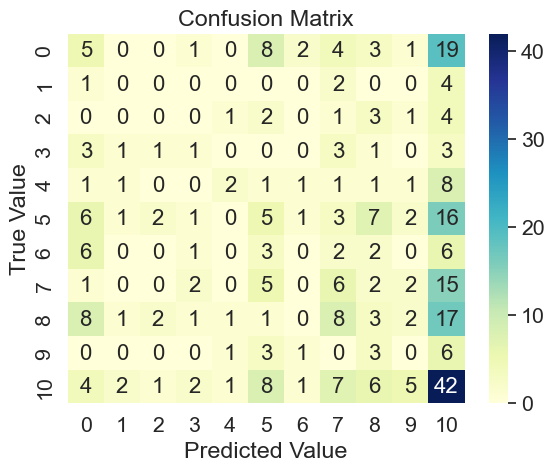

Resultado do Cross Validation
0.16863999999999998


In [16]:
removeTopWords = True
hashtags = False
lemmatize = False

msk = np.random.rand(len(df)) < 0.9

trainDf = df[msk].copy()
testDf = df[~msk].copy()

print("*******************************")
print("Run sendo executada com o dataSet 'ReclameAqui - TIM' que contem " + str(len(df)) + " texts")
print("Dos quais, " + str(len(trainDf)) + " São para treinamento e " + str(len(testDf)) + " são para teste")
print("Os Argumentos dessa run são, RemoverTopWords: " + str(removeTopWords) + " Remover HashTags: " + str(hashtags) + " Lematizar: " + str(lemmatize))
print("*******************************")

trainDf.loc[:, 'is_test'] = 0
testDf.loc[:, 'is_test'] = 1

comp_df = pd.concat([trainDf, testDf])
comp_df.reset_index(drop=True, inplace=True)

comp_df = comp_df[['Descricao', 'Nota', 'is_test']]
comp_df.columns = ['comment', 'label', 'is_test']

comp_df['label'] = comp_df.label.replace('S', 1)
comp_df['label'] = comp_df.label.replace(math.nan, 0)

removeChars(comp_df, hashtags)

comp_df['corpus'] = [spacy_tokenizer(comment, removeTopWords, lemmatize) for comment in comp_df.comment]

count = Counter()

for cp in comp_df.corpus:
    count += Counter(cp)

print("As 5 palavras mais comuns do BOW são:")
print(count.most_common(5))

print(comp_df.label.unique())
for label in sorted(comp_df.label.unique()):
    corpusInLabel = comp_df.corpus[comp_df.label == label]

    count = Counter()
    for cp in corpusInLabel:
        count += Counter(cp)

    print("As 5 palavras mais comuns do Label " + str(label) + " são:")
    print(count.most_common(5))

print("As frequencias dos Labels são as seguintes:")
print(comp_df.label.value_counts())

comp_df.corpus = comp_df.apply(lambda x: " ".join(x.corpus), axis=1)
print(comp_df.head())

x_train = comp_df.corpus[comp_df.is_test == 0]
y_train = comp_df.label[comp_df.is_test == 0]
x_test = comp_df.corpus[comp_df.is_test == 1]
y_test = comp_df.label[comp_df.is_test == 1]

print("shape do treinamento")
print(x_train.shape)
print("shape do teste")
print(x_test.shape)

freq_vector = CountVectorizer(min_df=2, ngram_range=(1, 2)).fit(comp_df.corpus)

x_train = freq_vector.transform(x_train)
x_test = freq_vector.transform(x_test)

classifier = LogisticRegression(max_iter=500)

classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
print("FScore do classificador em cima do treinamento")
print(precision_recall_fscore_support(y_train, y_pred_train, average='macro', zero_division=True))

y_pred_test = classifier.predict(x_test)
print("FScore do classificador em cima do Teste")
print(precision_recall_fscore_support(y_test, y_pred_test, average='macro', zero_division=True))

cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de confusão")
plot_cm(cm)

print("Resultado do Cross Validation")
print(cross_val_score(LogisticRegression(random_state=42), x_train, y_train, cv=5, verbose=0, n_jobs=-1).mean())